# Pandas 객체

## Series 객체

In [1]:
import pandas as pd
import numpy as np

series = pd.Series([1, 2, 3, 4, 5])
# Series를 만들때 리스트로만 묶고서 객체화했을 땐, 정수형 인덱스가 자동으로 생성됌
series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [2]:
T_series = pd.Series([1, 2, 3, 4, 5],
                    index=['a','b','c','d','e'])
# Series를 만들 때 index를 줘서 사용자 지정 인덱스를 만들수 있다.
T_series

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [3]:
T_series.values # values 메소드를 사용하면 해당 Series의 값들이 np.array형태로 반환됌

array([1, 2, 3, 4, 5], dtype=int64)

In [4]:
T_series.values[3] # values 메소드는 slicing이 가능한 객체

4

In [5]:
for i in range(0, 5, 2):
    # Slicing이 가능하기 때문에 for 문의 iteration을 적용하여 홀수값으로만 반환이 가능
    print(T_series.values[i])

1
3
5


In [6]:
T_series.index # index 메소드를 사용하면 해당 Series의 index 값들을 np.array형태로 반환됌

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [7]:
series.index

RangeIndex(start=0, stop=5, step=1)

In [8]:
T_series[2:4] # Series 객체 또한 Slicing이 가능함

c    3
d    4
dtype: int64

In [9]:
T_series[::2] # Slicing이 가능하기 때문에 step을 주어 홀수값들만 반환

a    1
c    3
e    5
dtype: int64

In [10]:
T_series['f'] = 14 # Series는 dictionary의 원소를 방식으로 원소 추가가 가능함
T_series['ff'] = 4
T_series['g'] = np.nan # np.nan 값을 이용하여 결측치를 추가하는 방법이 있음
T_series

a      1.0
b      2.0
c      3.0
d      4.0
e      5.0
f     14.0
ff     4.0
g      NaN
dtype: float64

In [11]:
T_series.value_counts() # value_counts()를 이용하면 Series의 관측값의 빈도수를 파악할 수 있다.

4.0     2
3.0     1
2.0     1
14.0    1
5.0     1
1.0     1
dtype: int64

In [12]:
T_series.value_counts(sort = False)

3.0     1
2.0     1
14.0    1
5.0     1
4.0     2
1.0     1
dtype: int64

In [13]:
# value_counts(normalize = True)를 이용하면 빈도수가 비율형태로 나오게 된다.
# value_counts와 index, value를 이용하여 백분위로 values로 갖는 새로운 Series 생성하는 예
idx = T_series.value_counts().index
val = T_series.value_counts(normalize = True).values *100
hundred = dict()

for i, j in zip(idx, val):
    t = round(j, 1)
    hundred[i] = str(t) + ' %'

hundred = pd.Series(hundred)
hundred

4.0     28.6 %
3.0     14.3 %
2.0     14.3 %
14.0    14.3 %
5.0     14.3 %
1.0     14.3 %
dtype: object

In [14]:
# 딕셔너리 형태를 이용하여 새로운 Series를 생성할 수 있다.
book = pd.Series({'English':'English Grammer in use',
                  '태블로':'태블로 굿모닝 굿애프터눈',
                  '판다스':'파이썬 머신러닝 판다스 데이터 분석',
                  'ML':'파이썬 머신러닝 완벽가이드'})
book

English    English Grammer in use
태블로                 태블로 굿모닝 굿애프터눈
판다스           파이썬 머신러닝 판다스 데이터 분석
ML                 파이썬 머신러닝 완벽가이드
dtype: object

In [15]:
book['English']

'English Grammer in use'

In [16]:
book['English':'판다스']

English    English Grammer in use
태블로                 태블로 굿모닝 굿애프터눈
판다스           파이썬 머신러닝 판다스 데이터 분석
dtype: object

## DataFrame 객체

In [17]:
pd.DataFrame({'a':[1,3,4],
              'b':[1,2,4]})
# pd.DataFrame을 Dictionary형태로 만들때 'a'의 컬럼에 [1, 3, 4] 값이 있다는 형태로 만든다.

a  b
0  1  1
1  3  2
2  4  4

In [18]:
pd.DataFrame([{'a':1, 'b':2, 'c':4}, {'a':2, 'b':3, 'd':5}])
# DataFrame의 data값에 list안에서 dictionary형태로 입력하면 row형태로 값을 입력할 수 있다.

a  b    c    d
0  1  2  4.0  NaN
1  2  3  NaN  5.0

In [19]:
pd.DataFrame(
             [{'이*혁':3, '권*원':5, '송*미':2, '김*순':4},
              {'이*혁':1, '권*원':2, '송*미':4, '김*순':3},
              {'이*혁':2, '권*원':3, '송*미':1, '김*순':3}],
             index=['소주', '맥주', '와인'])
# DataFrame에 index 옵션을 입력하면 index를 원하는 값으로 지정할 수 있다.

이*혁  권*원  송*미  김*순
소주    3    5    2    4
맥주    1    2    4    3
와인    2    3    1    3

In [20]:
pd.DataFrame({'이*혁':[3, 1, 2], '권*원':[5, 2, 3], '송*미':[2, 4, 1], '김*순':[4, 3, 3]}, 
             index = ['소주', '맥주','와인'])

이*혁  권*원  송*미  김*순
소주    3    5    2    4
맥주    1    2    4    3
와인    2    3    1    3

In [21]:
Kim_dict = {'소주':13,
            '맥주':10,
            '와인':5,
            '위스키':2}
kim=pd.Series(Kim_dict)
kim

소주     13
맥주     10
와인      5
위스키     2
dtype: int64

In [22]:
lee_dict = {'소주':10,
            '맥주':3,
            '와인':4,
            '럼':2}
lee = pd.Series(lee_dict)
lee

소주    10
맥주     3
와인     4
럼      2
dtype: int64

In [23]:
drinks = pd.DataFrame({'김*순':kim,
                       '이*혁':lee})
# column명을 지정한 후 value값에 Series를 지정하여 DataFrame을 만들수 있다.
drinks

김*순   이*혁
럼     NaN   2.0
맥주   10.0   3.0
소주   13.0  10.0
와인    5.0   4.0
위스키   2.0   NaN

In [24]:
drinks.index

Index(['럼', '맥주', '소주', '와인', '위스키'], dtype='object')

In [25]:
drinks.columns

Index(['김*순', '이*혁'], dtype='object')

In [26]:
drinks['맥주':'와인']

김*순   이*혁
맥주  10.0   3.0
소주  13.0  10.0
와인   5.0   4.0

In [27]:
drinks['김*순']

럼       NaN
맥주     10.0
소주     13.0
와인      5.0
위스키     2.0
Name: 김*순, dtype: float64

## Index 객체

In [28]:
idx = pd.Index([0,1, 2, 3, 4, 5,6])
idx

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [29]:
idx[1]

1

In [30]:
idx[0:5:2]

Int64Index([0, 2, 4], dtype='int64')

In [31]:
didx = pd.DatetimeIndex(['2021-12-12', '2021-12-13'])
didx

DatetimeIndex(['2021-12-12', '2021-12-13'], dtype='datetime64[ns]', freq=None)

In [32]:
pdidx = pd.PeriodIndex(['2021-12', '2022-01'], freq='M')
pdidx

PeriodIndex(['2021-12', '2022-01'], dtype='period[M]', freq='M')

In [33]:
print(idx)
print(pdidx.size)

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
2


In [34]:
pdidx_y = pd.PeriodIndex(['2021', '2022', '1999', '1954', '1441'], freq='Y')
pdidx_y

PeriodIndex(['2021', '2022', '1999', '1954', '1441'], dtype='period[A-DEC]', freq='A-DEC')

In [35]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])
pd.DataFrame(data=range(5), index=pdidx_y)

0
2021  0
2022  1
1999  2
1954  3
1441  4

### index 연산

In [36]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])

print(idx1.append(idx2))
print(idx1.difference(idx2)) # difference는 두 index의 차집합을 반환한다.
print(idx1^idx2)  # ^ 연산자는 두 index의 차집합을 반환하지만 추후 삭제 예정( difference 사용 추천 )
print(idx1 - idx2)  # 두 DataFrame의 값들의 차를 반환한다.
print(idx1.intersection(idx2)) # intersection은 두 index의 교집합을 반환한다.
print(idx1 & idx2) # & 연산자도 intersection를 사용하지만 추후에 삭제 예정( intersection을 사용 추천 )
print(idx1.union(idx2)) # union 함수는 두 index의 합집합을 반환 (중복을 제거함)
print(idx1|idx2) # | 연산자도 두 index의 합집합을 반환하지만 추후에 삭제 예정 ( union 사용 추천 )
print(idx1.delete(0)) # 인덱스 번호를 지정하여 그 해당하는 번호의 값을 제거
print(idx1.drop(1))   # 해당하는 값을 지정하여 그 값을 제거

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')


#### difference( )

In [37]:
a_index = pd.Index(range(1, 7))
a = pd.DataFrame(data = [1, 2, 3, 4, 5, 6], index = a_index)

b_index = pd.Index(range(1, 7, 2))
b = pd.DataFrame(data = [1, 3, 5], index = b_index)

c = pd.DataFrame(data = range(0, 6, 2), index = a_index.difference(b_index))
c

0
2  0
4  2
6  4

In [38]:
a = pd.Index([1, 2, 3, 4, 5, 6, 7, 8, 9])
b = pd.Index(range(1, 9, 2))
c = pd.Index(a.difference(b))
c

Int64Index([2, 4, 6, 8, 9], dtype='int64')

#### intersection( )

In [39]:
a_index = pd.Index(range(1, 7))
a = pd.DataFrame(data=[1, 2, 3, 4, 5, 6], index=a_index)

b_index = pd.Index(range(1, 7, 2))
b = pd.DataFrame(data=[1, 3, 5], index=b_index)

c = pd.DataFrame(data=[2, 4, 6], index=a_index.intersection(b_index))
c

0
1  2
3  4
5  6

In [40]:
a = pd.Index(range(1, 7))
b = pd.Index(range(1, 7, 2))
c = a.intersection(b)
list(c)

[1, 3, 5]

#### delete( )

In [41]:
a = pd.Index(range(1,7))
print(list(a))
a = a.delete(3)
print(list(a))  # a의 Index 번호 3번을 제외함

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 5, 6]


In [42]:
b = pd.Index(range(1, 11))
b = b.delete([1, 3, 5, 7, 9])
list(b)

[1, 3, 5, 7, 9]

#### drop( )

In [43]:
a = pd.Index(range(1,7))
print(list(a))
a = a.drop([1, 3, 5])
list(a)

[1, 2, 3, 4, 5, 6]


[2, 4, 6]

In [44]:
b = pd.Index(range(1, 11))
print(list(b))
b = b.drop([1, 5, 10])
list(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


[2, 3, 4, 6, 7, 8, 9]

## 인덱싱( Indexing )

In [45]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0], 
             index = ['a','b','c','d','e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [46]:
s[1] # index 번호로도 slicing이 가능

0.25

In [47]:
s['b'] # index의 이름으로도 slicing이 가능

0.25

In [48]:
s.keys() # keys를 쓰면 Series의 index 값을 반환한다.

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [49]:
a = pd.Series(index=[1, 2, 3, 4, 5])
for i, j in enumerate(s.keys()):
    a[i] = j
a

1      b
2      c
3      d
4      e
5    NaN
0      a
dtype: object

In [50]:
list(s.items()) # items( )메세드는 Series의 index값과 value들을 튜플로 반환한다.

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [51]:
s['f']= 1.25  # dictionary형태로 Series에 새로운 index와 value를 입력하면 새로운 셀을 추가할 수 있다.
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [52]:
s['a':'d']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [53]:
s[ (s > 0.4) & (s < 0.8) ]

c    0.50
d    0.75
dtype: float64

In [54]:
d = pd.Series(data=range(1, 11), index=['a','b','c','d','e','f','g','h','i','j'])
print(d, end='\n')
d [ (d > 2) & (d < 7) ]

a     1
b     2
c     3
d     4
e     5
f     6
g     7
h     8
i     9
j    10
dtype: int64


c    3
d    4
e    5
f    6
dtype: int64

In [55]:
d[ (d < 4 ) | (d > 9) ]

a     1
b     2
c     3
j    10
dtype: int64

### Series 인덱싱

In [56]:
s = pd.Series(['a','b','c','d','e'],
              index=[1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [57]:
s[1]

'a'

In [58]:
s[2:4]

5    c
7    d
dtype: object

In [59]:
s.iloc[1]

'b'

In [60]:
s.loc[1]

'a'

In [61]:
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [62]:
s.reindex(range(10))  # reindex는 index를 새로 생성하는데 기존에 있는 index와 value 모두가 추가하여 생성한다.

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [63]:
s.reindex(range(10), method='bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

In [64]:
s.reindex(range(10), method='ffill') # reindex를 하는데 앞의 값을 참조하여 해당 결측치를 채운다.
# 하지만 index[0]은 앞의 값이 존재하지 않기에 NaN값으로 나오게 된다.

0    NaN
1      a
2      a
3      b
4      b
5      c
6      c
7      d
8      d
9      e
dtype: object

### DataFrame 인덱싱

In [65]:
male_tuple = {'서울특별시': 4732275, 
              '부산광역시': 1668618,
              '인천광역시': 1476813,
              '대구광역시': 1198815,
              '대전광역시': 734441,
              '광주광역시': 720060}
male = pd.Series(male_tuple)

female_tuple = {'서울특별시': 4988571, 
                '부산광역시': 1735805,
                '인천광역시': 1470404,
                '대구광역시': 1229139,
                '대전광역시': 736599,
                '광주광역시': 734988}
female = pd.Series(female_tuple)

pop_tuple = {'서울특별시': 9720846, 
             '부산광역시': 3404423,
             '인천광역시': 2947217,
             '대구광역시': 2427954,
             '대전광역시': 1471040,
             '광주광역시': 1455048}
population = pd.Series(pop_tuple)

korea_df = pd.DataFrame({'인구수':population, 
                         '남자인구수':male,
                         '여자인구수':female})
# 컬럼명과 시리즈를 딕셔너리 형태로 묶어서 데이터 프레임을 만들수 있다.
korea_df

인구수    남자인구수    여자인구수
서울특별시  9720846  4732275  4988571
부산광역시  3404423  1668618  1735805
인천광역시  2947217  1476813  1470404
대구광역시  2427954  1198815  1229139
대전광역시  1471040   734441   736599
광주광역시  1455048   720060   734988

In [66]:
korea_df.at['대전광역시','남자인구수']

734441

In [67]:
korea_df.at['서울특별시','인구수']

9720846

In [68]:
korea_df.at['부산광역시','남자인구수']

1668618

In [69]:
korea_df.at['인천광역시','여자인구수']
# korea_df.at['인천광역시':'대전광역시','남자인구수']
# 와 같이 at메소드에선 복수 index를 쓸수없다.

1470404

In [70]:
korea_df['남여비율'] = (korea_df.남자인구수 * 100 / korea_df.여자인구수)
korea_df

인구수    남자인구수    여자인구수        남여비율
서울특별시  9720846  4732275  4988571   94.862336
부산광역시  3404423  1668618  1735805   96.129346
인천광역시  2947217  1476813  1470404  100.435867
대구광역시  2427954  1198815  1229139   97.532907
대전광역시  1471040   734441   736599   99.707032
광주광역시  1455048   720060   734988   97.968946

#### values

In [71]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01],
       [1.45504800e+06, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [72]:
df_index = pd.Index(['1번', '2번','3번'])
df = pd.DataFrame({'이름':['서준','인아', '인준'],
                   '수학':[90, 70, 80],
                   '영어':[98, 95, 80],
                   '음악':[85, 100, 80],
                   '체육':[100, 90, 80]}, 
                 index = df_index)
df

이름  수학  영어   음악   체육
1번  서준  90  98   85  100
2번  인아  70  95  100   90
3번  인준  80  80   80   80

In [73]:
df.values

array([['서준', 90, 98, 85, 100],
       ['인아', 70, 95, 100, 90],
       ['인준', 80, 80, 80, 80]], dtype=object)

In [74]:
korea_df.values[0] # korea_df의 서울특별시의 value를 반환한다.

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [75]:
df.values[0] # df의 1번 value를 반환한다.

array(['서준', 90, 98, 85, 100], dtype=object)

#### loc/ iloc
DataFrame 객체.loc[행 인덱스, 열 이름]  
DataFrame 객체.iloc[행 번호, 열 번호]

df.iloc[:]의 형태는 행번호에 범위를 지정하여  
그 범위에 해당하는 모든 열을 가져오는 결과값을 반환한다.

In [76]:
df.loc['1번':'2번']

이름  수학  영어   음악   체육
1번  서준  90  98   85  100
2번  인아  70  95  100   90

In [77]:
df.iloc[0:2]

이름  수학  영어   음악   체육
1번  서준  90  98   85  100
2번  인아  70  95  100   90

In [78]:
df.loc['1번', '영어']

98

In [79]:
df.iloc[0,2]

98

df.iloc[:,:]의 형태는 행 번호에 범위를 지정하고  
열 번호에도 해당 범위를 지정하여  
그 지정된 범위안의 원소를 반환한다.

In [80]:
df.loc['1번':'2번','수학':'음악']

수학  영어   음악
1번  90  98   85
2번  70  95  100

In [81]:
df.iloc[0:2,1:4]

수학  영어   음악
1번  90  98   85
2번  70  95  100

In [82]:
df.iloc[1:3,2:]

영어   음악  체육
2번  95  100  90
3번  80   80  80

In [83]:
df.loc['2번':'3번','영어':]

영어   음악  체육
2번  95  100  90
3번  80   80  80

In [84]:
korea_df.loc[ (korea_df.여자인구수 > 1000000)]

인구수    남자인구수    여자인구수        남여비율
서울특별시  9720846  4732275  4988571   94.862336
부산광역시  3404423  1668618  1735805   96.129346
인천광역시  2947217  1476813  1470404  100.435867
대구광역시  2427954  1198815  1229139   97.532907

In [85]:
df.loc[(df.수학 > 70)]

이름  수학  영어  음악   체육
1번  서준  90  98  85  100
3번  인준  80  80  80   80

In [86]:
df[df.수학 > 70]

이름  수학  영어  음악   체육
1번  서준  90  98  85  100
3번  인준  80  80  80   80

In [87]:
df.loc[(df.수학 != 80) & (df.영어 != 95)]

이름  수학  영어  음악   체육
1번  서준  90  98  85  100

In [88]:
df[ (df.수학 != 80) & (df.영어 != 95) ]

이름  수학  영어  음악   체육
1번  서준  90  98  85  100

### 다중 인덱스 (Multi Index)
- 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
- 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱승

#### 다중 인덱스 Series

In [89]:
korea_df

인구수    남자인구수    여자인구수        남여비율
서울특별시  9720846  4732275  4988571   94.862336
부산광역시  3404423  1668618  1735805   96.129346
인천광역시  2947217  1476813  1470404  100.435867
대구광역시  2427954  1198815  1229139   97.532907
대전광역시  1471040   734441   736599   99.707032
광주광역시  1455048   720060   734988   97.968946

In [90]:
idx_tuples = [('서울특별시',2010), ('서울특별시',2020),
              ('부산광역시',2010), ('부산광역시',2020),
              ('인천광역시',2010), ('인천광역시',2020),
              ('대구광역시', 2010), ('대구광역시',2020),
              ('대전광역시', 2010), ('대전광역시',2020),
              ('광주광역시', 2010), ('광주광역시',2020)
             ]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [91]:
pop_tuples = [10312545, 9720846,
              2567910, 3404423,
              2758296, 2847217,
              2511676, 2427954,
              1503664, 1471040,
              1454636, 1455048]
population = pd.Series(pop_tuples, index = idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2847217
(대구광역시, 2010)     2511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [92]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [93]:
population = population.reindex(midx)
population.index.names = ['행정구역','년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2847217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [94]:
df_tuples = [('1번','수학'), ('1번','영어'), ('1번','음악'),('1번','체육'),
             ('2번','수학'), ('2번','영어'), ('2번','음악'),('2번','체육'),
             ('3번','수학'), ('3번','영어'), ('3번','음악'),('3번','체육')]
mdf = pd.MultiIndex.from_tuples(df_tuples)
mdf 

MultiIndex([('1번', '수학'),
            ('1번', '영어'),
            ('1번', '음악'),
            ('1번', '체육'),
            ('2번', '수학'),
            ('2번', '영어'),
            ('2번', '음악'),
            ('2번', '체육'),
            ('3번', '수학'),
            ('3번', '영어'),
            ('3번', '음악'),
            ('3번', '체육')],
           )

In [95]:
numbers = ['1번', '2번', '3번', '4번']
subjects = ['수학', '영어', '음악', '체육']
total = []

for i in numbers:
    for z in subjects:
        total.append((i, z))

total

[('1번', '수학'),
 ('1번', '영어'),
 ('1번', '음악'),
 ('1번', '체육'),
 ('2번', '수학'),
 ('2번', '영어'),
 ('2번', '음악'),
 ('2번', '체육'),
 ('3번', '수학'),
 ('3번', '영어'),
 ('3번', '음악'),
 ('3번', '체육'),
 ('4번', '수학'),
 ('4번', '영어'),
 ('4번', '음악'),
 ('4번', '체육')]

In [96]:
mdf = pd.MultiIndex.from_tuples(total)
mdf

MultiIndex([('1번', '수학'),
            ('1번', '영어'),
            ('1번', '음악'),
            ('1번', '체육'),
            ('2번', '수학'),
            ('2번', '영어'),
            ('2번', '음악'),
            ('2번', '체육'),
            ('3번', '수학'),
            ('3번', '영어'),
            ('3번', '음악'),
            ('3번', '체육'),
            ('4번', '수학'),
            ('4번', '영어'),
            ('4번', '음악'),
            ('4번', '체육')],
           )

In [97]:
score = [100, 90, 80, 70,
         92, 82, 72, 62,
         70, 80, 100, 90, 
         75, 70, 65, 70]
final_score = pd.Series(data=score, index=mdf)
final_score.index.names=['번호', '과목']
final_score

번호  과목
1번  수학    100
    영어     90
    음악     80
    체육     70
2번  수학     92
    영어     82
    음악     72
    체육     62
3번  수학     70
    영어     80
    음악    100
    체육     90
4번  수학     75
    영어     70
    음악     65
    체육     70
dtype: int64

In [98]:
final_score.unstack()

과목   수학  영어   음악  체육
번호                  
1번  100  90   80  70
2번   92  82   72  62
3번   70  80  100  90
4번   75  70   65  70

In [99]:
middle_term = [90, 80, 70, 60,
               87, 77, 67, 57,
               80, 90 , 90, 90,
               75, 70, 65, 70]
class_score_df = pd.DataFrame({'중간고사': middle_term, '기말고사': final_score})
class_score_df

중간고사  기말고사
번호 과목            
1번 수학    90   100
   영어    80    90
   음악    70    80
   체육    60    70
2번 수학    87    92
   영어    77    82
   음악    67    72
   체육    57    62
3번 수학    80    70
   영어    90    80
   음악    90   100
   체육    90    90
4번 수학    75    75
   영어    70    70
   음악    65    65
   체육    70    70

In [100]:
aver = (class_score_df['중간고사'].values + class_score_df['기말고사'].values) / 2

class_score_df = pd.DataFrame({'중간고사':middle_term,'기말고사':final_score,'평균':aver})
class_score_df

중간고사  기말고사    평균
번호 과목                  
1번 수학    90   100  95.0
   영어    80    90  85.0
   음악    70    80  75.0
   체육    60    70  65.0
2번 수학    87    92  89.5
   영어    77    82  79.5
   음악    67    72  69.5
   체육    57    62  59.5
3번 수학    80    70  75.0
   영어    90    80  85.0
   음악    90   100  95.0
   체육    90    90  90.0
4번 수학    75    75  75.0
   영어    70    70  70.0
   음악    65    65  65.0
   체육    70    70  70.0

In [101]:
mdf1 = pd.MultiIndex.from_product([['영수','철수','영희'], ['수학','영어','체육', '음악']])
mdf1

MultiIndex([('영수', '수학'),
            ('영수', '영어'),
            ('영수', '체육'),
            ('영수', '음악'),
            ('철수', '수학'),
            ('철수', '영어'),
            ('철수', '체육'),
            ('철수', '음악'),
            ('영희', '수학'),
            ('영희', '영어'),
            ('영희', '체육'),
            ('영희', '음악')],
           )

#### 인덱싱 및 슬라이싱

In [102]:
middle_term = [90, 80, 70, 50,
               87, 77, 67, 60, 
               80, 90 , 90, 50]

mdf_s = pd.Series(middle_term, index = mdf1)
mdf_s.index.names = ['이름', '과목']
mdf_s

이름  과목
영수  수학    90
    영어    80
    체육    70
    음악    50
철수  수학    87
    영어    77
    체육    67
    음악    60
영희  수학    80
    영어    90
    체육    90
    음악    50
dtype: int64

In [103]:
mdf_s['영희', '영어']

90

In [104]:
mdf_s['영희']

과목
수학    80
영어    90
체육    90
음악    50
dtype: int64

In [105]:
final_score = [100, 90, 80, 70,
               92, 82, 72, 62,
               70, 80, 100 ,52]

In [106]:
class_score = pd.DataFrame({'중간고사':mdf_s, 
                            '기말고사':final_score})
class_score['평균'] = (class_score['중간고사'] + class_score['기말고사']) /2
class_score['순위'] = class_score['평균'].rank(method='first', ascending=False)
class_score

중간고사  기말고사    평균    순위
이름 과목                        
영수 수학    90   100  95.0   1.0
   영어    80    90  85.0   4.0
   체육    70    80  75.0   7.0
   음악    50    70  60.0  11.0
철수 수학    87    92  89.5   3.0
   영어    77    82  79.5   6.0
   체육    67    72  69.5   9.0
   음악    60    62  61.0  10.0
영희 수학    80    70  75.0   8.0
   영어    90    80  85.0   5.0
   체육    90   100  95.0   2.0
   음악    50    52  51.0  12.0

In [107]:
def Make_grad(value):
    value = int(value)
    if value < 4:
        return '1등급'
    elif value < 8:
        return '2등급'
    else:
        return '3등급'

class_score['등급'] = class_score['순위'].apply(Make_grad)
class_score

중간고사  기말고사    평균    순위   등급
이름 과목                             
영수 수학    90   100  95.0   1.0  1등급
   영어    80    90  85.0   4.0  2등급
   체육    70    80  75.0   7.0  2등급
   음악    50    70  60.0  11.0  3등급
철수 수학    87    92  89.5   3.0  1등급
   영어    77    82  79.5   6.0  2등급
   체육    67    72  69.5   9.0  3등급
   음악    60    62  61.0  10.0  3등급
영희 수학    80    70  75.0   8.0  3등급
   영어    90    80  85.0   5.0  2등급
   체육    90   100  95.0   2.0  1등급
   음악    50    52  51.0  12.0  3등급

#### 다중 인덱스 재정렬

In [108]:
# class_score['영수':'바둑이']
# 멀티인덱스는 초기 인덱스가 정렬이 되어 있지 않기 때문에 단순히 슬라이싱을 하면 에러가 나타난다.

class_score = class_score.sort_index()
class_score

중간고사  기말고사    평균    순위   등급
이름 과목                             
영수 수학    90   100  95.0   1.0  1등급
   영어    80    90  85.0   4.0  2등급
   음악    50    70  60.0  11.0  3등급
   체육    70    80  75.0   7.0  2등급
영희 수학    80    70  75.0   8.0  3등급
   영어    90    80  85.0   5.0  2등급
   음악    50    52  51.0  12.0  3등급
   체육    90   100  95.0   2.0  1등급
철수 수학    87    92  89.5   3.0  1등급
   영어    77    82  79.5   6.0  2등급
   음악    60    62  61.0  10.0  3등급
   체육    67    72  69.5   9.0  3등급

In [109]:
class_score[:'영수']

중간고사  기말고사    평균    순위   등급
이름 과목                             
영수 수학    90   100  95.0   1.0  1등급
   영어    80    90  85.0   4.0  2등급
   음악    50    70  60.0  11.0  3등급
   체육    70    80  75.0   7.0  2등급

In [110]:
class_score.index

MultiIndex([('영수', '수학'),
            ('영수', '영어'),
            ('영수', '음악'),
            ('영수', '체육'),
            ('영희', '수학'),
            ('영희', '영어'),
            ('영희', '음악'),
            ('영희', '체육'),
            ('철수', '수학'),
            ('철수', '영어'),
            ('철수', '음악'),
            ('철수', '체육')],
           names=['이름', '과목'])

In [111]:
# Index 형태가 위와 같이 Tuple 형태로 그룹화되어 있기 때문에
# class_score['영수','수학'] 형식이 실행되지 않는다.
class_score.loc[('영수','수학'),:]

중간고사      90
기말고사     100
평균      95.0
순위       1.0
등급       1등급
Name: (영수, 수학), dtype: object

In [112]:
class_score['영수':'영희']

중간고사  기말고사    평균    순위   등급
이름 과목                             
영수 수학    90   100  95.0   1.0  1등급
   영어    80    90  85.0   4.0  2등급
   음악    50    70  60.0  11.0  3등급
   체육    70    80  75.0   7.0  2등급
영희 수학    80    70  75.0   8.0  3등급
   영어    90    80  85.0   5.0  2등급
   음악    50    52  51.0  12.0  3등급
   체육    90   100  95.0   2.0  1등급

In [113]:
class_score.unstack(level=0)

중간고사         기말고사             평균                순위               등급       \
이름   영수  영희  철수   영수   영희  철수    영수    영희    철수    영수    영희    철수   영수   영희   
과목                                                                            
수학   90  80  87  100   70  92  95.0  75.0  89.5   1.0   8.0   3.0  1등급  3등급   
영어   80  90  77   90   80  82  85.0  85.0  79.5   4.0   5.0   6.0  2등급  2등급   
음악   50  50  60   70   52  62  60.0  51.0  61.0  11.0  12.0  10.0  3등급  3등급   
체육   70  90  67   80  100  72  75.0  95.0  69.5   7.0   2.0   9.0  2등급  1등급   

         
이름   철수  
과목       
수학  1등급  
영어  2등급  
음악  3등급  
체육  3등급

In [114]:
class_score.unstack(level=1)

중간고사             기말고사                 평균                     순위             \
과목   수학  영어  음악  체육   수학  영어  음악   체육    수학    영어    음악    체육   수학   영어    음악   
이름                                                                              
영수   90  80  50  70  100  90  70   80  95.0  85.0  60.0  75.0  1.0  4.0  11.0   
영희   80  90  50  90   70  80  52  100  75.0  85.0  51.0  95.0  8.0  5.0  12.0   
철수   87  77  60  67   92  82  62   72  89.5  79.5  61.0  69.5  3.0  6.0  10.0   

          등급                 
과목   체육   수학   영어   음악   체육  
이름                           
영수  7.0  1등급  2등급  3등급  2등급  
영희  2.0  3등급  2등급  3등급  1등급  
철수  9.0  1등급  2등급  3등급  3등급

In [115]:
class_score.stack()

이름  과목      
영수  수학  중간고사      90
        기말고사     100
        평균      95.0
        순위       1.0
        등급       1등급
    영어  중간고사      80
        기말고사      90
        평균      85.0
        순위       4.0
        등급       2등급
    음악  중간고사      50
        기말고사      70
        평균      60.0
        순위      11.0
        등급       3등급
    체육  중간고사      70
        기말고사      80
        평균      75.0
        순위       7.0
        등급       2등급
영희  수학  중간고사      80
        기말고사      70
        평균      75.0
        순위       8.0
        등급       3등급
    영어  중간고사      90
        기말고사      80
        평균      85.0
        순위       5.0
        등급       2등급
    음악  중간고사      50
        기말고사      52
        평균      51.0
        순위      12.0
        등급       3등급
    체육  중간고사      90
        기말고사     100
        평균      95.0
        순위       2.0
        등급       1등급
철수  수학  중간고사      87
        기말고사      92
        평균      89.5
        순위       3.0
        등급       1등급
    영어  중간고사      77
        기말고사      82


In [116]:
idx_flat = class_score.reset_index(level = 0)
idx_flat

이름  중간고사  기말고사    평균    순위   등급
과목                                 
수학  영수    90   100  95.0   1.0  1등급
영어  영수    80    90  85.0   4.0  2등급
음악  영수    50    70  60.0  11.0  3등급
체육  영수    70    80  75.0   7.0  2등급
수학  영희    80    70  75.0   8.0  3등급
영어  영희    90    80  85.0   5.0  2등급
음악  영희    50    52  51.0  12.0  3등급
체육  영희    90   100  95.0   2.0  1등급
수학  철수    87    92  89.5   3.0  1등급
영어  철수    77    82  79.5   6.0  2등급
음악  철수    60    62  61.0  10.0  3등급
체육  철수    67    72  69.5   9.0  3등급

In [117]:
idx_flat = class_score.reset_index(level = 1)
idx_flat

과목  중간고사  기말고사    평균    순위   등급
이름                                 
영수  수학    90   100  95.0   1.0  1등급
영수  영어    80    90  85.0   4.0  2등급
영수  음악    50    70  60.0  11.0  3등급
영수  체육    70    80  75.0   7.0  2등급
영희  수학    80    70  75.0   8.0  3등급
영희  영어    90    80  85.0   5.0  2등급
영희  음악    50    52  51.0  12.0  3등급
영희  체육    90   100  95.0   2.0  1등급
철수  수학    87    92  89.5   3.0  1등급
철수  영어    77    82  79.5   6.0  2등급
철수  음악    60    62  61.0  10.0  3등급
철수  체육    67    72  69.5   9.0  3등급

In [118]:
idx_flat = class_score.reset_index(level = (0, 1))
idx_flat

이름  과목  중간고사  기말고사    평균    순위   등급
0   영수  수학    90   100  95.0   1.0  1등급
1   영수  영어    80    90  85.0   4.0  2등급
2   영수  음악    50    70  60.0  11.0  3등급
3   영수  체육    70    80  75.0   7.0  2등급
4   영희  수학    80    70  75.0   8.0  3등급
5   영희  영어    90    80  85.0   5.0  2등급
6   영희  음악    50    52  51.0  12.0  3등급
7   영희  체육    90   100  95.0   2.0  1등급
8   철수  수학    87    92  89.5   3.0  1등급
9   철수  영어    77    82  79.5   6.0  2등급
10  철수  음악    60    62  61.0  10.0  3등급
11  철수  체육    67    72  69.5   9.0  3등급

In [119]:
idx_flat.set_index(['이름','과목'])

중간고사  기말고사    평균    순위   등급
이름 과목                             
영수 수학    90   100  95.0   1.0  1등급
   영어    80    90  85.0   4.0  2등급
   음악    50    70  60.0  11.0  3등급
   체육    70    80  75.0   7.0  2등급
영희 수학    80    70  75.0   8.0  3등급
   영어    90    80  85.0   5.0  2등급
   음악    50    52  51.0  12.0  3등급
   체육    90   100  95.0   2.0  1등급
철수 수학    87    92  89.5   3.0  1등급
   영어    77    82  79.5   6.0  2등급
   음악    60    62  61.0  10.0  3등급
   체육    67    72  69.5   9.0  3등급

## 정렬(Sort)

In [120]:
s = pd.Series(range(5), index = ['A','D','B','C','E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [121]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [122]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [123]:
t = pd.Series(np.random.randint(0, 10, 5), index=list('DAECB'))
t

D    0
A    3
E    6
C    2
B    7
dtype: int32

In [124]:
t.sort_index()

A    3
B    7
C    2
D    0
E    6
dtype: int32

In [125]:
t.sort_values()

D    0
C    2
A    3
E    6
B    7
dtype: int32

In [126]:
tf = pd.DataFrame(np.random.randint(0, 10, (4, 4)),
                   index = [2, 4, 1, 3],
                   columns = list('BDAC'))
tf

B  D  A  C
2  1  6  5  1
4  7  3  3  0
1  6  2  1  8
3  2  8  4  4

In [127]:
tf.sort_index()

B  D  A  C
1  6  2  1  8
2  1  6  5  1
3  2  8  4  4
4  7  3  3  0

In [128]:
tf.sort_index(axis=1)

A  B  C  D
2  5  1  1  6
4  3  7  0  3
1  1  6  8  2
3  4  2  4  8

In [129]:
tf.sort_values(by='B')

B  D  A  C
2  1  6  5  1
3  2  8  4  4
1  6  2  1  8
4  7  3  3  0

In [130]:
tf.sort_values(by=['B','A'])

B  D  A  C
2  1  6  5  1
3  2  8  4  4
1  6  2  1  8
4  7  3  3  0

In [131]:
tf = pd.DataFrame(np.random.randint(0, 10, (4, 4)), 
                  index=['Robert', 'Daniel', 'Kim', 'Garcia'], 
                  columns=['KG','G','W','T'])
tf

KG  G  W  T
Robert   9  2  8  1
Daniel   3  8  5  6
Kim      1  5  8  5
Garcia   2  5  1  0

In [132]:
tf.sort_index()

KG  G  W  T
Daniel   3  8  5  6
Garcia   2  5  1  0
Kim      1  5  8  5
Robert   9  2  8  1

In [133]:
tf.sort_index(axis=1)

G  KG  T  W
Robert  2   9  1  8
Daniel  8   3  6  5
Kim     5   1  5  8
Garcia  5   2  0  1

In [134]:
tf.sort_values(by='G')

KG  G  W  T
Robert   9  2  8  1
Kim      1  5  8  5
Garcia   2  5  1  0
Daniel   3  8  5  6

## 순위(Ranking)
|메소드|설명|
|:--|:--|
|```average```|기본값. 순위에 같은 값을 가지는 항목들의 평균값을 사용|
|```min```|같은 값을 가지는 그룹을 낮은 순위로 지정|
|```max```|같은 값을 가지는 그룹을 높은 순위로 지정|
|```first```|데이터 내의 위치에 따라 순위 지정|
|```dense```|같은 그룹 내에서 모두 같은 순위를 적용하지 않고 1씩 증가|

In [135]:
s = pd.DataFrame([-2, 4, 7, 3, 0, 7, 5, -4, 2, 6, 10], columns=['값'])
s

값
0   -2
1    4
2    7
3    3
4    0
5    7
6    5
7   -4
8    2
9    6
10  10

In [136]:
s['순위']=s.rank()
s

값    순위
0   -2   2.0
1    4   6.0
2    7   9.5
3    3   5.0
4    0   3.0
5    7   9.5
6    5   7.0
7   -4   1.0
8    2   4.0
9    6   8.0
10  10  11.0

In [137]:
s['순위-first'] = s['값'].rank(method='first').astype(int)
s
# first 메소드는 데이터 내의 위치에 따라 순위가 지정되기 때문에 더 빨리 나온 2번 index에 있는 7이 9등이 됌

값    순위  순위-first
0   -2   2.0         2
1    4   6.0         6
2    7   9.5         9
3    3   5.0         5
4    0   3.0         3
5    7   9.5        10
6    5   7.0         7
7   -4   1.0         1
8    2   4.0         4
9    6   8.0         8
10  10  11.0        11

In [138]:
s['순위-Dense'] = s['값'].rank(method='dense').astype(int)
s

값    순위  순위-first  순위-Dense
0   -2   2.0         2         2
1    4   6.0         6         6
2    7   9.5         9         9
3    3   5.0         5         5
4    0   3.0         3         3
5    7   9.5        10         9
6    5   7.0         7         7
7   -4   1.0         1         1
8    2   4.0         4         4
9    6   8.0         8         8
10  10  11.0        11        10

## 고성능 연산

In [139]:
nrows , ncols = 1000000, 100

df1, df2, df3, df4 =(pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4) )

In [140]:
%timeit df1 + df2 +df3 +df4

1.11 s ± 33.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [141]:
%timeit pd.eval('df1+df2+df3+df4')

516 ms ± 43.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [142]:
%timeit df1 * -df2 / (-df3*df4)

2.05 s ± 544 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [143]:
%timeit pd.eval('df1 * -df2 / (-df3*df4)')

463 ms ± 39.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [144]:
%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4)

615 ms ± 38.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [145]:
%timeit pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')

265 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [146]:
df = pd.DataFrame(np.random.rand(10000000, 5), columns=['A','B','C','D','E'])
df.head()

A         B         C         D         E
0  0.030157  0.344121  0.019139  0.181453  0.201990
1  0.241456  0.141734  0.895838  0.303998  0.899847
2  0.436038  0.643145  0.147919  0.169353  0.561271
3  0.599980  0.364976  0.121259  0.284717  0.296295
4  0.762693  0.121056  0.332062  0.382304  0.263688

In [147]:
%timeit df['A'] + df['B'] / df['C'] - df['D'] * df['E']

184 ms ± 5.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [148]:
%timeit pd.eval("df.A + df.B / df.C - df.D * df.E")

46.5 ms ± 3.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [149]:
df.eval('R = A + B / C - D * E', inplace=True)
df.head()

A         B         C         D         E          R
0  0.030157  0.344121  0.019139  0.181453  0.201990  17.973780
1  0.241456  0.141734  0.895838  0.303998  0.899847   0.126117
2  0.436038  0.643145  0.147919  0.169353  0.561271   4.688943
3  0.599980  0.364976  0.121259  0.284717  0.296295   3.525505
4  0.762693  0.121056  0.332062  0.382304  0.263688   1.026442

In [150]:
n__index = np.random.randint(1, 4, (3,3))

tt1, tt2, tt3, tt4 = ((pd.DataFrame(n__index))for i in range(4))

In [151]:
%timeit tt1 + tt2

92.4 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [152]:
%timeit pd.eval('tt1+tt2')

1.18 ms ± 4.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [153]:
col_mean = df.mean(1)
df['A'] + col_mean

0          3.155263
1          0.676288
2          1.543816
3          1.465435
4          1.244067
             ...   
9999995    1.818422
9999996    1.991079
9999997    3.416637
9999998    1.148020
9999999    1.014132
Length: 10000000, dtype: float64

In [154]:
df.eval('A + @col_mean')
# 외부에 있는 변수도 '@'를 사용하여 불러올 수 있다.

0          3.155263
1          0.676288
2          1.543816
3          1.465435
4          1.244067
             ...   
9999995    1.818422
9999996    1.991079
9999997    3.416637
9999998    1.148020
9999999    1.014132
Length: 10000000, dtype: float64

In [155]:
df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]

A         B         C         D         E         R
1        0.241456  0.141734  0.895838  0.303998  0.899847  0.126117
21       0.113630  0.230910  0.767952  0.379721  0.893548  0.075015
22       0.448593  0.233408  0.768967  0.542871  0.562166  0.446945
43       0.018945  0.319252  0.665348  0.074110  0.012591  0.497839
51       0.313116  0.020654  0.917062  0.946369  0.117576  0.224367
...           ...       ...       ...       ...       ...       ...
9999963  0.068866  0.027723  0.802015  0.036255  0.671109  0.079102
9999973  0.036253  0.224783  0.572202  0.473188  0.204959  0.332107
9999977  0.152292  0.270033  0.916403  0.252963  0.351307  0.358090
9999987  0.424016  0.224372  0.575830  0.943258  0.204716  0.620565
9999990  0.135124  0.028724  0.614072  0.448550  0.837901 -0.193940

[1251003 rows x 6 columns]

In [156]:
%timeit df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]
# 여러 조건을 포함하는 계산식의 경우에도

166 ms ± 5.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [157]:
%timeit pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]')
# eval로 가능하다.

186 ms ± 9.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [158]:
%timeit df.query('(A < 0.5) and (B < 0.5) and (C > 0.5)')

190 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [159]:
pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]')

A         B         C         D         E         R
1        0.241456  0.141734  0.895838  0.303998  0.899847  0.126117
21       0.113630  0.230910  0.767952  0.379721  0.893548  0.075015
22       0.448593  0.233408  0.768967  0.542871  0.562166  0.446945
43       0.018945  0.319252  0.665348  0.074110  0.012591  0.497839
51       0.313116  0.020654  0.917062  0.946369  0.117576  0.224367
...           ...       ...       ...       ...       ...       ...
9999963  0.068866  0.027723  0.802015  0.036255  0.671109  0.079102
9999973  0.036253  0.224783  0.572202  0.473188  0.204959  0.332107
9999977  0.152292  0.270033  0.916403  0.252963  0.351307  0.358090
9999987  0.424016  0.224372  0.575830  0.943258  0.204716  0.620565
9999990  0.135124  0.028724  0.614072  0.448550  0.837901 -0.193940

[1251003 rows x 6 columns]

In [160]:
data_1 = {'몸무게': [95, 70, 65, 45, 85], 
        '키': [170, 170, 170, 170, 170]}
y = pd.DataFrame(data_1)
y

몸무게    키
0   95  170
1   70  170
2   65  170
3   45  170
4   85  170

In [161]:
y.eval('몸무게 + 키')

0    265
1    240
2    235
3    215
4    255
dtype: int64

In [162]:
y.eval('BMI = 몸무게 / ((키/100)*(키/100))', inplace=True)
y['BMI'] = round(y['BMI'],2)
y

몸무게    키    BMI
0   95  170  32.87
1   70  170  24.22
2   65  170  22.49
3   45  170  15.57
4   85  170  29.41

In [163]:
y.eval('몸무게 >= 90')

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [164]:
y.loc[y.eval('              BMI < 18'), '분류'] = '저체중'
y.loc[y.eval('18 <= BMI and BMI < 23'), '분류'] = '정상'
y.loc[y.eval('23 <= BMI and BMI < 25'), '분류'] = '과체중'
y.loc[y.eval('25 <= BMI and BMI < 30'), '분류'] = '비만'
y.loc[y.eval('30 <= BMI             '), '분류'] = '고도비만'
y

몸무게    키    BMI    분류
0   95  170  32.87  고도비만
1   70  170  24.22   과체중
2   65  170  22.49    정상
3   45  170  15.57   저체중
4   85  170  29.41    비만

## 데이터 결합

### Concat ( ) / Append( )

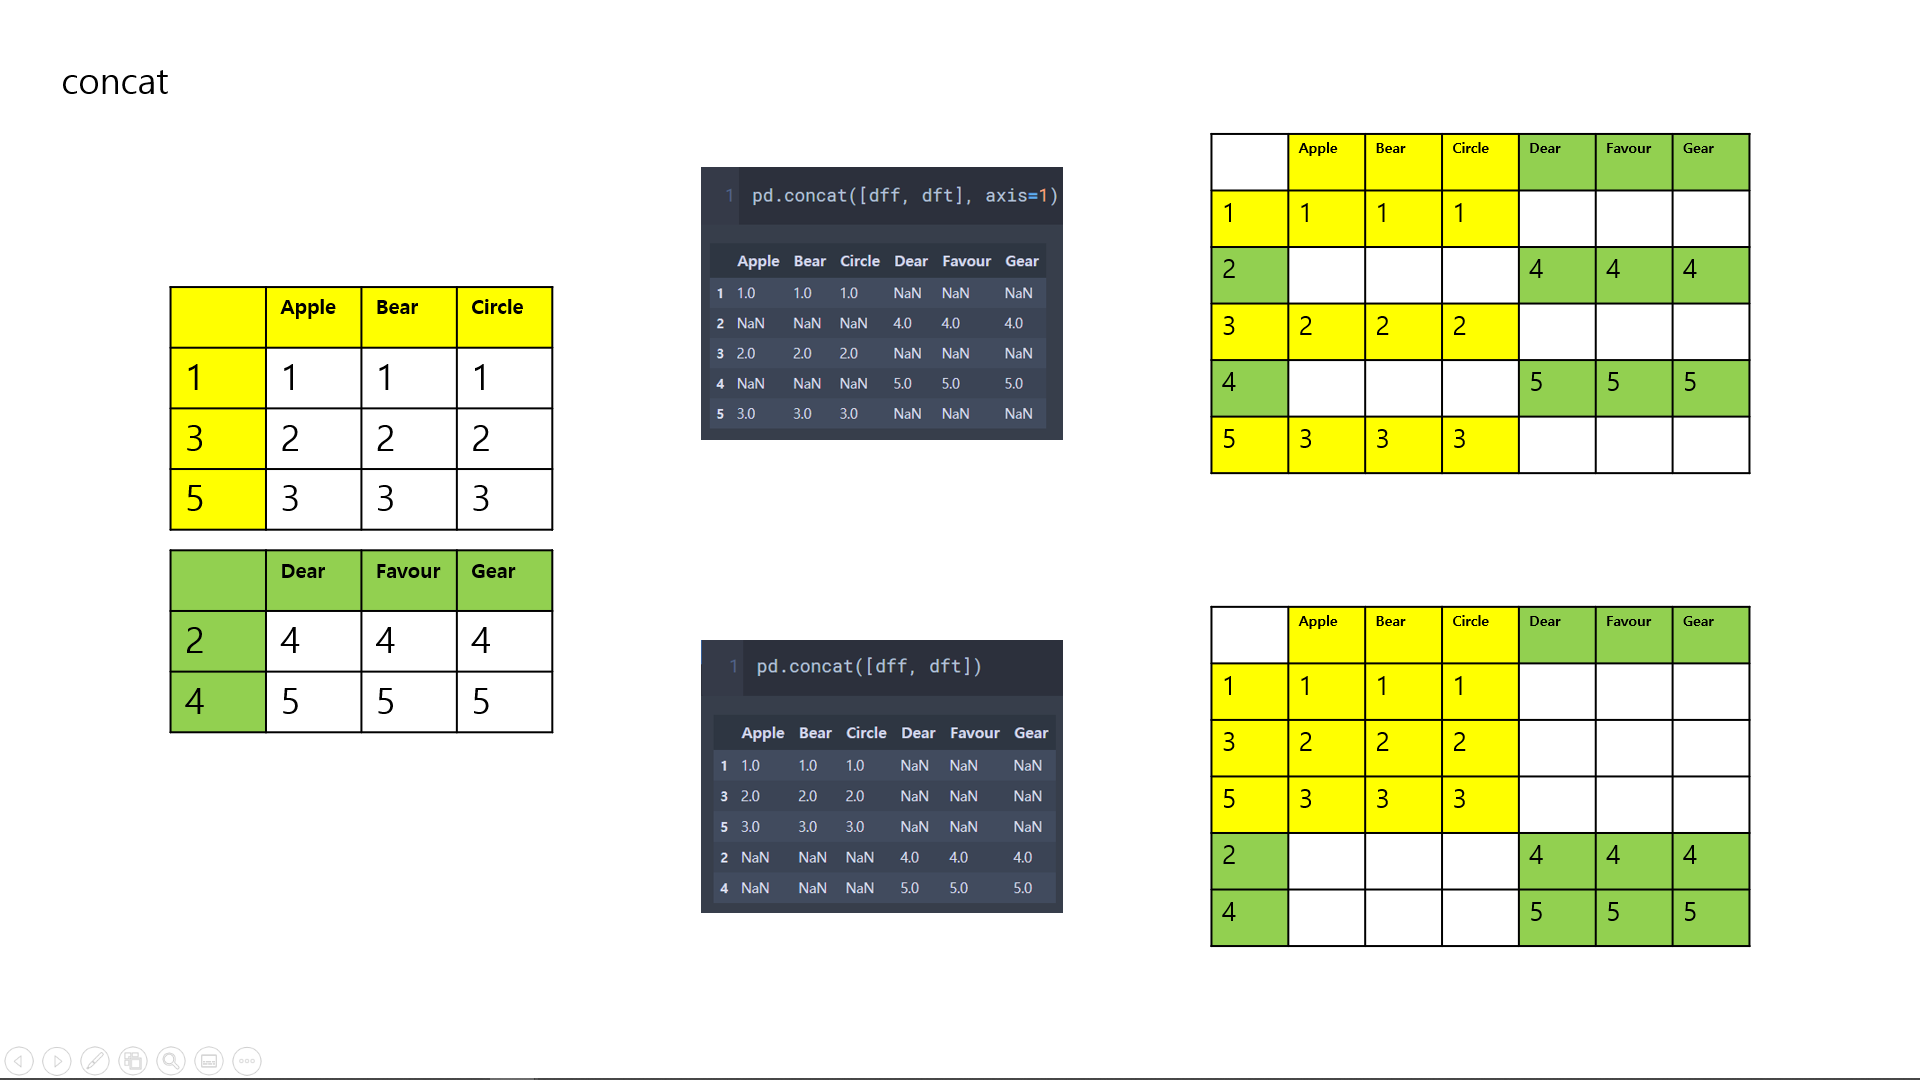

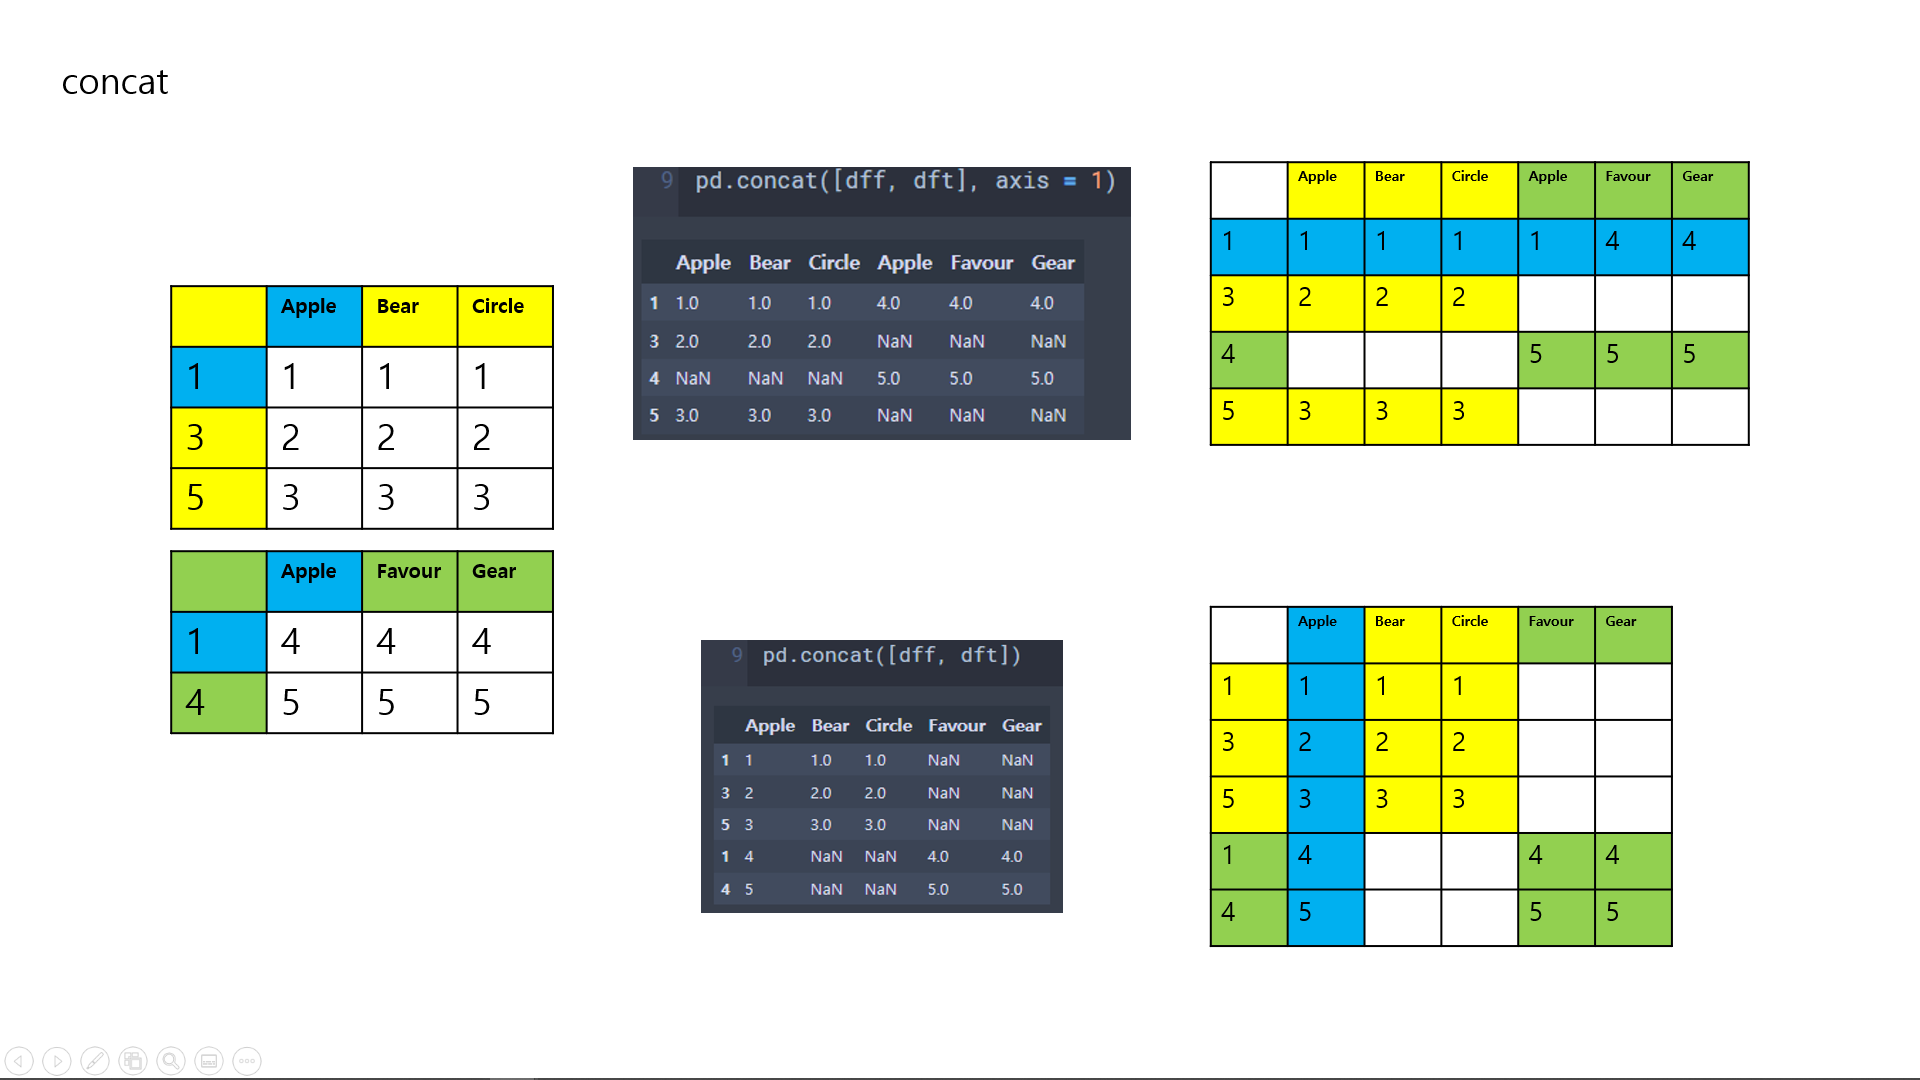

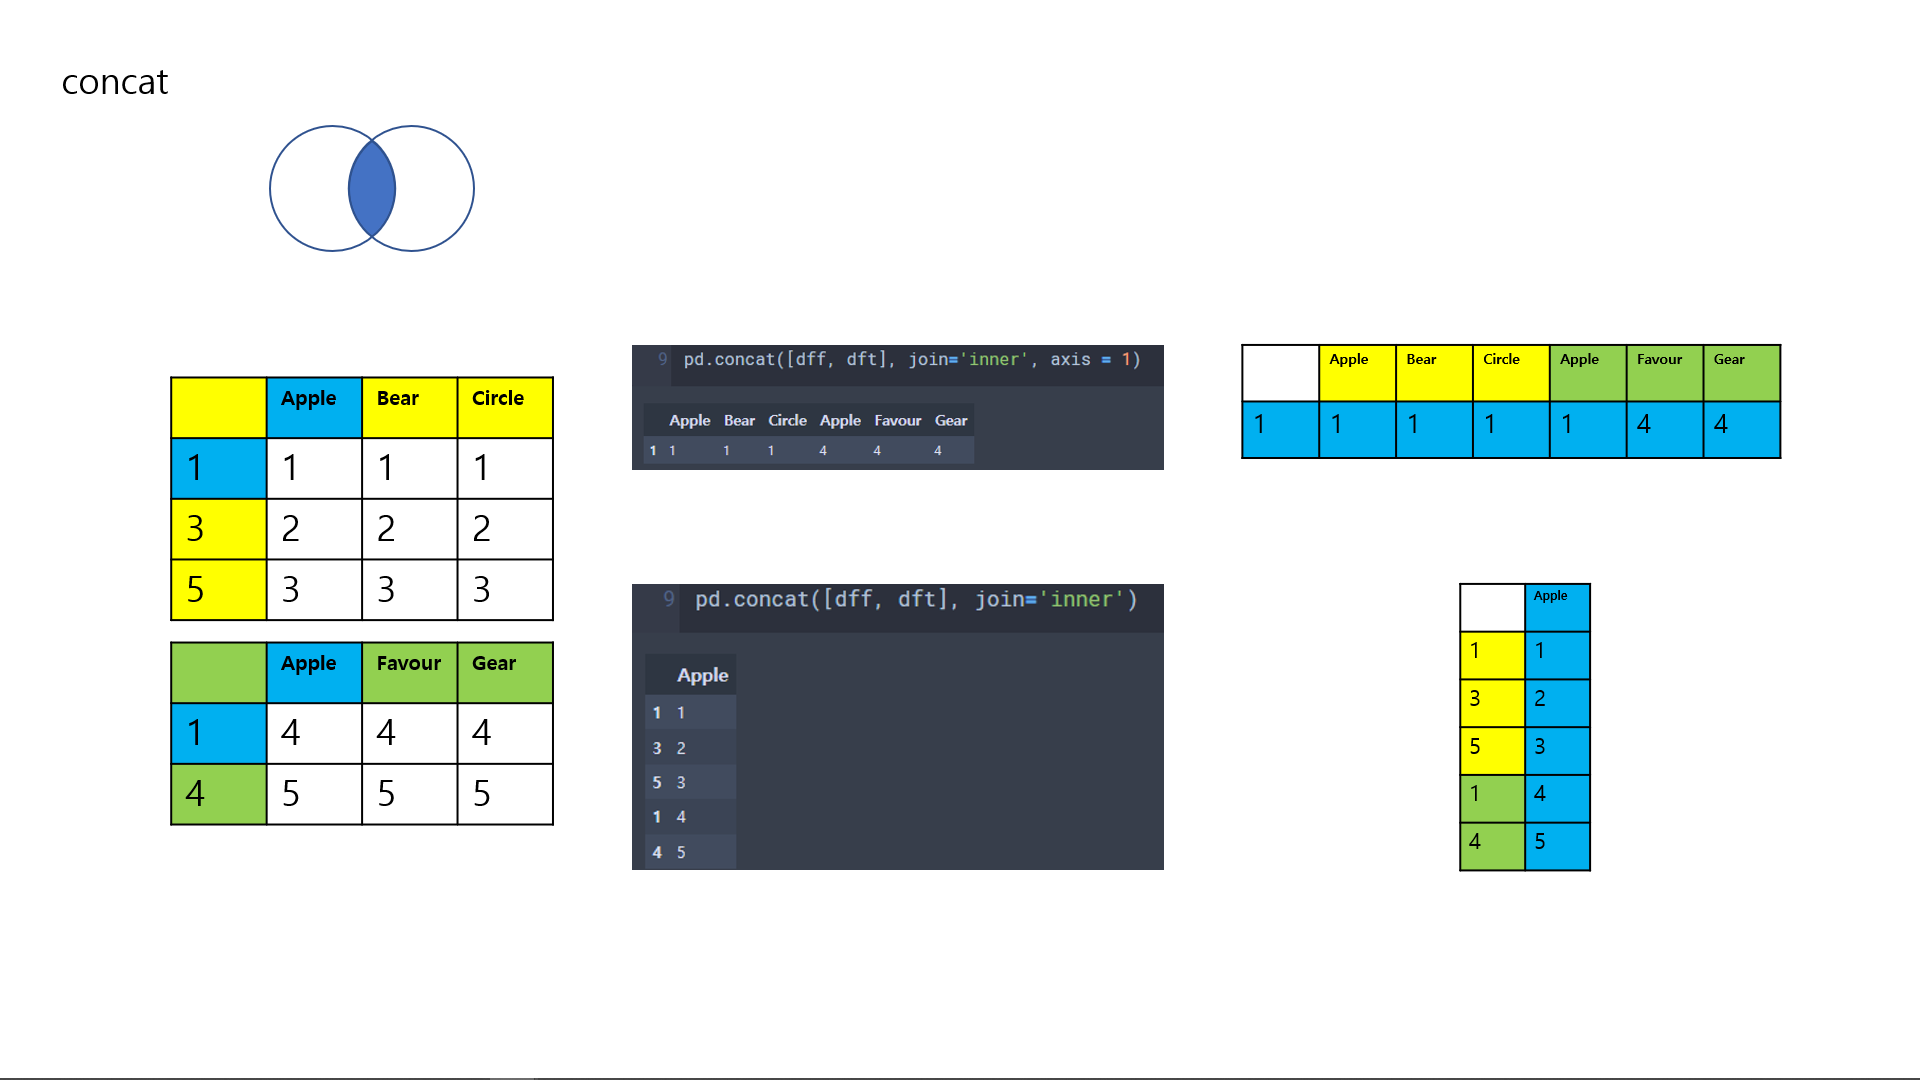

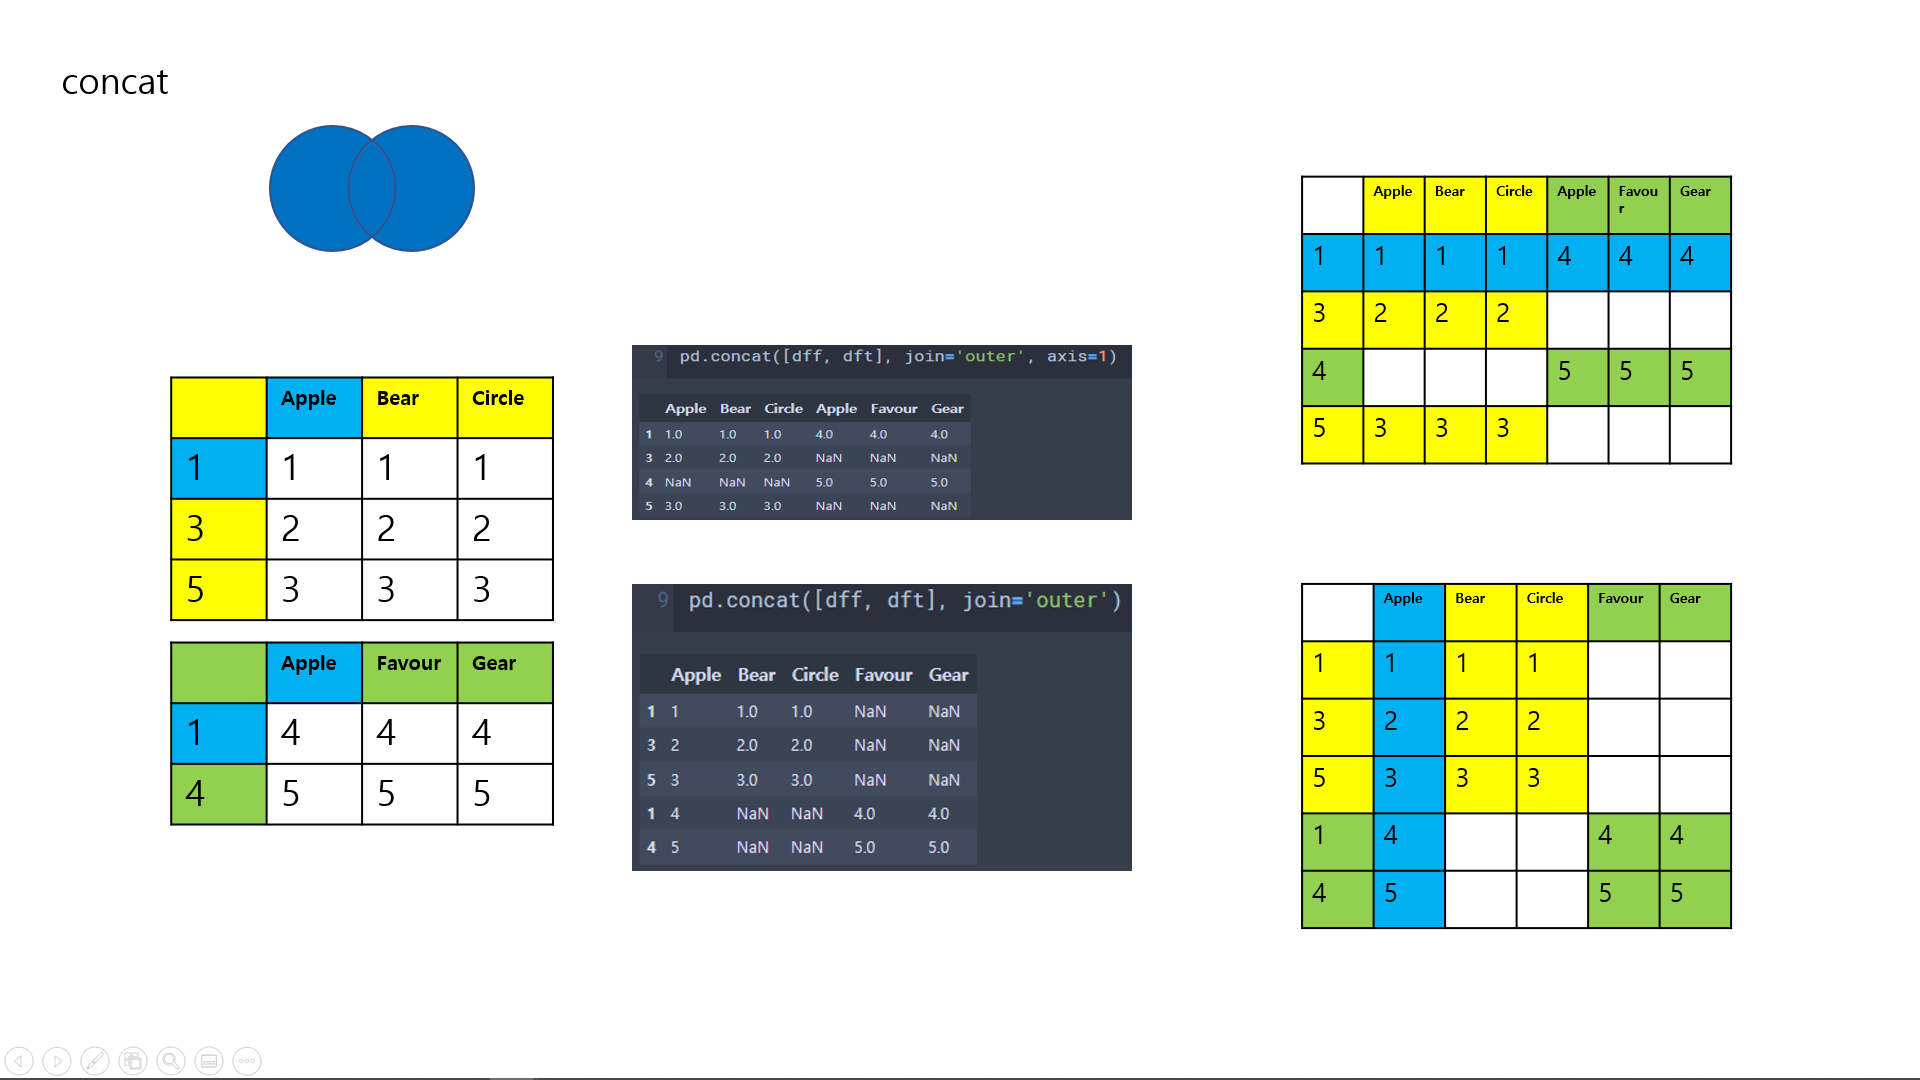

In [165]:
dff = pd.DataFrame({'Apple':[1, 2, 3],
                    'Bear':[1, 2, 3],
                    'Circle':[1, 2, 3]},
                    index = [1, 3, 5])
dft = pd.DataFrame({'Apple':[4, 5],
                    'Favour':[4, 5],
                    'Gear':[4, 5]},
                    index = [1, 4])
pd.concat([dff, dft], join='outer', axis=1)

Apple  Bear  Circle  Apple  Favour  Gear
1    1.0   1.0     1.0    4.0     4.0   4.0
3    2.0   2.0     2.0    NaN     NaN   NaN
4    NaN   NaN     NaN    5.0     5.0   5.0
5    3.0   3.0     3.0    NaN     NaN   NaN

In [166]:
s1 = pd.Series(['a','b'], index = [1, 2])
s2 = pd.Series(['c','d'], index = [3, 4])
pd.concat([s1, s2])

1    a
2    b
3    c
4    d
dtype: object

In [167]:
def create_df(cols, idx):
    data = {c: [str(c.lower()) +str(i) for i in idx] for c in cols}
    return pd.DataFrame(data, idx)

In [168]:
df1 = create_df('AB',[1,2])
df1

A   B
1  a1  b1
2  a2  b2

In [169]:
df2 = create_df('AB',[3, 4])
df2

A   B
3  a3  b3
4  a4  b4

In [170]:
pd.concat([df1,df2])
# Index의 순서에 따라 아래로 데이터 테이블이 붙음

A   B
1  a1  b1
2  a2  b2
3  a3  b3
4  a4  b4

In [171]:
df_1 = pd.DataFrame(np.random.randint(1, 9, (3, 3)), index=['Apple', 'Bannana','Circle'], columns=[1, 2, 3])
df_2 = pd.DataFrame(np.random.randint(10, 19, (3, 3)), index=['Doll','Elevator','Fine'], columns=[1, 2, 3])
pd.concat([df_1, df_2], axis=1)
# Index의 순서에 따라 아래로 데이터 테이블이 붙었으며, 테이블당 없는 컬럼에 대해서는 NaN값으로 반환함
# axis = 1: Index의 공통적인 요소를 찾아 테이블을 붙이겠다.

1    2    3     1     2     3
Apple     5.0  1.0  5.0   NaN   NaN   NaN
Bannana   3.0  4.0  6.0   NaN   NaN   NaN
Circle    2.0  6.0  7.0   NaN   NaN   NaN
Doll      NaN  NaN  NaN  16.0  13.0  14.0
Elevator  NaN  NaN  NaN  15.0  16.0  10.0
Fine      NaN  NaN  NaN  12.0  17.0  10.0

In [172]:
pd.concat([df_1, df_2])
# axis = 0: column의 공통적인 요소를 찾아 테이블을 붙이겠다.

1   2   3
Apple      5   1   5
Bannana    3   4   6
Circle     2   6   7
Doll      16  13  14
Elevator  15  16  10
Fine      12  17  10

In [173]:
df_1 = pd.DataFrame(np.random.randint(1, 9, (3, 3)), index=['Apple', 'Bannana','Circle'], columns=[1, 2, 3])
df_2 = pd.DataFrame(np.random.randint(10, 19, (3, 3)), index=['Doll','Elevator','Fine'], columns=[4, 5, 6])
pd.concat([df_1, df_2])
# Index의 순서에 따라 아래로 데이터 테이블이 붙었으며, 테이블당 없는 컬럼에 대해서는 NaN값으로 반환함

1    2    3     4     5     6
Apple     8.0  4.0  8.0   NaN   NaN   NaN
Bannana   1.0  2.0  6.0   NaN   NaN   NaN
Circle    5.0  1.0  4.0   NaN   NaN   NaN
Doll      NaN  NaN  NaN  12.0  17.0  16.0
Elevator  NaN  NaN  NaN  12.0  13.0  11.0
Fine      NaN  NaN  NaN  10.0  10.0  16.0

In [174]:
df3 = create_df('AB',[0,1])
df3

A   B
0  a0  b0
1  a1  b1

In [175]:
df4 = create_df('CD',[0,1])
df4

C   D
0  c0  d0
1  c1  d1

In [176]:
pd.concat([df3, df4])

A    B    C    D
0   a0   b0  NaN  NaN
1   a1   b1  NaN  NaN
0  NaN  NaN   c0   d0
1  NaN  NaN   c1   d1

In [177]:
pd.concat([df3, df4], axis=1)

A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1

In [178]:
df7 = create_df('AB', [0, 1])
df8 = create_df('AB', [2, 3])
pd.concat([df7, df8])

A   B
0  a0  b0
1  a1  b1
2  a2  b2
3  a3  b3

In [179]:
pd.concat([df7, df8], axis =1)

A    B    A    B
0   a0   b0  NaN  NaN
1   a1   b1  NaN  NaN
2  NaN  NaN   a2   b2
3  NaN  NaN   a3   b3

In [180]:
df_5 = pd.DataFrame({1:[1, 2, 3], 3:[4, 5, 6], 5:[7, 8, 9]},
                    index = [1, 2, 3])
df_6 = pd.DataFrame({1:[1, 3, 4], 2:[1, 1, 1], 4:[7, 8, 9]},
                    index = [1, 2, 3])
pd.concat([df_5, df_6])

1    2    3    4    5
1  1  NaN  4.0  NaN  7.0
2  2  NaN  5.0  NaN  8.0
3  3  NaN  6.0  NaN  9.0
1  1  1.0  NaN  7.0  NaN
2  3  1.0  NaN  8.0  NaN
3  4  1.0  NaN  9.0  NaN

In [181]:
df_7 = pd.DataFrame({1:[1, 2, 3], 3:[4, 5, 6], 5:[7, 8, 9]})
df_8 = pd.DataFrame({2:[1, 1, 1], 4:[7, 8, 9], 6:[8, 9, 0]})
pd.concat([df_7, df_8])

1    2    3    4    5    6
0  1.0  NaN  4.0  NaN  7.0  NaN
1  2.0  NaN  5.0  NaN  8.0  NaN
2  3.0  NaN  6.0  NaN  9.0  NaN
0  NaN  1.0  NaN  7.0  NaN  8.0
1  NaN  1.0  NaN  8.0  NaN  9.0
2  NaN  1.0  NaN  9.0  NaN  0.0

In [182]:
pd.concat([df_7, df_8], axis=1).sort_index(axis=1)

1  2  3  4  5  6
0  1  1  4  7  7  8
1  2  1  5  8  8  9
2  3  1  6  9  9  0

In [183]:
pd.concat([df_5, df_6], axis=1).sort_index(axis=1)

1  1  2  3  4  5
1  1  1  1  4  7  7
2  2  3  1  5  8  8
3  3  4  1  6  9  9

concat은 하나의 공통된 기준을 가지고 테이블을 합치는 것이다.  
만약 공통된 기준이 존재하지 않으면 NaN값으로 채워진다.  
공통된 기준은 axis를 기준으로 하며, 기본값은 axis=0다.<br>
<br>
axis=0: 두 테이블의 컬럼을 기준으로 합친다.  
axis=1: 두 테이블의 인덱스를 기준으로 합친다.

In [184]:
pd.concat([df_5, df_6], join='inner')

1
1  1
2  2
3  3
1  1
2  3
3  4

In [185]:
pd.concat([df_5, df_6], join='inner', axis=1)

1  3  5  1  2  4
1  1  4  7  1  1  7
2  2  5  8  3  1  8
3  3  6  9  4  1  9

In [186]:
df5 = create_df('ABC',[1, 2])
df6 = create_df('BCD',[3, 4])
pd.concat([df5, df6])

A   B   C    D
1   a1  b1  c1  NaN
2   a2  b2  c2  NaN
3  NaN  b3  c3   d3
4  NaN  b4  c4   d4

In [187]:
pd.concat([df5, df6],join='inner')

B   C
1  b1  c1
2  b2  c2
3  b3  c3
4  b4  c4

## 병합과 조인
merge는 공통된 컬럼을 기준으로 공통된 값을 기준으로 두 테이블을 병합한다.  
주의점: 기준이 된 컬럼의 공통된 값으로 인하여 테이블의 크기가 변화할 수 있다!!

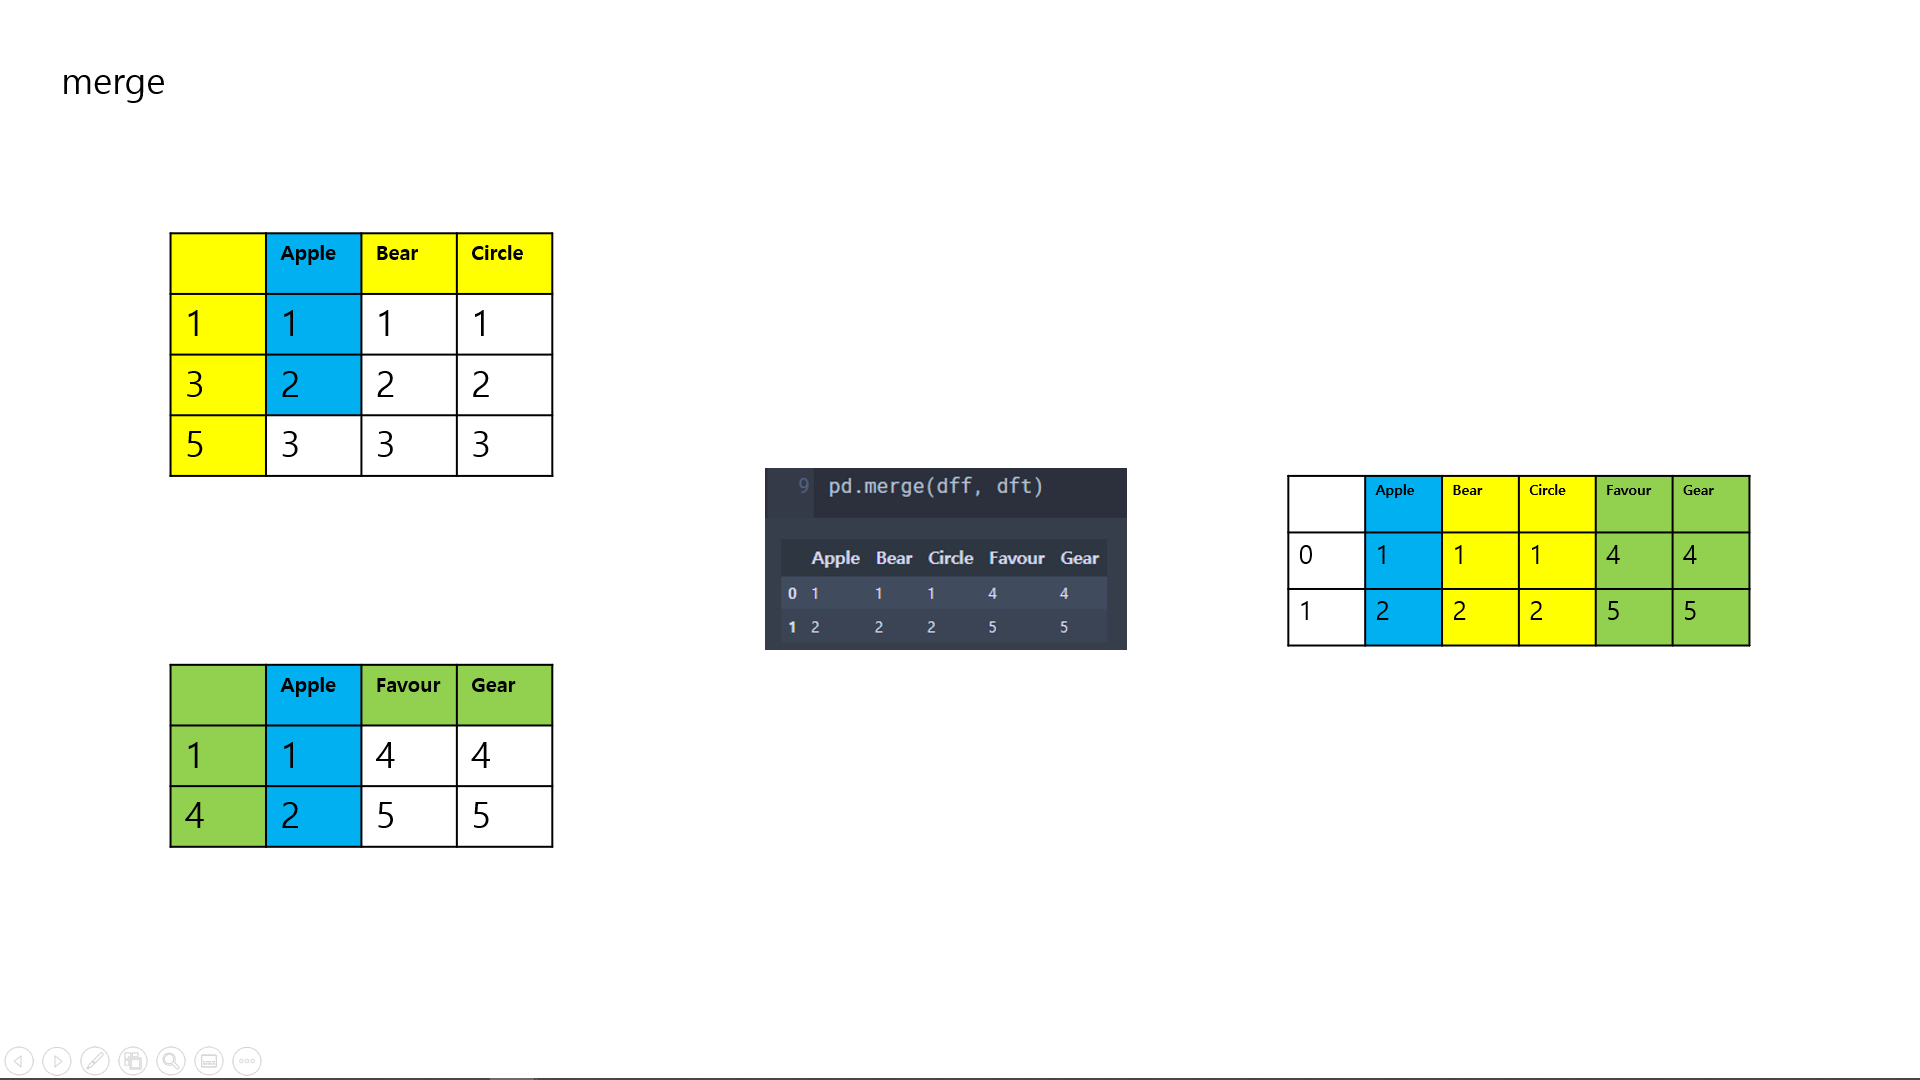

In [188]:
dff = pd.DataFrame({'Apple':[1, 2, 3],
                    'Bear':[1, 2, 3],
                    'Circle':[1, 2, 3]},
                    index = [1, 3, 5])
dft = pd.DataFrame({'Apple':[1, 2],
                    'Favour':[4, 5],
                    'Gear':[4, 5]},
                    index = [1, 4])
pd.merge(dff, dft)

Apple  Bear  Circle  Favour  Gear
0      1     1       1       4     4
1      2     2       2       5     5

In [189]:
df1 = pd.DataFrame({'학생':['홍길동','이순신','임꺽정','김유신'],
                    '학과':['경영학과','교육학과','컴퓨터학과','통계학과']})
df1

학생     학과
0  홍길동   경영학과
1  이순신   교육학과
2  임꺽정  컴퓨터학과
3  김유신   통계학과

In [190]:
df2 = pd.DataFrame({'학생':['홍길동','이순신','임꺽정','김유신'],
                    '입학년도':[2012, 2016, 2019, 2020]})
df2

학생  입학년도
0  홍길동  2012
1  이순신  2016
2  임꺽정  2019
3  김유신  2020

In [191]:
df3 = pd.merge(df1, df2)
df3

학생     학과  입학년도
0  홍길동   경영학과  2012
1  이순신   교육학과  2016
2  임꺽정  컴퓨터학과  2019
3  김유신   통계학과  2020

In [192]:
df_3 = pd.concat([df1, df2])
df_3

학생     학과    입학년도
0  홍길동   경영학과     NaN
1  이순신   교육학과     NaN
2  임꺽정  컴퓨터학과     NaN
3  김유신   통계학과     NaN
0  홍길동    NaN  2012.0
1  이순신    NaN  2016.0
2  임꺽정    NaN  2019.0
3  김유신    NaN  2020.0

In [193]:
df4 = pd.DataFrame({'학과':['경영학과','교육학과','컴퓨터학과','통계학과'],
                    '학과장':['황희','장영실','안창호','정약용']})
df4

학과  학과장
0   경영학과   황희
1   교육학과  장영실
2  컴퓨터학과  안창호
3   통계학과  정약용

In [194]:
pd.merge(df3, df4)
# df3와 df4에 '학과'라는 공통된 컬럼이 있었기 때문에 merge가 가능

학생     학과  입학년도  학과장
0  홍길동   경영학과  2012   황희
1  이순신   교육학과  2016  장영실
2  임꺽정  컴퓨터학과  2019  안창호
3  김유신   통계학과  2020  정약용

In [195]:
pd.concat([df3, df4], join='inner', axis=1)

학생     학과  입학년도     학과  학과장
0  홍길동   경영학과  2012   경영학과   황희
1  이순신   교육학과  2016   교육학과  장영실
2  임꺽정  컴퓨터학과  2019  컴퓨터학과  안창호
3  김유신   통계학과  2020   통계학과  정약용

In [196]:
df5 = pd.DataFrame({'학과':['경영학과','교육학과','교육학과','컴퓨터학과','컴퓨터학과','통계학과'],
                    '과목':['경영학개론','기초수학','물리학','프로그래밍','운영체제','확률론']})
df5

학과     과목
0   경영학과  경영학개론
1   교육학과   기초수학
2   교육학과    물리학
3  컴퓨터학과  프로그래밍
4  컴퓨터학과   운영체제
5   통계학과    확률론

In [197]:
df1

학생     학과
0  홍길동   경영학과
1  이순신   교육학과
2  임꺽정  컴퓨터학과
3  김유신   통계학과

In [198]:
df5

학과     과목
0   경영학과  경영학개론
1   교육학과   기초수학
2   교육학과    물리학
3  컴퓨터학과  프로그래밍
4  컴퓨터학과   운영체제
5   통계학과    확률론

In [199]:
pd.merge(df1, df5)
# merge를 할 수 있는 조건은 공통된 column이 존재해야 한다는 것이다.
# df1과 df5의 공통 column은 '학과' column이다.
# df5는 학과를 기준으로 6개의 정보가 있지만
# df1은 학과를 기준으로 4개의 정보밖에 없다.
# concat과 달리 공통된 column에 대한 정보를 합집합 개념으로 모두 포함하여
# 두 테이블을 합친다.

학생     학과     과목
0  홍길동   경영학과  경영학개론
1  이순신   교육학과   기초수학
2  이순신   교육학과    물리학
3  임꺽정  컴퓨터학과  프로그래밍
4  임꺽정  컴퓨터학과   운영체제
5  김유신   통계학과    확률론

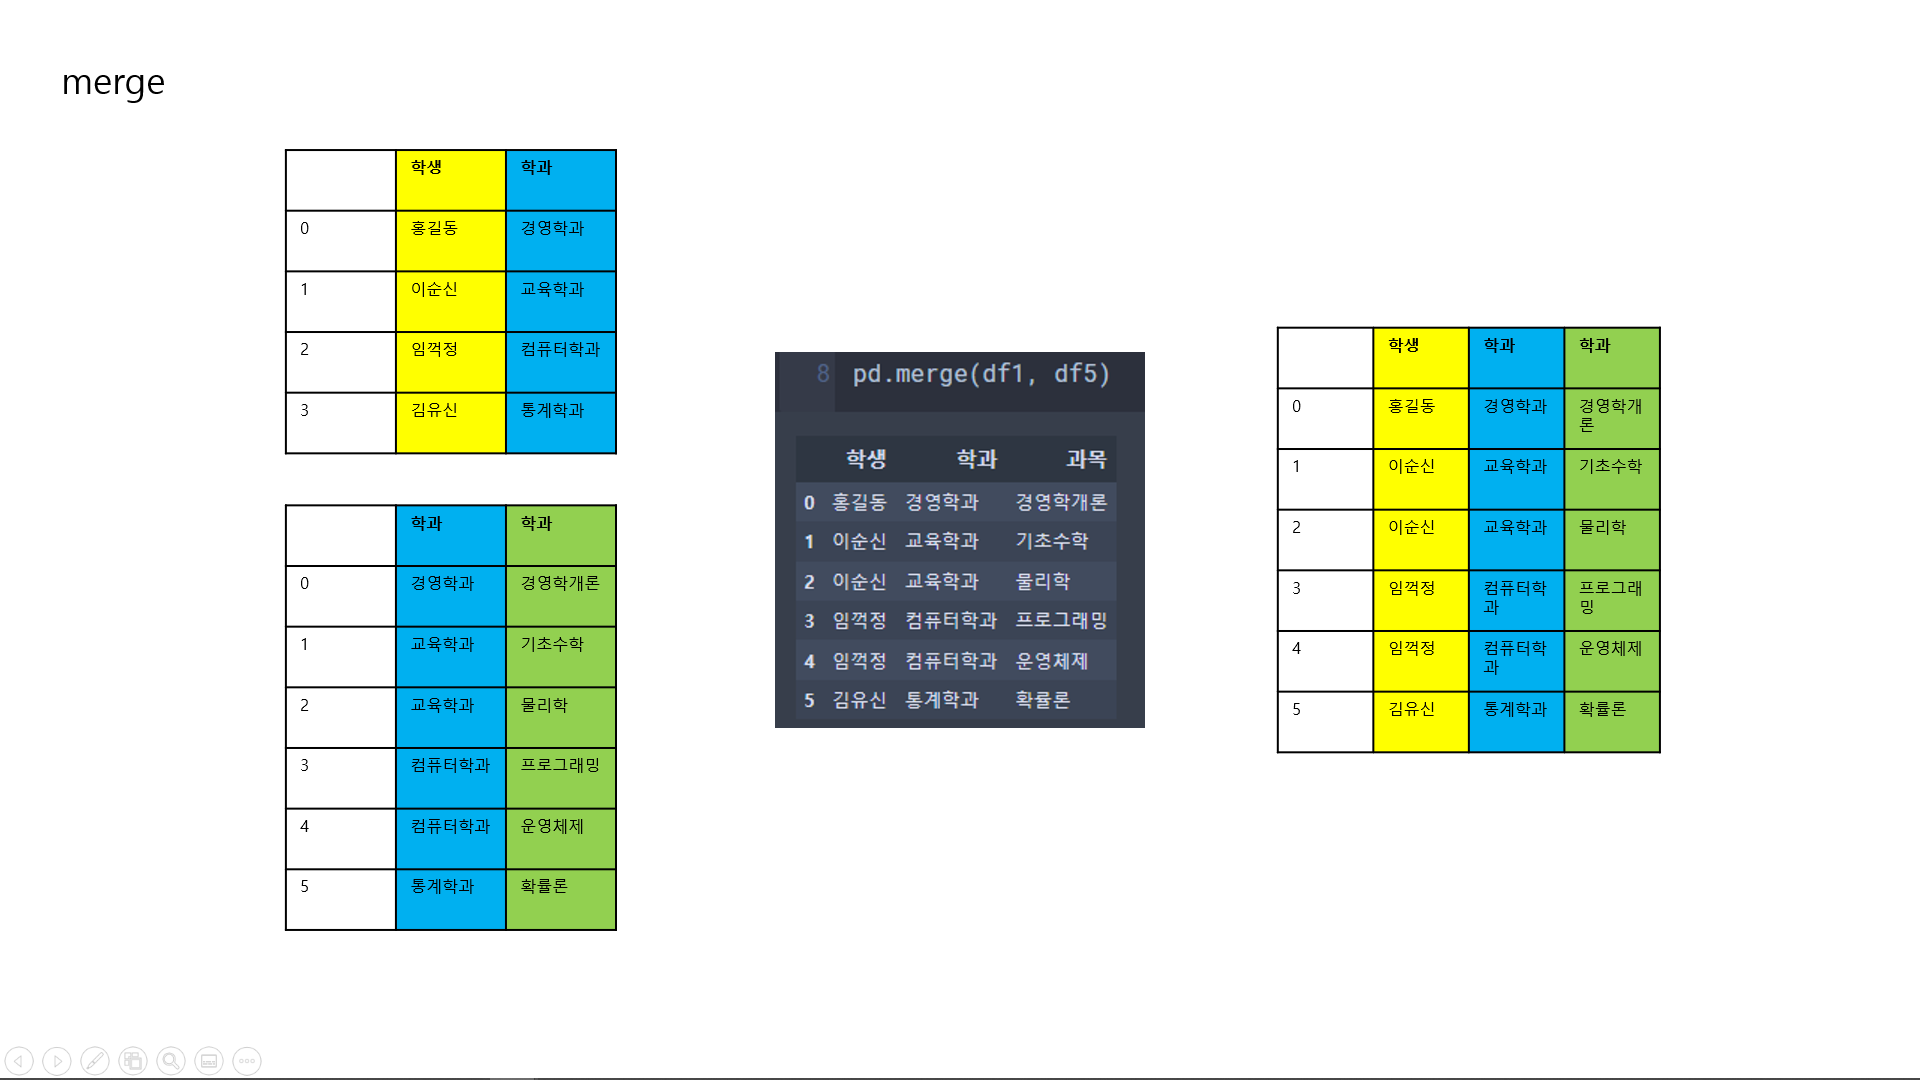

In [200]:
pd.concat([df1, df5])

학생     학과     과목
0  홍길동   경영학과    NaN
1  이순신   교육학과    NaN
2  임꺽정  컴퓨터학과    NaN
3  김유신   통계학과    NaN
0  NaN   경영학과  경영학개론
1  NaN   교육학과   기초수학
2  NaN   교육학과    물리학
3  NaN  컴퓨터학과  프로그래밍
4  NaN  컴퓨터학과   운영체제
5  NaN   통계학과    확률론

In [201]:
pd.merge(df1, df5, on='학과')

학생     학과     과목
0  홍길동   경영학과  경영학개론
1  이순신   교육학과   기초수학
2  이순신   교육학과    물리학
3  임꺽정  컴퓨터학과  프로그래밍
4  임꺽정  컴퓨터학과   운영체제
5  김유신   통계학과    확률론

In [202]:
pd.merge(df1, df2)

학생     학과  입학년도
0  홍길동   경영학과  2012
1  이순신   교육학과  2016
2  임꺽정  컴퓨터학과  2019
3  김유신   통계학과  2020

In [203]:
df6 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                    '성적':['A','A+','B','A+']})
df6

이름  성적
0  홍길동   A
1  이순신  A+
2  임꺽정   B
3  김유신  A+

In [204]:
df1

학생     학과
0  홍길동   경영학과
1  이순신   교육학과
2  임꺽정  컴퓨터학과
3  김유신   통계학과

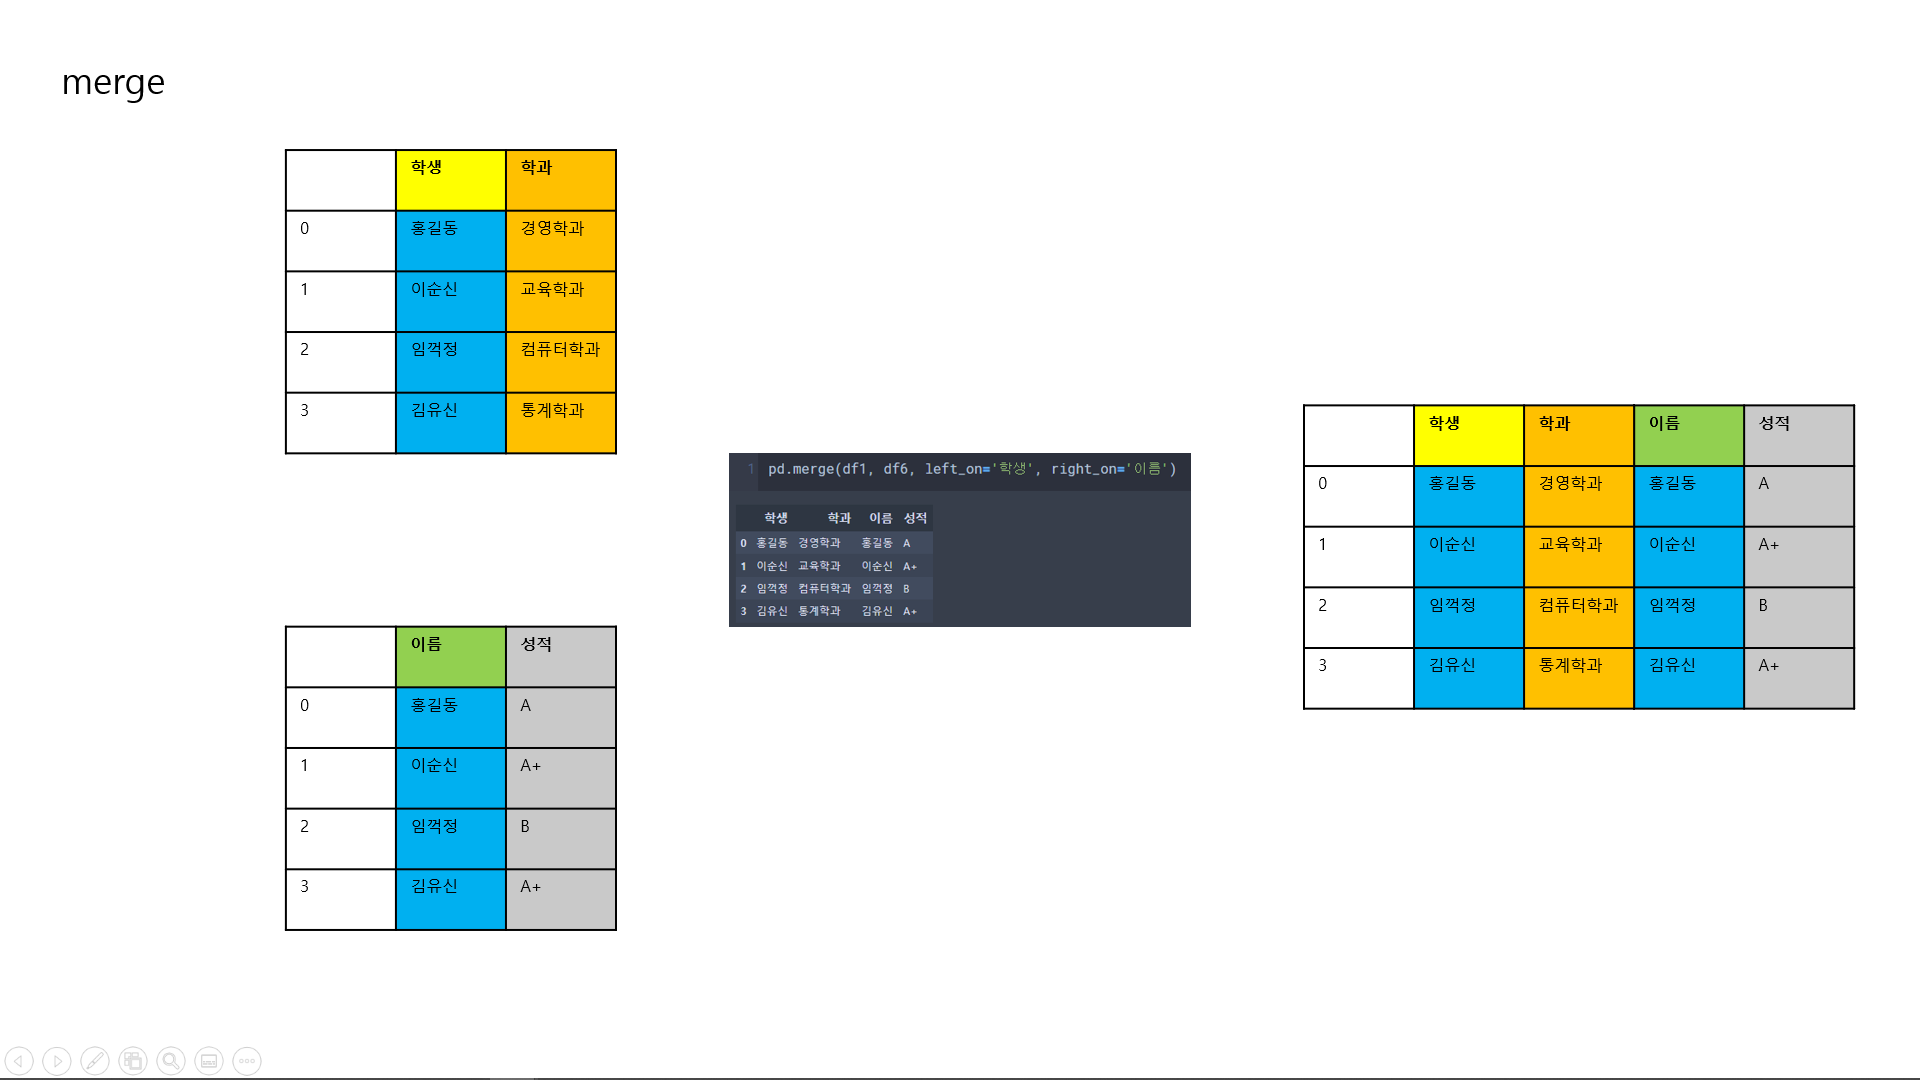

In [205]:
pd.merge(df1, df6, left_on='학생', right_on='이름')
# 같은 값이 존재하지만 columns명이 다를 때 left_on과 right_on을 써서 강제적으로 붙여줄 수 있다.

학생     학과   이름  성적
0  홍길동   경영학과  홍길동   A
1  이순신   교육학과  이순신  A+
2  임꺽정  컴퓨터학과  임꺽정   B
3  김유신   통계학과  김유신  A+

### 공통된 index가 있는 두 테이블을 합치기
공통된 index가 있는 두 테이블을 합치는 방법엔 두가지 방법이 있다.  
1. pd.merge에서 left_index=True, right_on='colunm명'을 쓰는 방법과  
2. table1.join(table2)가 있다.  
  
그러나 이 두 가지 방법 모두 공통된 index가 존재하여야 한다.

In [206]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [207]:
mdf1

학과
학생        
홍길동   경영학과
이순신   교육학과
임꺽정  컴퓨터학과
김유신   통계학과

In [208]:
mdf2

입학년도
학생       
홍길동  2012
이순신  2016
임꺽정  2019
김유신  2020

In [209]:
pd.merge(mdf1, mdf2, left_index=True, right_index=True)

학과  입학년도
학생              
홍길동   경영학과  2012
이순신   교육학과  2016
임꺽정  컴퓨터학과  2019
김유신   통계학과  2020

In [210]:
book = pd.DataFrame({'제목':['기계학습','현대통계학', '알고리즘 입문', '태블로'],
                     '가격':[50000, 15000, 30000, 12000]})
book

제목     가격
0     기계학습  50000
1    현대통계학  15000
2  알고리즘 입문  30000
3      태블로  12000

In [211]:
publisher = pd.DataFrame({'제목':['기계학습','현대통계학', '알고리즘 입문', '태블로'],
                          '출판사':['한빛아카데미','다산출판사','이지스퍼블리싱','태블로']})
publisher

제목      출판사
0     기계학습   한빛아카데미
1    현대통계학    다산출판사
2  알고리즘 입문  이지스퍼블리싱
3      태블로      태블로

In [212]:
book1 = book.set_index('제목')
book1

가격
제목            
기계학습     50000
현대통계학    15000
알고리즘 입문  30000
태블로      12000

In [213]:
publisher2 = publisher.set_index('제목')
publisher2

출판사
제목              
기계학습      한빛아카데미
현대통계학      다산출판사
알고리즘 입문  이지스퍼블리싱
태블로          태블로

In [214]:
pd.merge(book1, publisher2, left_index=True, right_on='제목')

가격      출판사
제목                     
기계학습     50000   한빛아카데미
현대통계학    15000    다산출판사
알고리즘 입문  30000  이지스퍼블리싱
태블로      12000      태블로

In [215]:
running_score = pd.DataFrame({'학생':['철수','바둑이','강철','철민','민수'],
                              '달리기 기록':[9.14, 9.06, 8.94, 9.65, 8.99]})
r_i = running_score.set_index('학생')
r_i

달리기 기록
학생         
철수     9.14
바둑이    9.06
강철     8.94
철민     9.65
민수     8.99

In [216]:
metal_pole = pd.DataFrame({'학생':['철수','바둑이','강철','철민','민수'],
                           '철봉 기록':[15.77, 17.88, 14.22, 16.41, 21.19]})
m_i = metal_pole.set_index('학생')
m_i

철봉 기록
학생        
철수   15.77
바둑이  17.88
강철   14.22
철민   16.41
민수   21.19

In [217]:
football_score = pd.DataFrame({'학생':['철수','바둑이','강철','철민','민수'],
                               '골인 기록':[5, 3, 4, 5, 1]})
f_i = football_score.set_index('학생')
f_i

골인 기록
학생        
철수       5
바둑이      3
강철       4
철민       5
민수       1

In [218]:
t_i = pd.merge(r_i, m_i, left_index=True, right_on='학생')
t_i

달리기 기록  철봉 기록
학생                
철수     9.14  15.77
바둑이    9.06  17.88
강철     8.94  14.22
철민     9.65  16.41
민수     8.99  21.19

In [219]:
r_i.join(m_i)

달리기 기록  철봉 기록
학생                
철수     9.14  15.77
바둑이    9.06  17.88
강철     8.94  14.22
철민     9.65  16.41
민수     8.99  21.19

In [220]:
t_t = pd.merge(t_i, f_i, left_index=True, right_on='학생')
t_t

달리기 기록  철봉 기록  골인 기록
학생                       
철수     9.14  15.77      5
바둑이    9.06  17.88      3
강철     8.94  14.22      4
철민     9.65  16.41      5
민수     8.99  21.19      1

In [221]:
t_i.join(f_i)

달리기 기록  철봉 기록  골인 기록
학생                       
철수     9.14  15.77      5
바둑이    9.06  17.88      3
강철     8.94  14.22      4
철민     9.65  16.41      5
민수     8.99  21.19      1

In [222]:
mdf1.join(mdf2)

학과  입학년도
학생              
홍길동   경영학과  2012
이순신   교육학과  2016
임꺽정  컴퓨터학과  2019
김유신   통계학과  2020

In [223]:
pd.merge(mdf1, df6, left_index = True, right_on='이름')

학과   이름  성적
0   경영학과  홍길동   A
1   교육학과  이순신  A+
2  컴퓨터학과  임꺽정   B
3   통계학과  김유신  A+

In [224]:
df6

이름  성적
0  홍길동   A
1  이순신  A+
2  임꺽정   B
3  김유신  A+

In [225]:
mdf1

학과
학생        
홍길동   경영학과
이순신   교육학과
임꺽정  컴퓨터학과
김유신   통계학과

### inner /  outer join

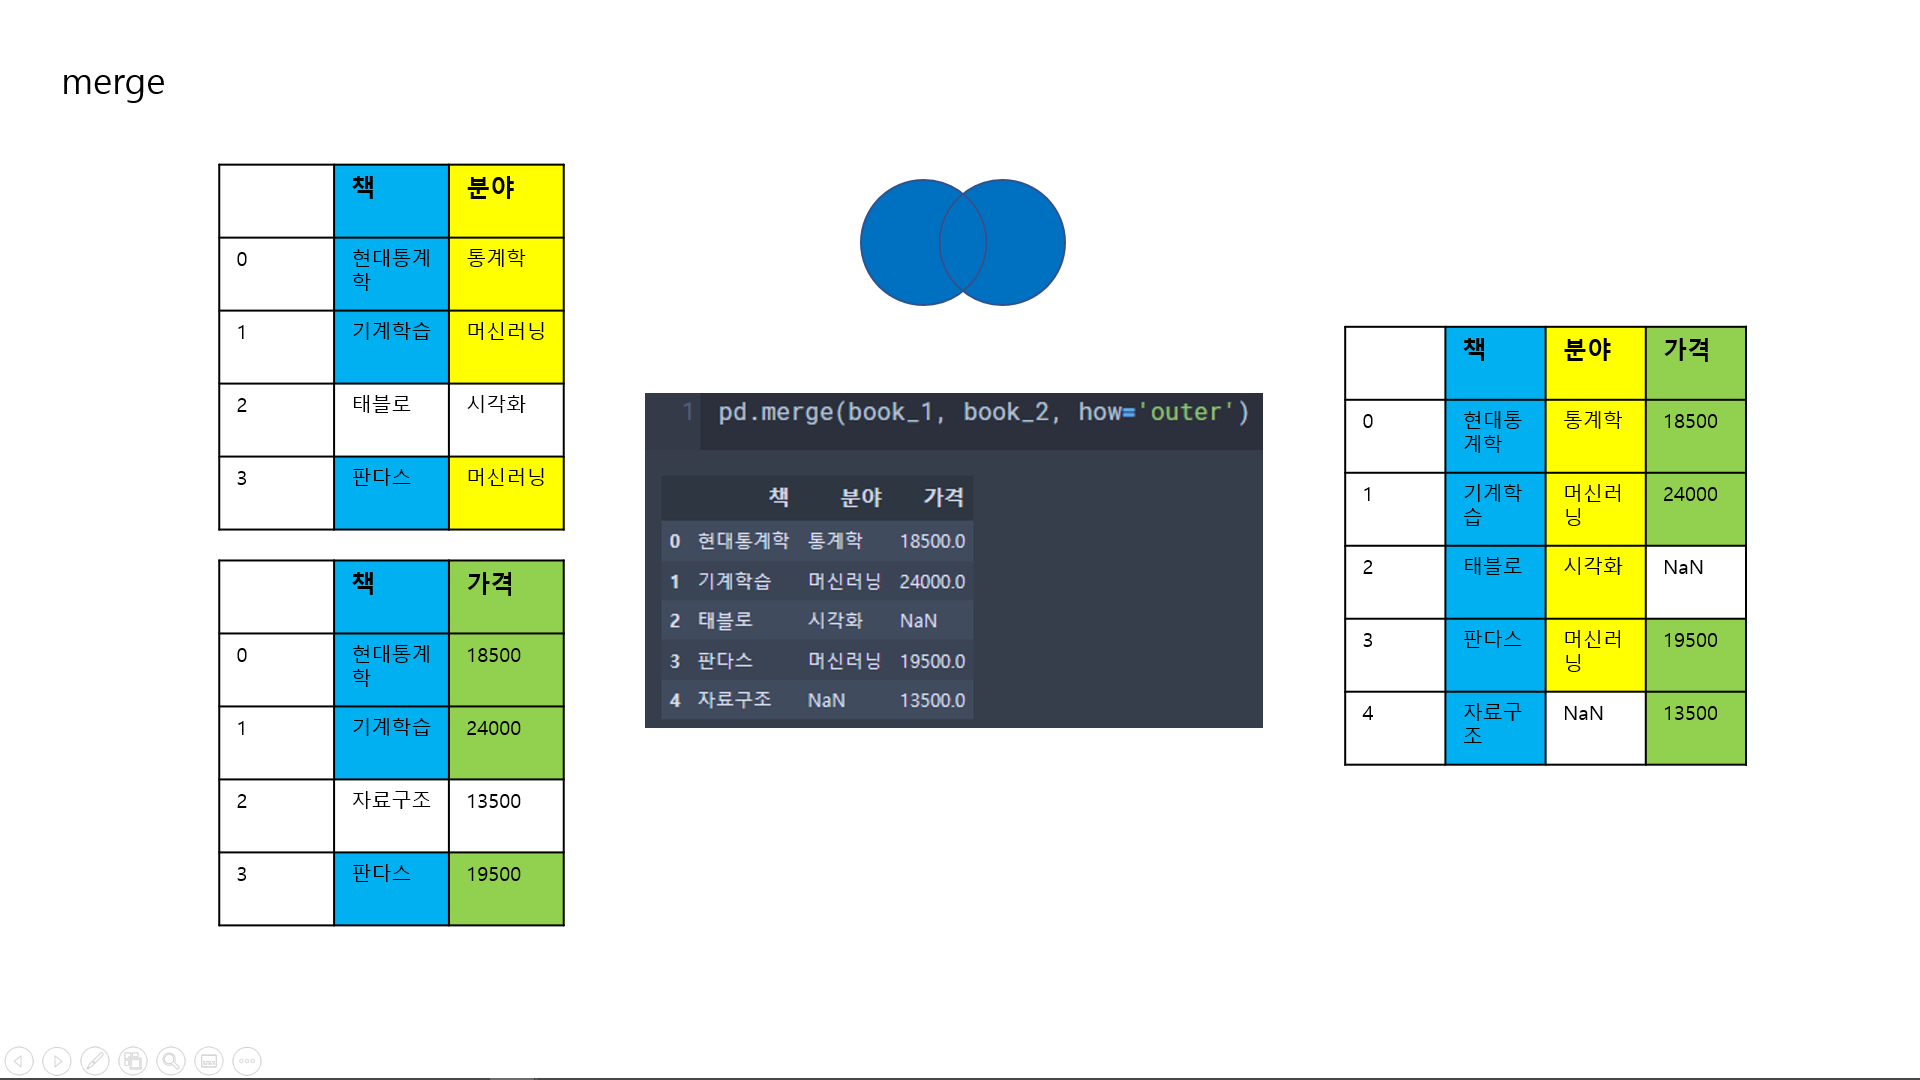

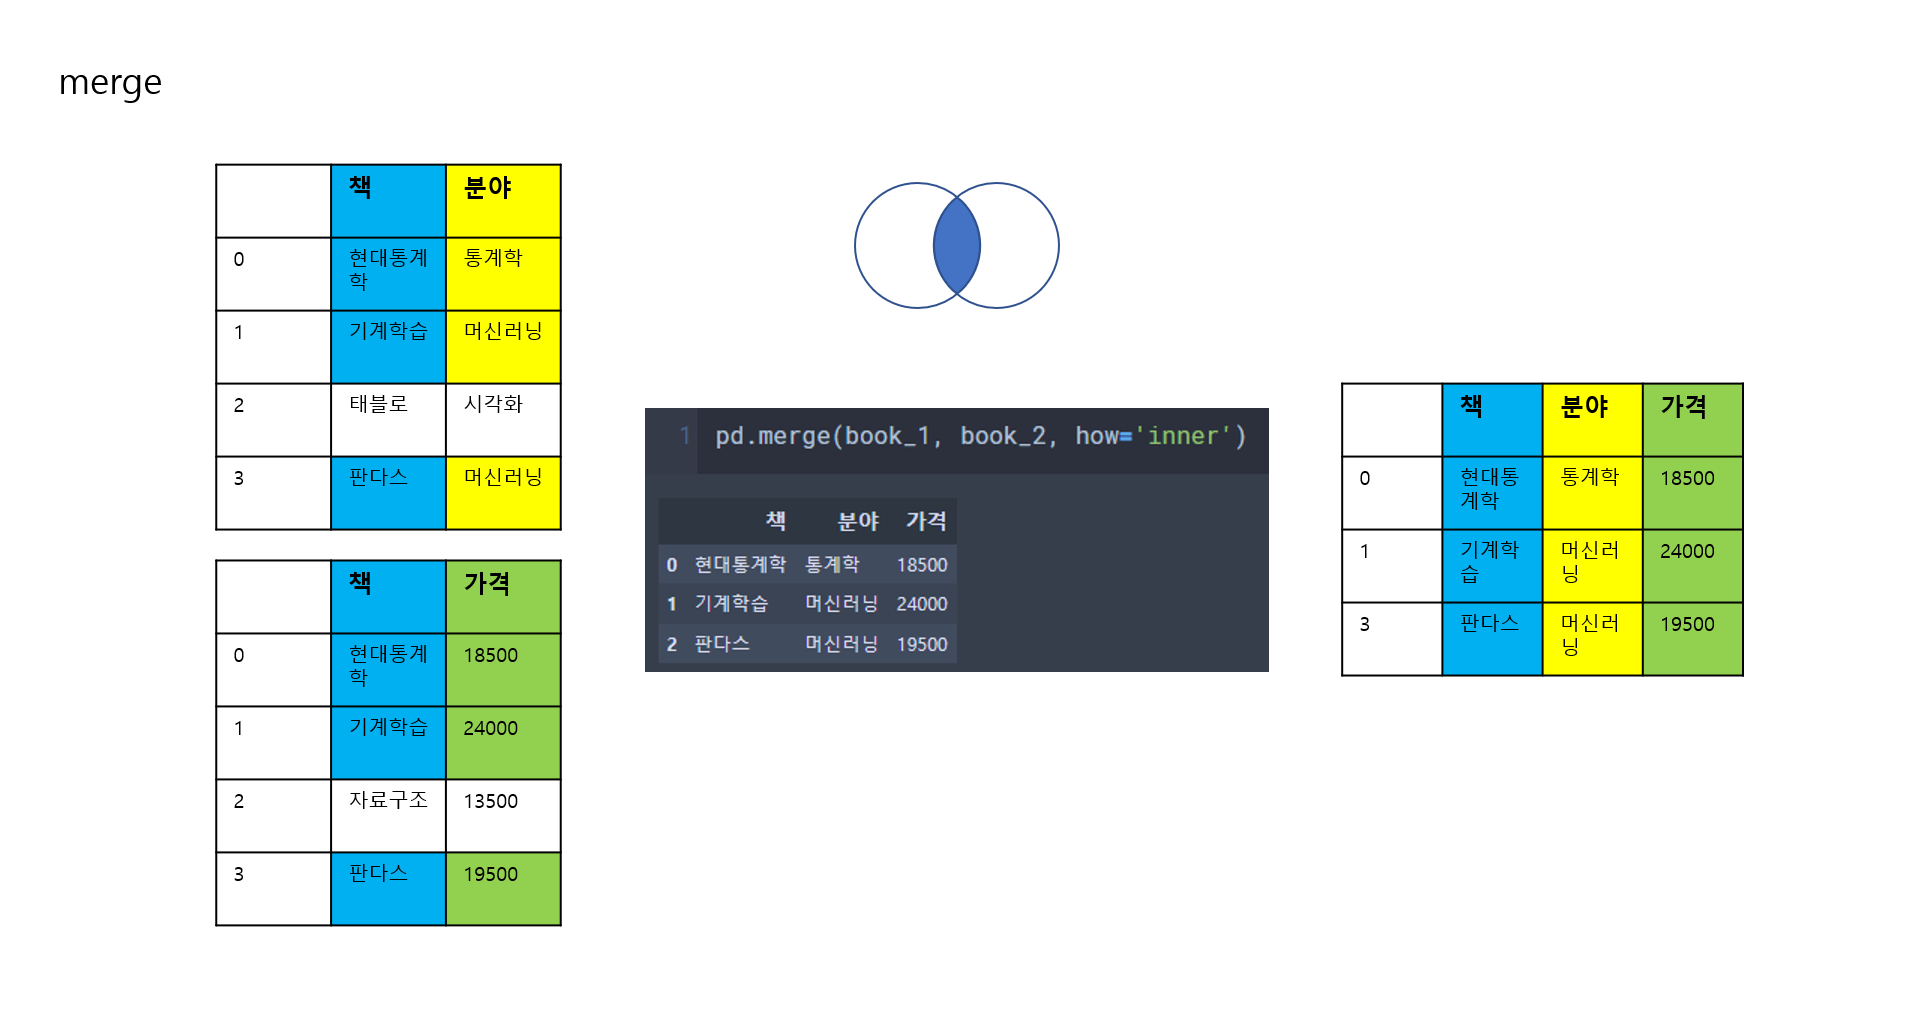

In [226]:
df7 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정'],
                    '주문음식':['햄버거','피자','짜장면']})
df7

이름 주문음식
0  홍길동  햄버거
1  이순신   피자
2  임꺽정  짜장면

In [227]:
df8 = pd.DataFrame({'이름':['홍길동','이순신','김유신'],
                    '주문음료':['콜라','사이다','커피']})
df8

이름 주문음료
0  홍길동   콜라
1  이순신  사이다
2  김유신   커피

In [228]:
pd.merge(df7, df8)

이름 주문음식 주문음료
0  홍길동  햄버거   콜라
1  이순신   피자  사이다

In [229]:
pd.merge(df7, df8, how='inner')

이름 주문음식 주문음료
0  홍길동  햄버거   콜라
1  이순신   피자  사이다

In [230]:
pd.merge(df7, df8, how='outer')

이름 주문음식 주문음료
0  홍길동  햄버거   콜라
1  이순신   피자  사이다
2  임꺽정  짜장면  NaN
3  김유신  NaN   커피

In [231]:
pd.concat([df7, df8])

이름 주문음식 주문음료
0  홍길동  햄버거  NaN
1  이순신   피자  NaN
2  임꺽정  짜장면  NaN
0  홍길동  NaN   콜라
1  이순신  NaN  사이다
2  김유신  NaN   커피

In [232]:
book_1 = pd.DataFrame({'책':['현대통계학','기계학습','태블로','판다스'],
                       '분야':['통계학','머신러닝','시각화','머신러닝']})
book_1

책    분야
0  현대통계학   통계학
1   기계학습  머신러닝
2    태블로   시각화
3    판다스  머신러닝

In [233]:
book_2 = pd.DataFrame({'책':['현대통계학','기계학습','자료구조','판다스'],
                       '가격':[18500, 24000, 13500, 19500]})
book_2

책     가격
0  현대통계학  18500
1   기계학습  24000
2   자료구조  13500
3    판다스  19500

In [234]:
pd.merge(book_1, book_2, how='inner')

책    분야     가격
0  현대통계학   통계학  18500
1   기계학습  머신러닝  24000
2    판다스  머신러닝  19500

In [235]:
pd.merge(book_1, book_2, how='outer')

책    분야       가격
0  현대통계학   통계학  18500.0
1   기계학습  머신러닝  24000.0
2    태블로   시각화      NaN
3    판다스  머신러닝  19500.0
4   자료구조   NaN  13500.0

### left / right 

In [236]:
pd.merge(book_1, book_2, how='left')

책    분야       가격
0  현대통계학   통계학  18500.0
1   기계학습  머신러닝  24000.0
2    태블로   시각화      NaN
3    판다스  머신러닝  19500.0

In [237]:
pd.merge(book_1, book_2, how='right')

책    분야     가격
0  현대통계학   통계학  18500
1   기계학습  머신러닝  24000
2   자료구조   NaN  13500
3    판다스  머신러닝  19500

In [238]:
pd.merge(df7,df8, how='left')

이름 주문음식 주문음료
0  홍길동  햄버거   콜라
1  이순신   피자  사이다
2  임꺽정  짜장면  NaN

In [239]:
pd.merge(df7, df8, how='right')

이름 주문음식 주문음료
0  홍길동  햄버거   콜라
1  이순신   피자  사이다
2  김유신  NaN   커피

### on / suffixes

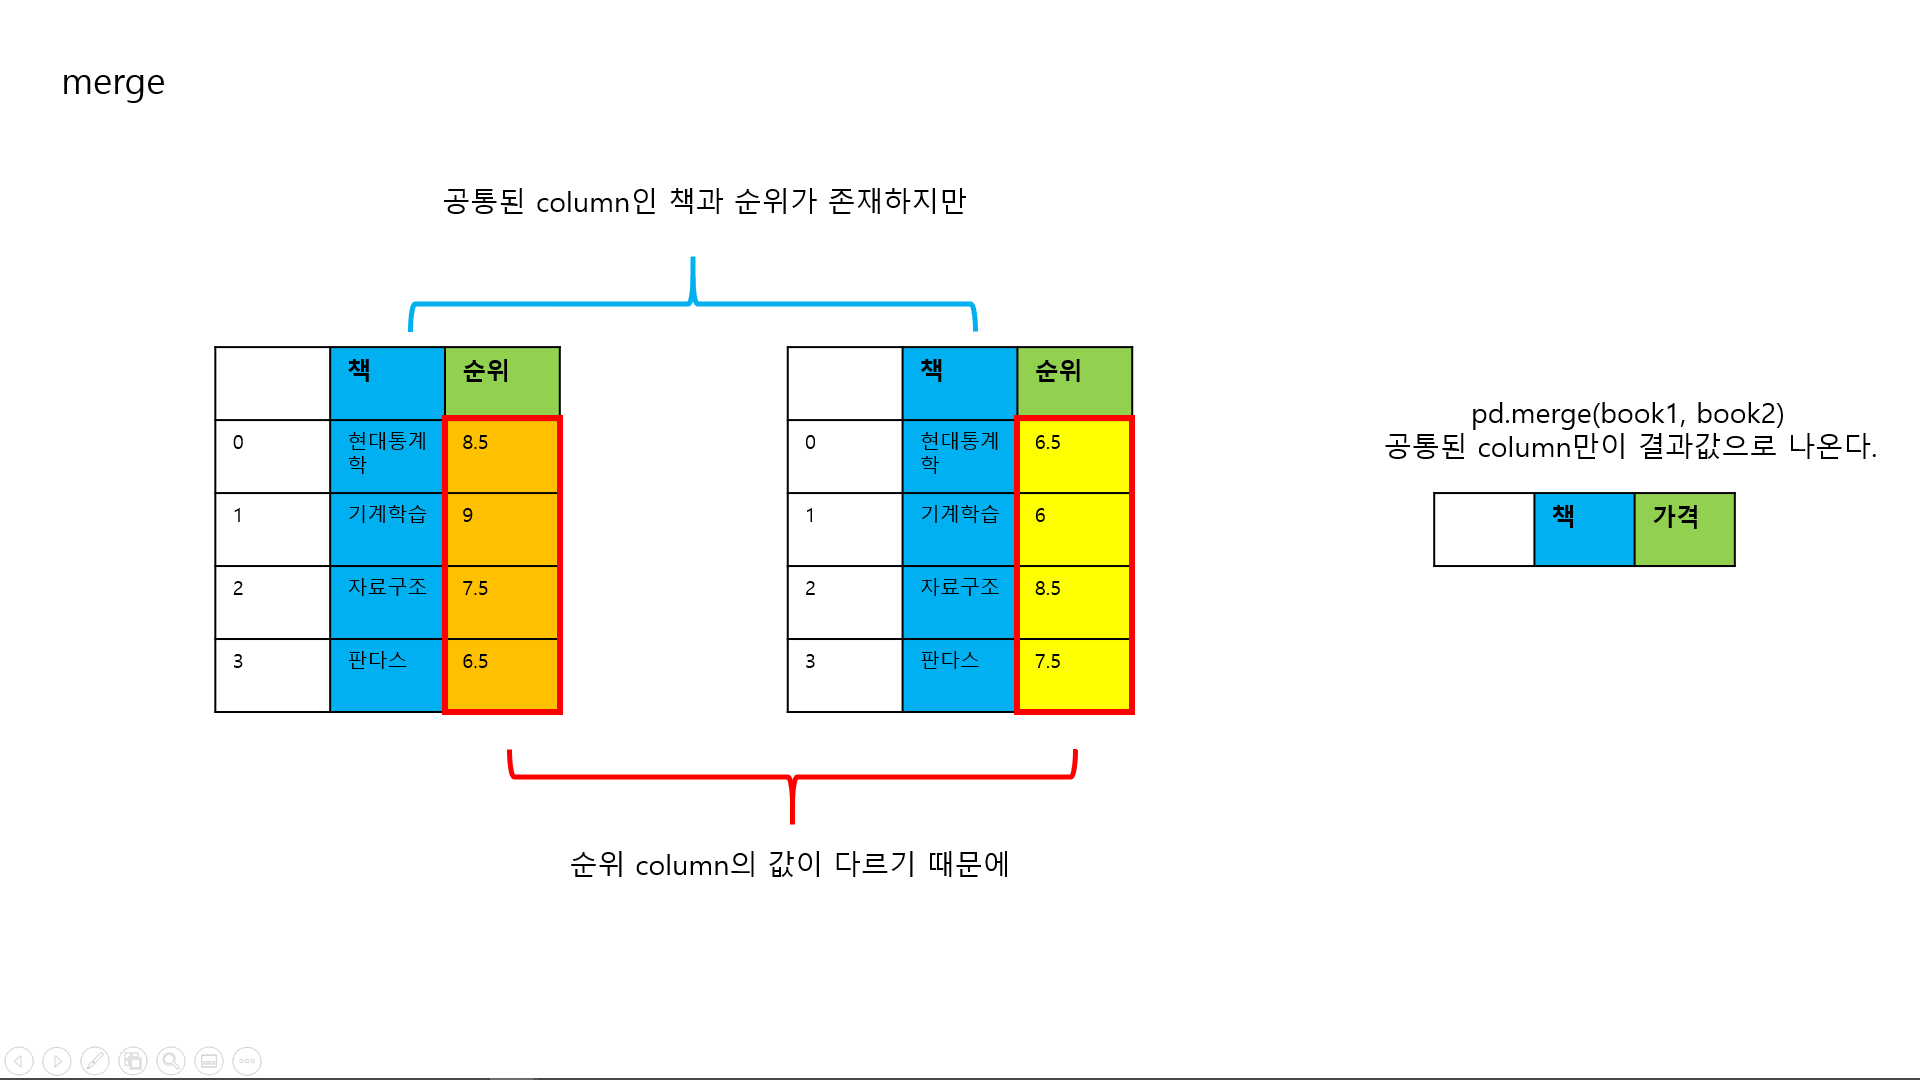

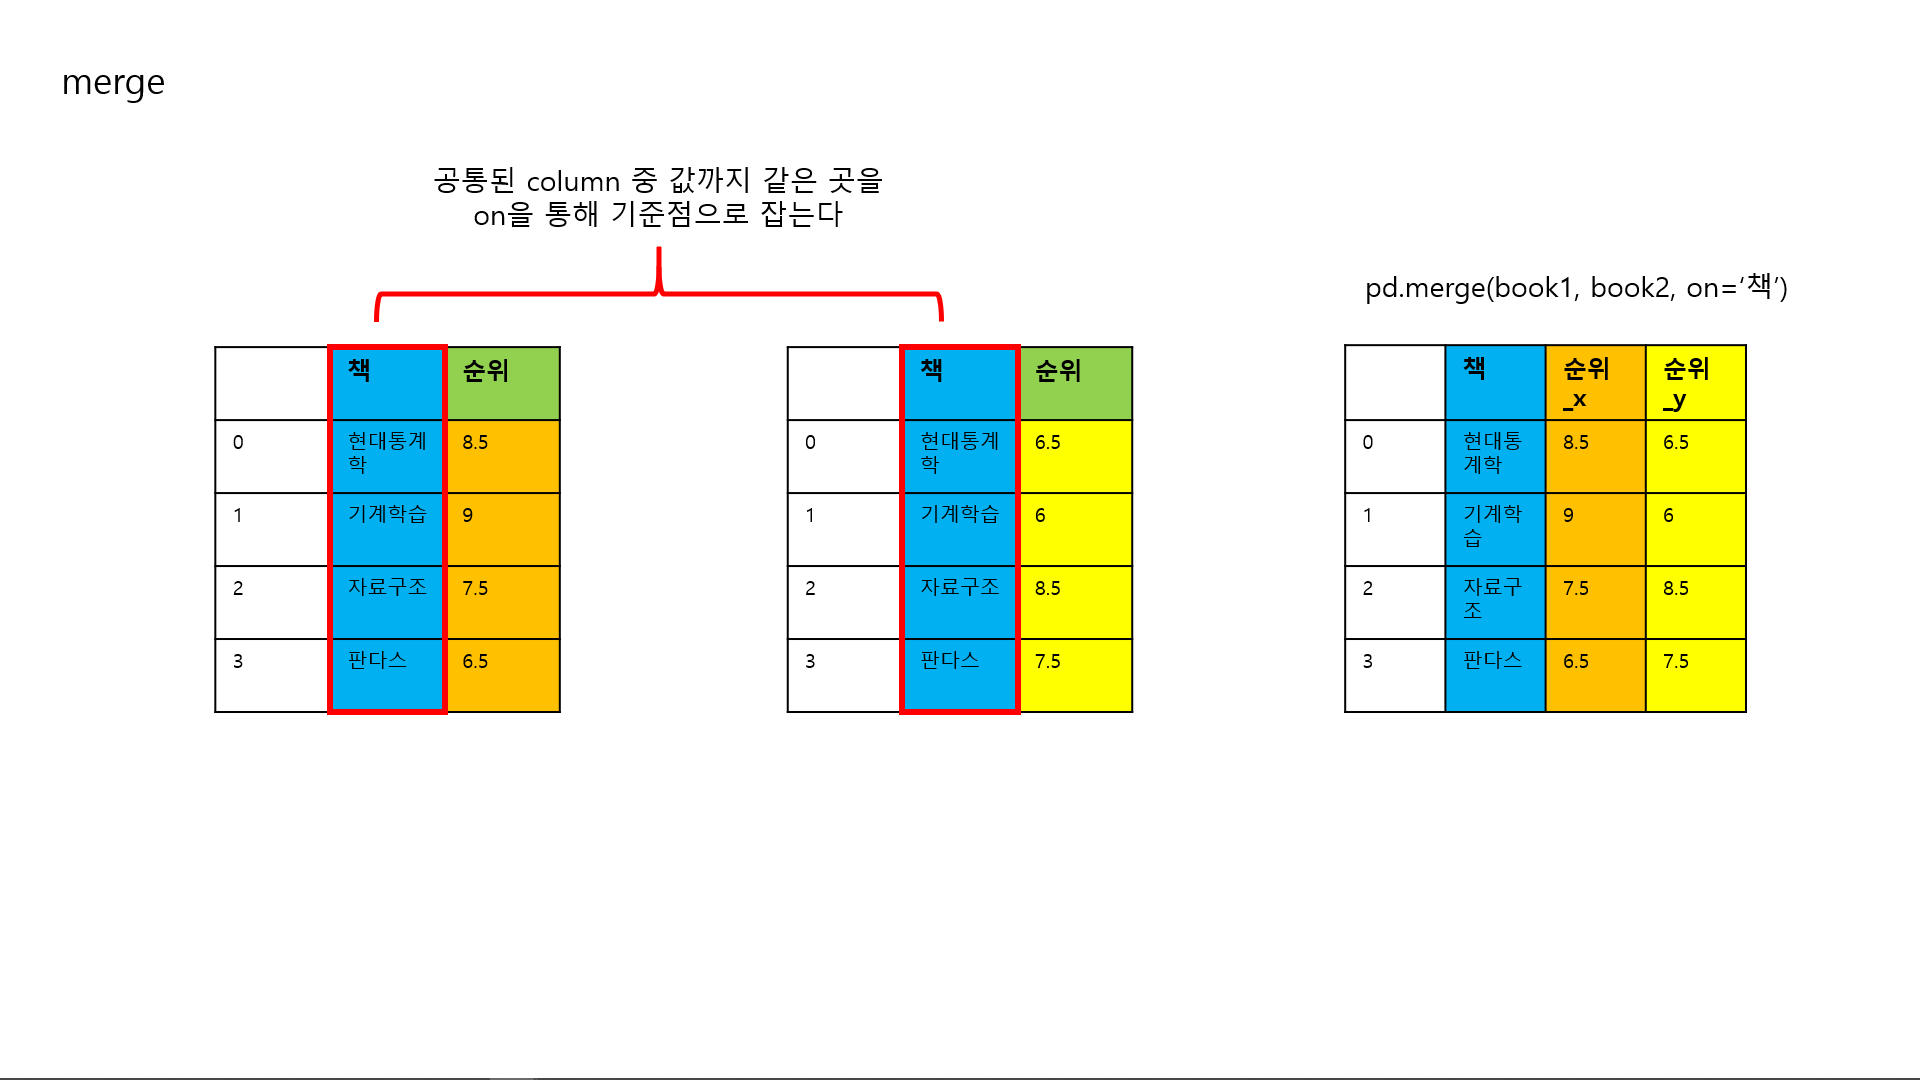

In [240]:
df9 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                    '순위':[3,2,4,1]})
df9

이름  순위
0  홍길동   3
1  이순신   2
2  임꺽정   4
3  김유신   1

In [241]:
df10 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                     '순위':[4, 1, 3, 2]})
df10

이름  순위
0  홍길동   4
1  이순신   1
2  임꺽정   3
3  김유신   2

In [242]:
pd.merge(df9, df10, on='이름')

이름  순위_x  순위_y
0  홍길동     3     4
1  이순신     2     1
2  임꺽정     4     3
3  김유신     1     2

In [243]:
pd.merge(df9, df10, on='이름', suffixes=['_인기','_성적'])

이름  순위_인기  순위_성적
0  홍길동      3      4
1  이순신      2      1
2  임꺽정      4      3
3  김유신      1      2

In [244]:
book_3 = pd.DataFrame({'책':['현대통계학','기계학습','자료구조','판다스'],
                       '순위':[6.5, 6, 8.5, 7.5]})
book_3

책   순위
0  현대통계학  6.5
1   기계학습  6.0
2   자료구조  8.5
3    판다스  7.5

In [245]:
book_4 = pd.DataFrame({'책':['현대통계학','기계학습','자료구조','판다스'],
                       '순위':[8.5, 9, 7.5, 6.5]})
book_4

책   순위
0  현대통계학  8.5
1   기계학습  9.0
2   자료구조  7.5
3    판다스  6.5

In [246]:
pd.merge(book_3, book_4, on='책')

책  순위_x  순위_y
0  현대통계학   6.5   8.5
1   기계학습   6.0   9.0
2   자료구조   8.5   7.5
3    판다스   7.5   6.5

In [247]:
pd.merge(book_3, book_4, on='책', suffixes=['_독자', '_전문가'])

책  순위_독자  순위_전문가
0  현대통계학    6.5     8.5
1   기계학습    6.0     9.0
2   자료구조    8.5     7.5
3    판다스    7.5     6.5

## 데이터 재구조화

### stack( ), unstack( )
- stack: 위에서 아래로 길게, 높게 쌓는 것
- unstack: 왼쪽에서 오른쪽으로 넓게 쌓는 것

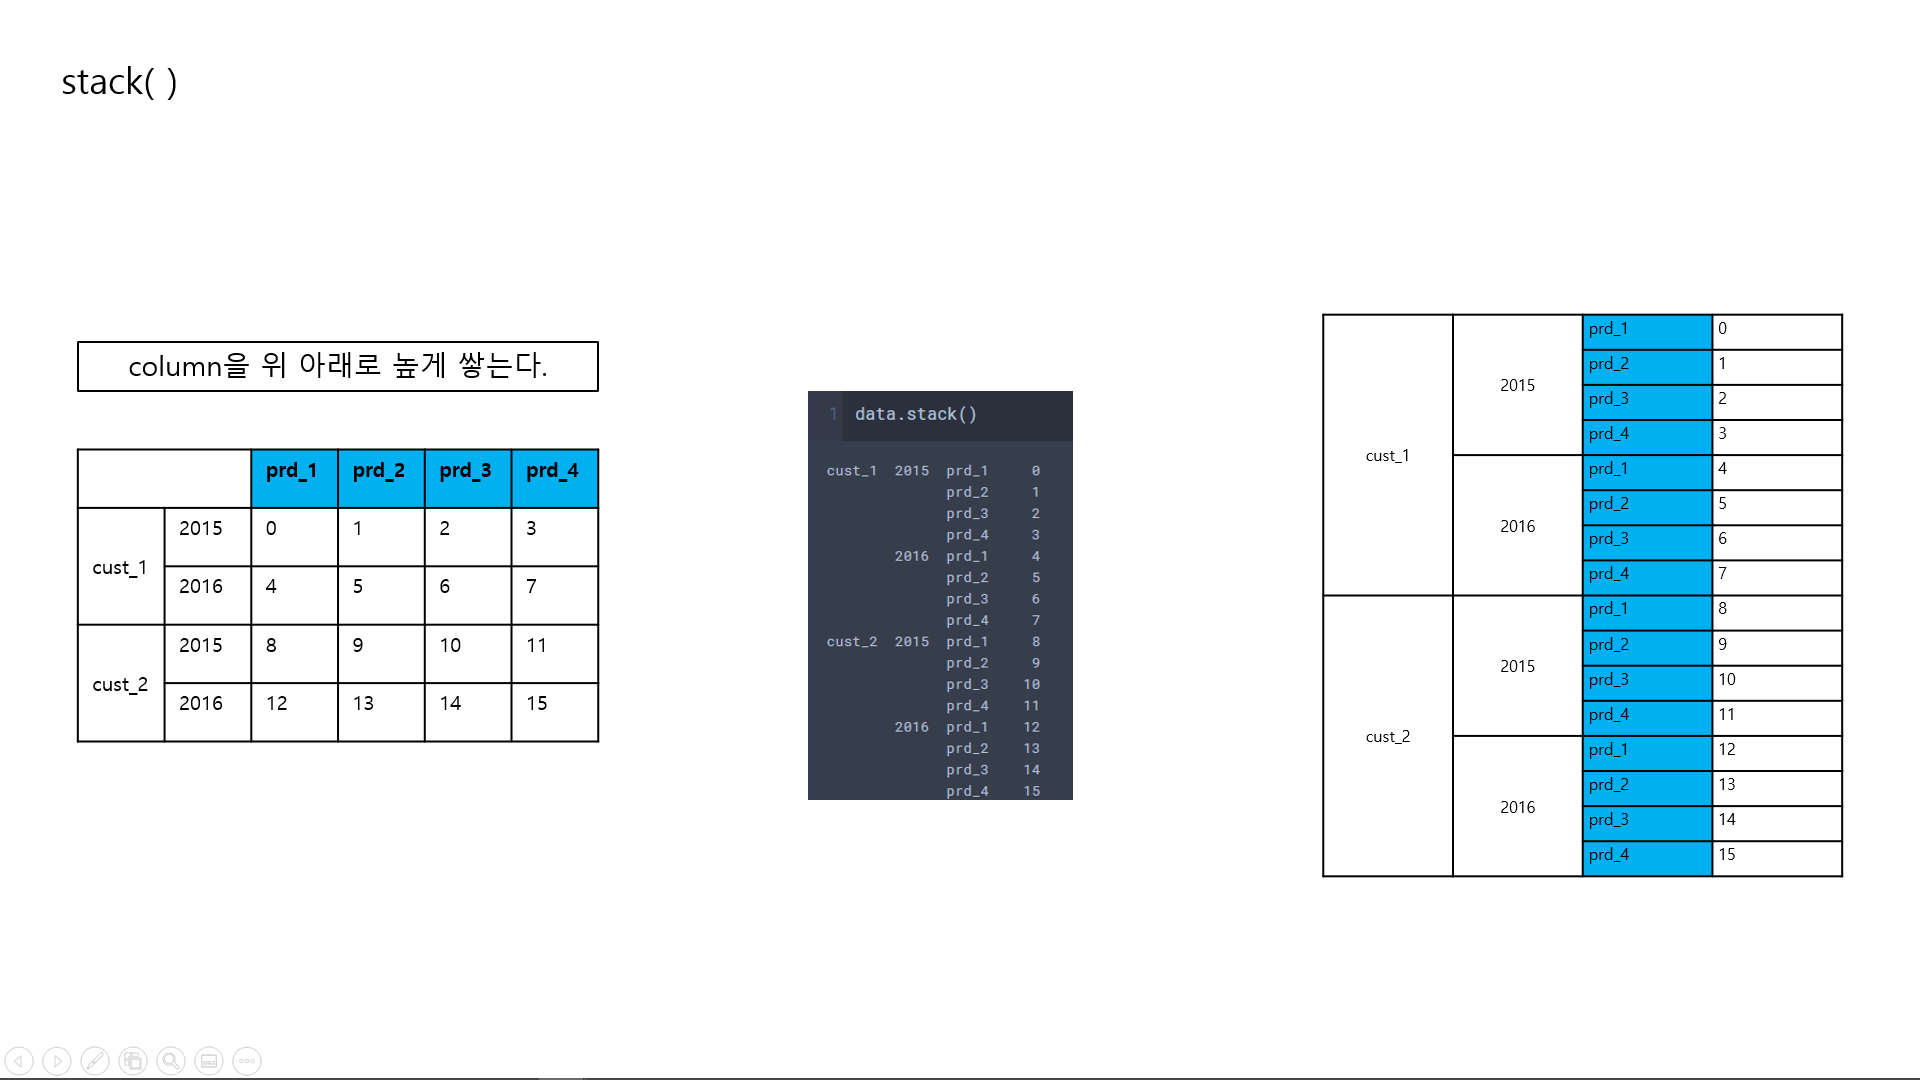

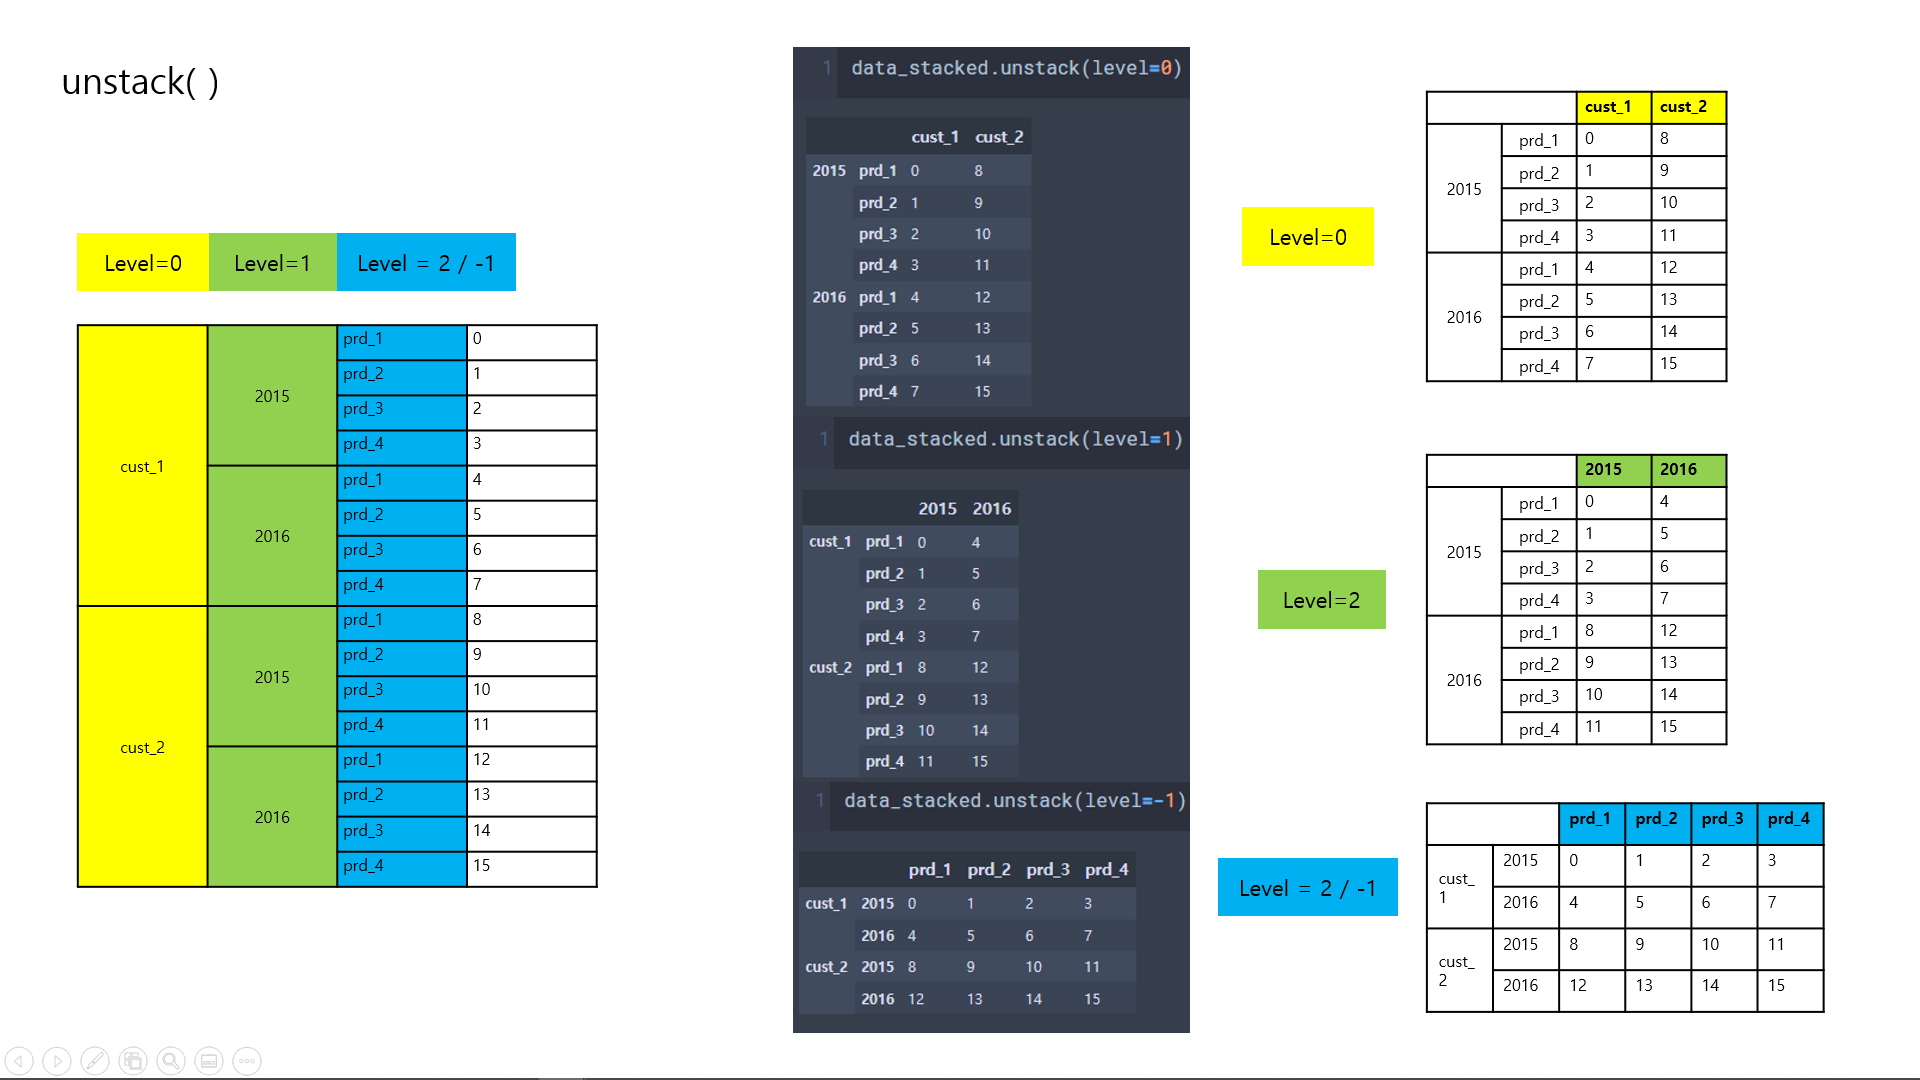

stack( ) => 자료형이 Series로 반환된다.

In [248]:
mul_index = pd.MultiIndex.from_tuples([('cust_1','2015'),('cust_1','2016'),
                                       ('cust_2','2015'),('cust_2','2016')])
data = pd.DataFrame(data=np.arange(16).reshape(4, 4), 
                    index=mul_index,
                    columns=['prd_1','prd_2','prd_3','prd_4'], 
                    dtype='int')
data

prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15

In [251]:
data_stacked=data.stack()
data_stacked.index

MultiIndex([('cust_1', '2015', 'prd_1'),
            ('cust_1', '2015', 'prd_2'),
            ('cust_1', '2015', 'prd_3'),
            ('cust_1', '2015', 'prd_4'),
            ('cust_1', '2016', 'prd_1'),
            ('cust_1', '2016', 'prd_2'),
            ('cust_1', '2016', 'prd_3'),
            ('cust_1', '2016', 'prd_4'),
            ('cust_2', '2015', 'prd_1'),
            ('cust_2', '2015', 'prd_2'),
            ('cust_2', '2015', 'prd_3'),
            ('cust_2', '2015', 'prd_4'),
            ('cust_2', '2016', 'prd_1'),
            ('cust_2', '2016', 'prd_2'),
            ('cust_2', '2016', 'prd_3'),
            ('cust_2', '2016', 'prd_4')],
           )

In [252]:
data_stacked.index

MultiIndex([('cust_1', '2015', 'prd_1'),
            ('cust_1', '2015', 'prd_2'),
            ('cust_1', '2015', 'prd_3'),
            ('cust_1', '2015', 'prd_4'),
            ('cust_1', '2016', 'prd_1'),
            ('cust_1', '2016', 'prd_2'),
            ('cust_1', '2016', 'prd_3'),
            ('cust_1', '2016', 'prd_4'),
            ('cust_2', '2015', 'prd_1'),
            ('cust_2', '2015', 'prd_2'),
            ('cust_2', '2015', 'prd_3'),
            ('cust_2', '2015', 'prd_4'),
            ('cust_2', '2016', 'prd_1'),
            ('cust_2', '2016', 'prd_2'),
            ('cust_2', '2016', 'prd_3'),
            ('cust_2', '2016', 'prd_4')],
           )

In [253]:
data_stacked['cust_2']['2015'][['prd_1','prd_2']]

prd_1    8
prd_2    9
dtype: int32

In [254]:
data_stacked.unstack()

prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15

In [255]:
data_stacked.unstack(level=-1)

prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15

In [256]:
data_stacked.unstack(level=0)

cust_1  cust_2
2015 prd_1       0       8
     prd_2       1       9
     prd_3       2      10
     prd_4       3      11
2016 prd_1       4      12
     prd_2       5      13
     prd_3       6      14
     prd_4       7      15

In [257]:
data_stacked.unstack(level=1)

2015  2016
cust_1 prd_1     0     4
       prd_2     1     5
       prd_3     2     6
       prd_4     3     7
cust_2 prd_1     8    12
       prd_2     9    13
       prd_3    10    14
       prd_4    11    15

In [258]:
data_stacked_unstack=data_stacked.unstack(level=-1)
data_stacked_unstack

prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15

In [259]:
data_stacked_unstack_df = data_stacked_unstack.reset_index()
data_stacked_unstack_df

level_0 level_1  prd_1  prd_2  prd_3  prd_4
0  cust_1    2015      0      1      2      3
1  cust_1    2016      4      5      6      7
2  cust_2    2015      8      9     10     11
3  cust_2    2016     12     13     14     15

In [260]:
mul_index = pd.MultiIndex.from_product([['A','B','C','D'], [2014,2015, 2016, 2017], [16, 17, 18, 19], [20, 21, 22, 23]])
mul_index
mm = pd.DataFrame({'1':range(256), 
                   '2':range(256)},
                  index= mul_index)
mm

1    2
A 2014 16 20    0    0
          21    1    1
          22    2    2
          23    3    3
       17 20    4    4
...           ...  ...
D 2017 18 23  251  251
       19 20  252  252
          21  253  253
          22  254  254
          23  255  255

[256 rows x 2 columns]

In [261]:
mm.unstack(level=-1)

1                   2               
            20   21   22   23   20   21   22   23
A 2014 16    0    1    2    3    0    1    2    3
       17    4    5    6    7    4    5    6    7
       18    8    9   10   11    8    9   10   11
       19   12   13   14   15   12   13   14   15
  2015 16   16   17   18   19   16   17   18   19
...        ...  ...  ...  ...  ...  ...  ...  ...
D 2016 19  236  237  238  239  236  237  238  239
  2017 16  240  241  242  243  240  241  242  243
       17  244  245  246  247  244  245  246  247
       18  248  249  250  251  248  249  250  251
       19  252  253  254  255  252  253  254  255

[64 rows x 8 columns]

In [262]:
mm.unstack(level=2)

1                   2               
            16   17   18   19   16   17   18   19
A 2014 20    0    4    8   12    0    4    8   12
       21    1    5    9   13    1    5    9   13
       22    2    6   10   14    2    6   10   14
       23    3    7   11   15    3    7   11   15
  2015 20   16   20   24   28   16   20   24   28
...        ...  ...  ...  ...  ...  ...  ...  ...
D 2016 23  227  231  235  239  227  231  235  239
  2017 20  240  244  248  252  240  244  248  252
       21  241  245  249  253  241  245  249  253
       22  242  246  250  254  242  246  250  254
       23  243  247  251  255  243  247  251  255

[64 rows x 8 columns]

In [263]:
mm.unstack(level=3)

1                   2               
            20   21   22   23   20   21   22   23
A 2014 16    0    1    2    3    0    1    2    3
       17    4    5    6    7    4    5    6    7
       18    8    9   10   11    8    9   10   11
       19   12   13   14   15   12   13   14   15
  2015 16   16   17   18   19   16   17   18   19
...        ...  ...  ...  ...  ...  ...  ...  ...
D 2016 19  236  237  238  239  236  237  238  239
  2017 16  240  241  242  243  240  241  242  243
       17  244  245  246  247  244  245  246  247
       18  248  249  250  251  248  249  250  251
       19  252  253  254  255  252  253  254  255

[64 rows x 8 columns]

## 데이터 집계와 그룹 연산

### 집계 연산(Aggregation)

|집계|설명|
|:--|:--|
|```count```|전체 갯수|
|```head, tail```|앞의 항목 일부 반환, 뒤의 항목 일부 반환|
|```describe```|Series, DataFrame의 각 컬럼에 대한 요약 통계|
|```min, max```|최소값, 최대값|
|```cummin, cummax```|누적 최소값, 누적 최대값|
|```argmin, argmax```|최소값과 최대값의 색인 위치|
|```idxmin, idxmax```|최소값과 최대값의 색인값|
|```mean, median```|평균값, 중앙값|
|```std, var```|표준편차, 분산|
|```skew```|왜도 값 계산|
|```kurt```|첨도 값 계산|
|```mad```|절대 평균 편차|
|```sum, cusum```|전체 항목 합, 누적합|
|```prod, cumprod```|전체 항목 곱, 누적곱|
|```quatile```|0부터 1까지의 분위수 계산(괄호안에 0.25, 0.5, 0.75 등의 숫자를 입력해야 함(기본값은 0.5))|
|```diff```|1차 산술차 계산|
|```pct_change```|퍼센트 변화율 계산|
|```corr, cov```|상관관계, 공분산 계산|

In [264]:
df = pd.DataFrame([[1, 1.2, np.nan],
                   [2.4, 5.5, 4.2],
                   [np.nan, np.nan, np.nan],
                   [0.44, -3.1, 4.1]], 
                 index=[1, 2, 3, 4],
                 columns = ['A','B','C'])
df

A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1  4.1

In [265]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1  4.1
2 2


In [266]:
dft = pd.DataFrame({'a':[1, 2, 3, 4],
                    'b':[8, 5, 6, 7],
                    'c':[10, 11, 9, 12]})
dft

a  b   c
0  1  8  10
1  2  5  11
2  3  6   9
3  4  7  12

In [267]:
print(np.argmin(dft),np.argmax(dft))
# 최소값과 최대값의 index를 반환한다.

0 11


In [268]:
print(dft.idxmin())
print(dft.idxmax())
# 최소값이 있는 index(여기서 index는 색인 바로 columns이 아닌 것을 뜻한다)가 무엇인지를 알려준다
# 'a' column에 있는 '0' index에 가장 작은 값이 존재한다.
# 'a' column에 있는 '3' index에 가장 큰 값이 존재한다.

a    0
b    1
c    2
dtype: int64
a    3
b    0
c    3
dtype: int64


In [269]:
dft.take([0,1,2])

a  b   c
0  1  8  10
1  2  5  11
2  3  6   9

In [270]:
df

A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1  4.1

In [271]:
print(df.skew())
print()
print(df.kurt())

A    1.15207
B    0.00000
C        NaN
dtype: float64

A   NaN
B   NaN
C   NaN
dtype: float64


In [272]:
dft

a  b   c
0  1  8  10
1  2  5  11
2  3  6   9
3  4  7  12

왜도와 첨도란?<br>

왜도 값이 양의 값을 가지면 Data의 중심(평균)이 정규 분포보다 왼쪽으로 치우쳐져 있고<br>
(즉, 분포의 제일 높은 지점이 왼쪽에 있고)<br>
꼬리는 오른쪽으로 길어지게 표현된다. -> Right-skewed  
  
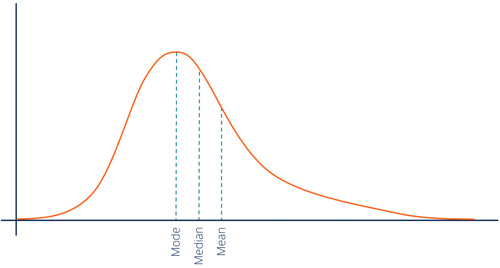 <br>
<br>
왜도 값이 음의 값을 가지면 Data의 중심(평균)이 정규 분포보다 오른쪽으로 치우쳐져 있고<br>
(즉, 분포의 제일 높은 지점이 오른쪽에 있고)<br>
꼬리는 왼쪽으로 늘어지게 표현된다. -> left-skewed<br>
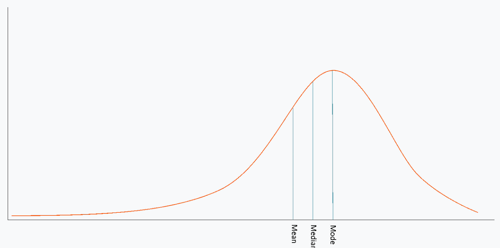 <br>
<br>
<br>
왜도 값이 -2 ~ 2 정도의 치우침은 왜도가 크지 않다고 판단한다. <br>
절대값 3미만이면 기준에 부합

첨도<br>
<br>

측정치의 빈도수를 나타낼 때 나타나는 분포의 뾰족한 형태를 "첨도"라고 함<br>
샘플의 점수가 평균을 중심으로 가까이 몰려 있을 수록 분포의 정점은 더욱 뾰족한 모양, 즉 첨도가 커진다.<br>
분포의 분산도가 크면 집단이 이질적이고 분포의 높이가 낮아지며, 분산도가 작으면 집단이 동질적이고 분포의 높이가 높아짐<br>
정규분포의 첨도는 0이며, 첨도가 0보다 크면 정규분포보다 더 뾰족한 모양을 갖는 고첨이 되고, <br>
첨도가 0보다 작으면 분포의 높이가 정규분포보다 낮아지는 저첨이 된다.<br>

<br>

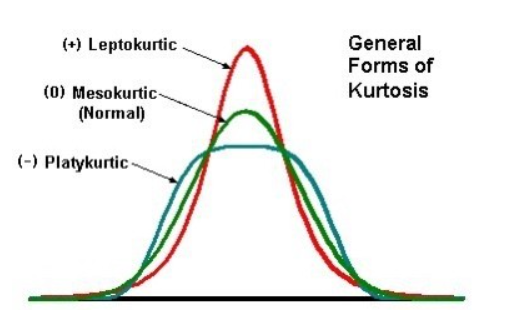

<br>
첨도가 절대값 7미만이면 기준에 부합하는 것으로 간주

In [273]:
print(dft.skew())
print()
print(dft.kurt())

a    0.0
b    0.0
c    0.0
dtype: float64

a   -1.2
b   -1.2
c   -1.2
dtype: float64


In [274]:
dff = pd.DataFrame({'A':[1, 1, 1,  120, 3, 92, 1, 120, 10000000],
                    'B':[50, 60, 70, 80, 90, 100, 110, 120, 130],
                    'C':np.random.randint(1, 100, (9))})
dff

A    B   C
0         1   50   2
1         1   60  34
2         1   70  80
3       120   80  97
4         3   90  70
5        92  100  54
6         1  110  99
7       120  120  85
8  10000000  130  90

In [275]:
print(dff.skew()) 
# 'A'의 왜도의 절대값이 3이므로 왜도가 기준치보다 높다.
# 왼쪽으로 꼬리가 긴 그래프
# 'A'의 평균이 중앙값보다 크다.
print()
print(dff.A.mean() > dff.A.median())
print()
print(dff.kurt())

A    3.000000
B    0.000000
C   -1.199103
dtype: float64

True

A    9.000000
B   -1.200000
C    0.783853
dtype: float64


In [276]:
print(dff.mad())

A    1.975300e+06
B    2.222222e+01
C    2.525926e+01
dtype: float64


In [277]:
dff.cumsum()

A    B    C
0         1   50    2
1         2  110   36
2         3  180  116
3       123  260  213
4       126  350  283
5       218  450  337
6       219  560  436
7       339  680  521
8  10000339  810  611

In [278]:
dff.A.median()

3.0

In [279]:
dff.quantile()

A     3.0
B    90.0
C    80.0
Name: 0.5, dtype: float64

In [280]:
dff.corr()

A         B         C
A  1.000000  0.547729  0.255423
B  0.547729  1.000000  0.703004
C  0.255423  0.703004  1.000000

In [281]:
dff.corrwith(dff.B)

A    0.547729
B    1.000000
C    0.703004
dtype: float64

In [282]:
dff.cov()

A            B             C
A  1.111102e+13  50000406.25  2.763942e+07
B  5.000041e+07       750.00  6.250000e+02
C  2.763942e+07       625.00  1.053861e+03

### GroupBy 연산

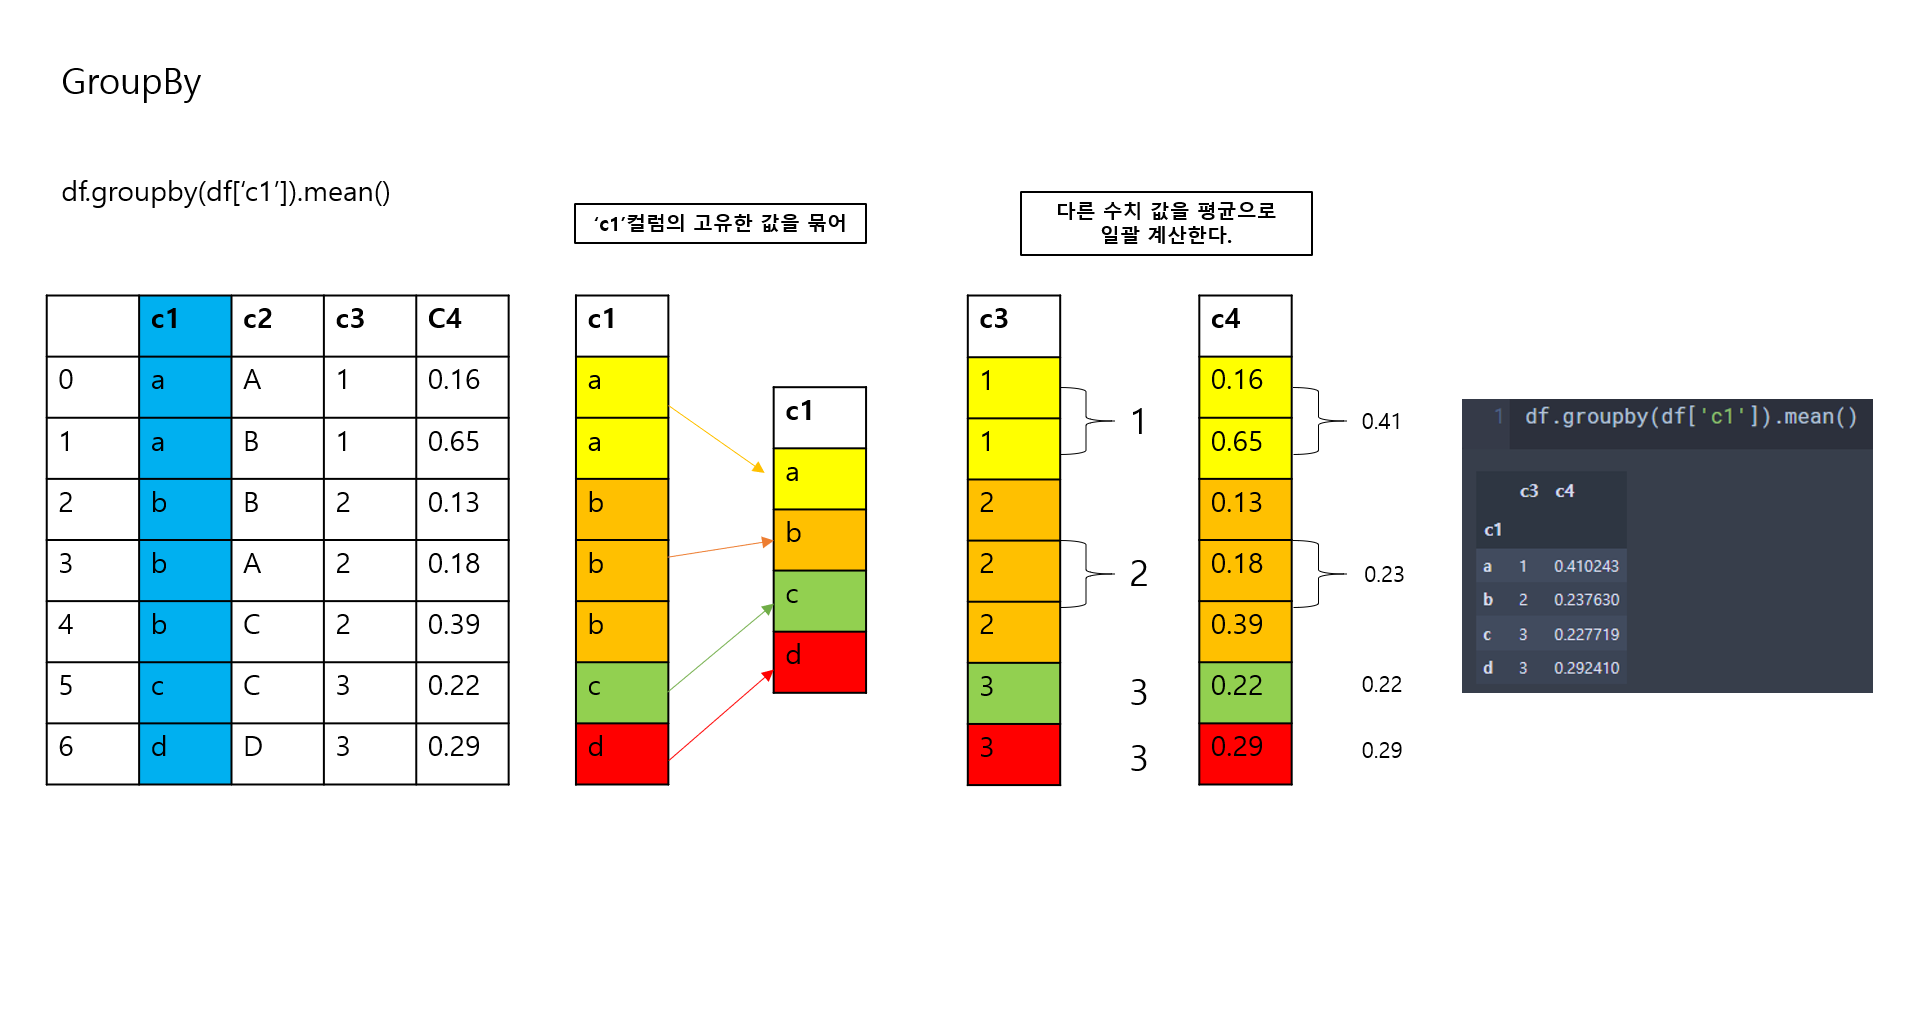

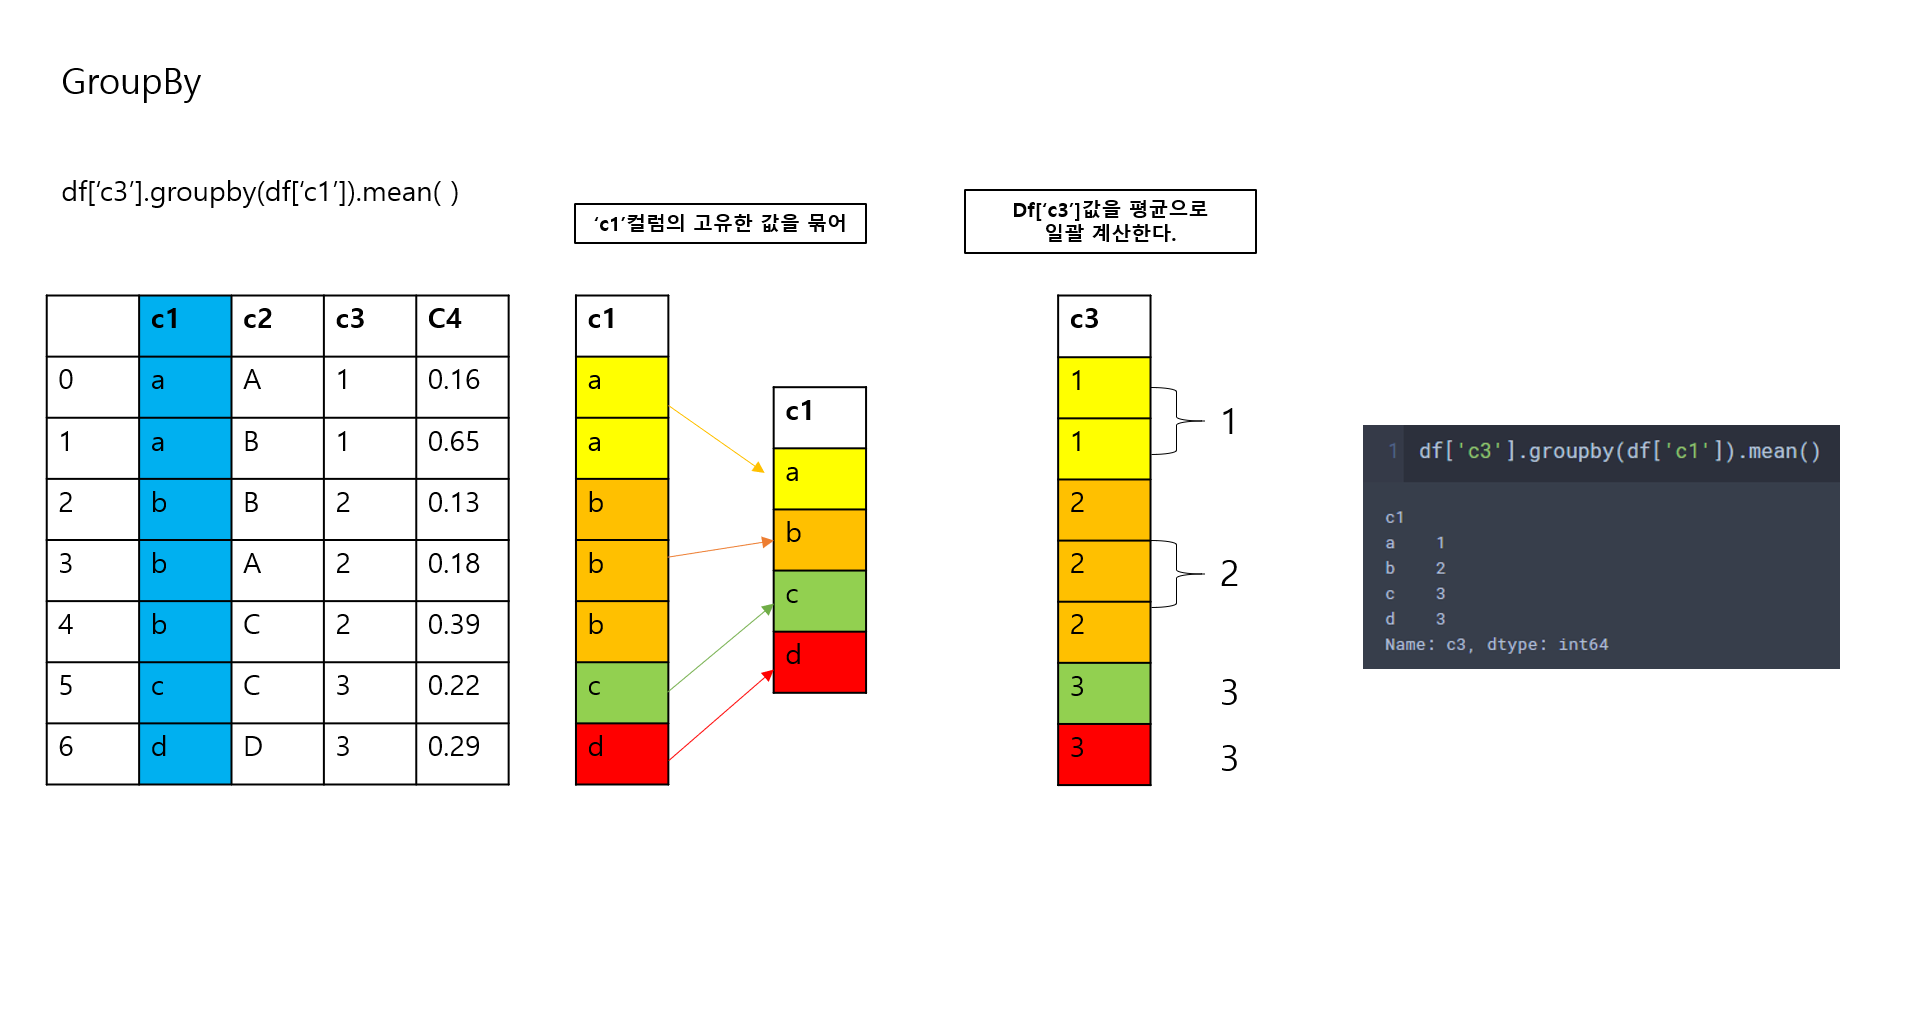

In [283]:
df = pd.DataFrame({'c1': ['a','a','b','b','b','c','d',],
                   'c2': ['A','B','B','A','C','C','D'],
                   'c3': [1, 1, 2, 2, 2, 3, 3],
                   'c4': np.random.random(7)})
df

c1 c2  c3        c4
0  a  A   1  0.865401
1  a  B   1  0.268197
2  b  B   2  0.956710
3  b  A   2  0.446068
4  b  C   2  0.103083
5  c  C   3  0.941474
6  d  D   3  0.919208

In [284]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [285]:
df['c3'].groupby(df['c1']).mean()

c1
a    1
b    2
c    3
d    3
Name: c3, dtype: int64

In [286]:
df.groupby(df['c1']).mean()

c3        c4
c1              
a    1  0.566799
b    2  0.501954
c    3  0.941474
d    3  0.919208

In [287]:
df['c4'].groupby([df['c1'],df['c2']]).mean()

c1  c2
a   A     0.865401
    B     0.268197
b   A     0.446068
    B     0.956710
    C     0.103083
c   C     0.941474
d   D     0.919208
Name: c4, dtype: float64

In [288]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2         A         B         C         D
c1                                        
a   0.865401  0.268197       NaN       NaN
b   0.446068  0.956710  0.103083       NaN
c        NaN       NaN  0.941474       NaN
d        NaN       NaN       NaN  0.919208

In [289]:
df['c4'].groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     0.865401
    B     0.268197
b   A     0.446068
    B     0.956710
    C     0.103083
c   C     0.941474
d   D     0.919208
Name: c4, dtype: float64

In [290]:
df['c4'].groupby([df['c1'],df['c2']]).mean().to_frame()

c4
c1 c2          
a  A   0.865401
   B   0.268197
b  A   0.446068
   B   0.956710
   C   0.103083
c  C   0.941474
d  D   0.919208

In [291]:
df.groupby('c1').mean()

c3        c4
c1              
a    1  0.566799
b    2  0.501954
c    3  0.941474
d    3  0.919208

In [292]:
df.groupby(['c1','c2']).mean()

c3        c4
c1 c2              
a  A    1  0.865401
   B    1  0.268197
b  A    2  0.446068
   B    2  0.956710
   C    2  0.103083
c  C    3  0.941474
d  D    3  0.919208

In [293]:
df.groupby(['c1','c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
    C     1
c   C     1
d   D     1
dtype: int64

In [294]:
for c1, group in df.groupby('c1'):
    print(c1)
    print(group)

a
  c1 c2  c3        c4
0  a  A   1  0.865401
1  a  B   1  0.268197
b
  c1 c2  c3        c4
2  b  B   2  0.956710
3  b  A   2  0.446068
4  b  C   2  0.103083
c
  c1 c2  c3        c4
5  c  C   3  0.941474
d
  c1 c2  c3        c4
6  d  D   3  0.919208


In [295]:
df.groupby(['c1','c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.865401
   B   0.268197
b  A   0.446068
   B   0.956710
   C   0.103083
c  C   0.941474
d  D   0.919208

In [296]:
df.groupby(['c1','c2'])['c4'].agg(['min','max','mean'])

min       max      mean
c1 c2                              
a  A   0.865401  0.865401  0.865401
   B   0.268197  0.268197  0.268197
b  A   0.446068  0.446068  0.446068
   B   0.956710  0.956710  0.956710
   C   0.103083  0.103083  0.103083
c  C   0.941474  0.941474  0.941474
d  D   0.919208  0.919208  0.919208

In [297]:
df.groupby(['c1','c2'], as_index=False).mean()

c1 c2  c3        c4
0  a  A   1  0.865401
1  a  B   1  0.268197
2  b  A   2  0.446068
3  b  B   2  0.956710
4  b  C   2  0.103083
5  c  C   3  0.941474
6  d  D   3  0.919208

In [298]:
def top(df, n=3, column='c1'):
    
    return df.sort_values(by=column)[-n:]

top(df, n=5)

c1 c2  c3        c4
2  b  B   2  0.956710
3  b  A   2  0.446068
4  b  C   2  0.103083
5  c  C   3  0.941474
6  d  D   3  0.919208

In [299]:
dff = pd.DataFrame({'국가': ['한국','미국','필리핀', '홍콩', '호주', '영국'],
                    '축구 점수': [5, 3, 2, 1, 4, 6],
                    '농구 점수': [1, 3, 2, 5, 6, 4],
                    '야구 점수': [3, 2, 5, 1, 4, 6]})
dff

국가  축구 점수  농구 점수  야구 점수
0   한국      5      1      3
1   미국      3      3      2
2  필리핀      2      2      5
3   홍콩      1      5      1
4   호주      4      6      4
5   영국      6      4      6

In [300]:
dff['평균 순위'] = round((dff['축구 점수'] + dff['농구 점수'] + dff['야구 점수'])/3, 1)
dff

국가  축구 점수  농구 점수  야구 점수  평균 순위
0   한국      5      1      3    3.0
1   미국      3      3      2    2.7
2  필리핀      2      2      5    3.0
3   홍콩      1      5      1    2.3
4   호주      4      6      4    4.7
5   영국      6      4      6    5.3

In [301]:
def Top_n(table, column, n=3):
    
    return table.sort_values(by=column, ascending=False)[-3:]

Top_n(dff, '축구 점수')

국가  축구 점수  농구 점수  야구 점수  평균 순위
1   미국      3      3      2    2.7
2  필리핀      2      2      5    3.0
3   홍콩      1      5      1    2.3

In [302]:
Top_n(dff, '평균 순위')

국가  축구 점수  농구 점수  야구 점수  평균 순위
2  필리핀      2      2      5    3.0
1   미국      3      3      2    2.7
3   홍콩      1      5      1    2.3

### 피벗 테이블 (Pivot Table)
|함수|설명|
|:-|:-|
|```values```|집계하려는 컬럼 이름 혹은 이름의 리스트. 기본적으로 모든 숫자 컬럼 집계|
|```index```|피벗테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키|
|```columns```|피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키|
|```aggfunc```|집계 함수나 함수 리스트. 기본값으로 ```mean```이 사용|
|```fil_value```|결과 테이블에서 누락된 값 대체를 위한 값|
|```dropna```|True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음|
|```margins```|부분 합이나 총계를 담기 위한 로우/컬럼 추가 여부. 기본값은 False|

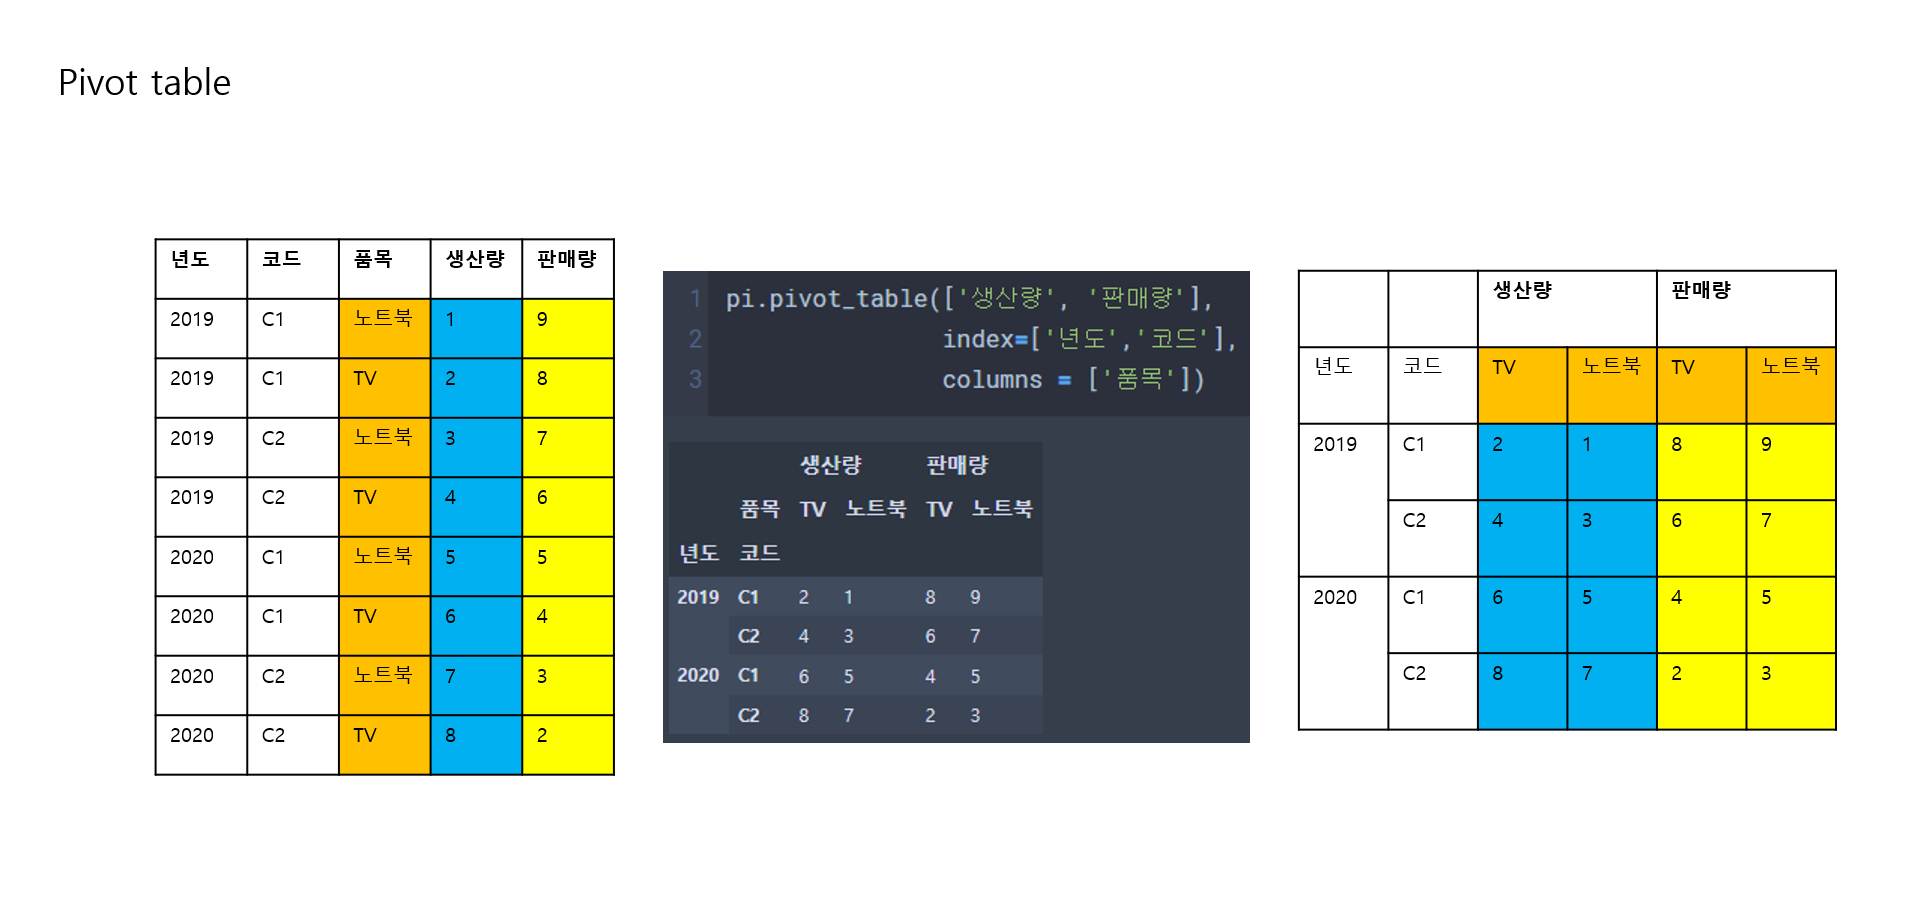

In [303]:
df

c1 c2  c3        c4
0  a  A   1  0.865401
1  a  B   1  0.268197
2  b  B   2  0.956710
3  b  A   2  0.446068
4  b  C   2  0.103083
5  c  C   3  0.941474
6  d  D   3  0.919208

In [304]:
dft = pd.DataFrame({'국가': ['한국','미국','필리핀', '홍콩', '호주', '영국'],
                    '축구 점수': [1, 3, 2, 1, 4, 6],
                    '농구 점수': [1, 3, 2, 5, 6, 4],
                    '야구 점수': [1, 2, 5, 1, 4, 6]})
dft

국가  축구 점수  농구 점수  야구 점수
0   한국      1      1      1
1   미국      3      3      2
2  필리핀      2      2      5
3   홍콩      1      5      1
4   호주      4      6      4
5   영국      6      4      6

In [305]:
dft.pivot_table(['축구 점수', '농구 점수'], index=['국가'],
               columns=['야구 점수'])

농구 점수                     축구 점수                    
야구 점수     1    2    4    5    6     1    2    4    5    6
국가                                                       
미국      NaN  3.0  NaN  NaN  NaN   NaN  3.0  NaN  NaN  NaN
영국      NaN  NaN  NaN  NaN  4.0   NaN  NaN  NaN  NaN  6.0
필리핀     NaN  NaN  NaN  2.0  NaN   NaN  NaN  NaN  2.0  NaN
한국      1.0  NaN  NaN  NaN  NaN   1.0  NaN  NaN  NaN  NaN
호주      NaN  NaN  6.0  NaN  NaN   NaN  NaN  4.0  NaN  NaN
홍콩      5.0  NaN  NaN  NaN  NaN   1.0  NaN  NaN  NaN  NaN

In [306]:
dft.pivot_table(['축구 점수', '농구 점수'], 
                index=['국가'],
                columns=['야구 점수'], 
                margins= True)

농구 점수                          축구 점수                              
야구 점수     1    2    4    5    6  All     1    2    4    5    6       All
국가                                                                      
미국      NaN  3.0  NaN  NaN  NaN  3.0   NaN  3.0  NaN  NaN  NaN  3.000000
영국      NaN  NaN  NaN  NaN  4.0  4.0   NaN  NaN  NaN  NaN  6.0  6.000000
필리핀     NaN  NaN  NaN  2.0  NaN  2.0   NaN  NaN  NaN  2.0  NaN  2.000000
한국      1.0  NaN  NaN  NaN  NaN  1.0   1.0  NaN  NaN  NaN  NaN  1.000000
호주      NaN  NaN  6.0  NaN  NaN  6.0   NaN  NaN  4.0  NaN  NaN  4.000000
홍콩      5.0  NaN  NaN  NaN  NaN  5.0   1.0  NaN  NaN  NaN  NaN  1.000000
All     3.0  3.0  6.0  2.0  4.0  3.5   1.0  3.0  4.0  2.0  6.0  2.833333

In [307]:
import random

date = ['2018', '2019', '2020'] *10 + ['2020']
date = pd.to_datetime(date)
date = date.to_period(freq='A')
date = pd.Series(date)

col = ['c1','c2','c3'] * 10 + ['c3']
random.shuffle(col)
col = pd.Series(col)

product = ['냉장고', 'TV','컴퓨터', '그래픽카드', '모니터'] * 6 + ['노트북']
random.shuffle(product)
product = pd.Series(product)

production = np.random.randint(800, 2000, 31)
production = pd.Series(production)
sell = np.random.randint(400, 900, 31)
sell = pd.Series(sell)

In [308]:
for_pivot = pd.concat([date, col, product, production, sell], axis=1)
for_pivot.columns=['날짜','코드', '품목', '출고','판매']
for_pivot.head()

날짜  코드     품목    출고   판매
0  2018  c2     TV  1450  891
1  2019  c2    모니터  1418  419
2  2020  c1     TV  1671  400
3  2018  c2    냉장고  1642  869
4  2019  c1  그래픽카드  1743  448

In [309]:
for_pivot.pivot_table(['출고', '판매'],
                      index=['날짜','코드'],
                      columns=[ '품목'])

출고                                            판매                \
품목           TV   그래픽카드     냉장고    노트북     모니터     컴퓨터     TV  그래픽카드    냉장고   
날짜   코드                                                                       
2018 c1     NaN     NaN     NaN    NaN  1804.0  1874.0    NaN    NaN    NaN   
     c2  1450.0  1583.0  1642.0  997.0  1857.0     NaN  891.0  773.0  869.0   
     c3     NaN   852.0  1168.0    NaN     NaN  1110.0    NaN  805.0  680.0   
2019 c1   873.0  1743.0  1793.0    NaN     NaN     NaN  790.0  448.0  424.0   
     c2  1875.0     NaN     NaN    NaN  1418.0     NaN  757.0    NaN    NaN   
     c3  1903.0     NaN  1425.0    NaN  1484.0     NaN  519.0    NaN  671.0   
2020 c1  1671.0  1014.0     NaN    NaN     NaN  1728.5  400.0  671.0    NaN   
     c2     NaN     NaN  1133.0    NaN  1726.0  1877.0    NaN    NaN  603.0   
     c3     NaN  1288.0     NaN    NaN  1619.0  1170.0    NaN  444.0    NaN   

                              
품목         노트북    모니터    컴퓨터  
날짜   코드                       
2018 c1    NaN  818.0  527.0  
     c2  819.0  850.0    NaN  
     c3    NaN    NaN  607.0  
2019 c1    NaN    NaN    NaN  
     c2    NaN  419.0    NaN  
     c3    NaN  743.0    NaN  
2020 c1    NaN    NaN  619.5  
     c2    NaN  701.0  879.0  
     c3    NaN  899.0  587.0

In [310]:
for_pivot.pivot_table(['출고', '판매'],
                      index=['날짜','코드'],
                      columns=[ '품목'],
                      margins=True)

출고                                                                \
품목           TV   그래픽카드     냉장고    노트북          모니터          컴퓨터          All   
날짜   코드                                                                         
2018 c1     NaN     NaN     NaN    NaN  1804.000000  1874.000000  1839.000000   
     c2  1450.0  1583.0  1642.0  997.0  1857.000000          NaN  1505.800000   
     c3     NaN   852.0  1168.0    NaN          NaN  1110.000000  1043.333333   
2019 c1   873.0  1743.0  1793.0    NaN          NaN          NaN  1469.666667   
     c2  1875.0     NaN     NaN    NaN  1418.000000          NaN  1646.500000   
     c3  1903.0     NaN  1425.0    NaN  1484.000000          NaN  1628.000000   
2020 c1  1671.0  1014.0     NaN    NaN          NaN  1728.500000  1431.200000   
     c2     NaN     NaN  1133.0    NaN  1726.000000  1877.000000  1578.666667   
     c3     NaN  1288.0     NaN    NaN  1619.000000  1170.000000  1359.000000   
All      1612.5  1249.0  1431.0  997.0  1651.333333  1581.333333  1488.645161   

            판매                                                                
품목          TV       그래픽카드    냉장고    노트북         모니터         컴퓨터         All  
날짜   코드                                                                       
2018 c1    NaN         NaN    NaN    NaN  818.000000  527.000000  672.500000  
     c2  891.0  773.000000  869.0  819.0  850.000000         NaN  840.400000  
     c3    NaN  805.000000  680.0    NaN         NaN  607.000000  697.333333  
2019 c1  790.0  448.000000  424.0    NaN         NaN         NaN  554.000000  
     c2  757.0         NaN    NaN    NaN  419.000000         NaN  588.000000  
     c3  519.0         NaN  671.0    NaN  743.000000         NaN  624.600000  
2020 c1  400.0  671.000000    NaN    NaN         NaN  619.500000  596.200000  
     c2    NaN         NaN  603.0    NaN  701.000000  879.000000  727.666667  
     c3    NaN  444.000000    NaN    NaN  899.000000  587.000000  643.333333  
All      646.0  635.333333  653.0  819.0  738.333333  639.833333  667.548387

In [311]:
date = pd.to_datetime(['2018','2019','2020']).to_period(freq='A')
date = pd.Series(date)
code = pd.Series(['C1','C2','C3'])
product = pd.Series(['TV', '그래픽카드','노트북'])
production = pd.Series(np.random.randint(800, 2000, 3))
sell = pd.Series(np.random.randint(400, 900, 3))

for_pivot = pd.concat([date, code, product, production, sell], axis=1)
for_pivot.columns=['날짜','코드','품목','출고','판매']
for_pivot

날짜  코드     품목    출고   판매
0  2018  C1     TV  1325  768
1  2019  C2  그래픽카드  1510  443
2  2020  C3    노트북  1950  871

In [312]:
for_pivot.pivot_table(['출고','판매'],
                      index=['날짜','코드'],
                      columns=['품목'])

출고                     판매              
품목           TV   그래픽카드     노트북     TV  그래픽카드    노트북
날짜   코드                                             
2018 C1  1325.0     NaN     NaN  768.0    NaN    NaN
2019 C2     NaN  1510.0     NaN    NaN  443.0    NaN
2020 C3     NaN     NaN  1950.0    NaN    NaN  871.0

In [313]:
midx = pd.MultiIndex.from_product([['2018','2019','2020'],['C1','C2','C3'],['TV','그래픽카드', '노트북']])
midx

MultiIndex([('2018', 'C1',    'TV'),
            ('2018', 'C1', '그래픽카드'),
            ('2018', 'C1',   '노트북'),
            ('2018', 'C2',    'TV'),
            ('2018', 'C2', '그래픽카드'),
            ('2018', 'C2',   '노트북'),
            ('2018', 'C3',    'TV'),
            ('2018', 'C3', '그래픽카드'),
            ('2018', 'C3',   '노트북'),
            ('2019', 'C1',    'TV'),
            ('2019', 'C1', '그래픽카드'),
            ('2019', 'C1',   '노트북'),
            ('2019', 'C2',    'TV'),
            ('2019', 'C2', '그래픽카드'),
            ('2019', 'C2',   '노트북'),
            ('2019', 'C3',    'TV'),
            ('2019', 'C3', '그래픽카드'),
            ('2019', 'C3',   '노트북'),
            ('2020', 'C1',    'TV'),
            ('2020', 'C1', '그래픽카드'),
            ('2020', 'C1',   '노트북'),
            ('2020', 'C2',    'TV'),
            ('2020', 'C2', '그래픽카드'),
            ('2020', 'C2',   '노트북'),
            ('2020', 'C3',    'TV'),
            ('2020', 'C3', '그래픽카드'),
            ('2020', 'C3',   '노트북')],


In [314]:
one = [[ int(i) for i in range(1, 28) ],[ int(i) for i in range(28, 1, -1)]]
three = pd.DataFrame({'one':[int(i) for i in range(1, 28)],
                       'two':[int(i) for i in range(28, 1, -1)]}, index = midx)
three = three.reset_index()
three.columns = ['년도', '코드','품목','생산량', '판매량']
three

년도  코드     품목  생산량  판매량
0   2018  C1     TV    1   28
1   2018  C1  그래픽카드    2   27
2   2018  C1    노트북    3   26
3   2018  C2     TV    4   25
4   2018  C2  그래픽카드    5   24
5   2018  C2    노트북    6   23
6   2018  C3     TV    7   22
7   2018  C3  그래픽카드    8   21
8   2018  C3    노트북    9   20
9   2019  C1     TV   10   19
10  2019  C1  그래픽카드   11   18
11  2019  C1    노트북   12   17
12  2019  C2     TV   13   16
13  2019  C2  그래픽카드   14   15
14  2019  C2    노트북   15   14
15  2019  C3     TV   16   13
16  2019  C3  그래픽카드   17   12
17  2019  C3    노트북   18   11
18  2020  C1     TV   19   10
19  2020  C1  그래픽카드   20    9
20  2020  C1    노트북   21    8
21  2020  C2     TV   22    7
22  2020  C2  그래픽카드   23    6
23  2020  C2    노트북   24    5
24  2020  C3     TV   25    4
25  2020  C3  그래픽카드   26    3
26  2020  C3    노트북   27    2

In [315]:
three.groupby(three.코드).sum()

생산량  판매량
코드          
C1   99  162
C2  126  135
C3  153  108

In [316]:
three.pivot_table(['생산량','판매량'],
                  index = ['년도','코드'],
                  columns=['품목'], 
                  margins=True)

생산량               판매량              
품목       TV 그래픽카드 노트북 All  TV 그래픽카드 노트북 All
년도   코드                                    
2018 C1   1     2   3   2  28    27  26  27
     C2   4     5   6   5  25    24  23  24
     C3   7     8   9   8  22    21  20  21
2019 C1  10    11  12  11  19    18  17  18
     C2  13    14  15  14  16    15  14  15
     C3  16    17  18  17  13    12  11  12
2020 C1  19    20  21  20  10     9   8   9
     C2  22    23  24  23   7     6   5   6
     C3  25    26  27  26   4     3   2   3
All      13    14  15  14  16    15  14  15

In [317]:
mdff = pd.MultiIndex.from_product([[2019, 2020], ['C1','C2'],['노트북','TV']])
mdff

MultiIndex([(2019, 'C1', '노트북'),
            (2019, 'C1',  'TV'),
            (2019, 'C2', '노트북'),
            (2019, 'C2',  'TV'),
            (2020, 'C1', '노트북'),
            (2020, 'C1',  'TV'),
            (2020, 'C2', '노트북'),
            (2020, 'C2',  'TV')],
           )

In [318]:
prod = [ i for i in range(1, 9) ]
sell = [ z for z in range(9, 1, -1) ]
pi = pd.DataFrame({'생산량':prod,
                   '판매량':sell},
                 index=mdff)
pi.reset_index(inplace=True)
pi.columns = ['년도', '코드','품목','생산량','판매량']
pi

년도  코드   품목  생산량  판매량
0  2019  C1  노트북    1    9
1  2019  C1   TV    2    8
2  2019  C2  노트북    3    7
3  2019  C2   TV    4    6
4  2020  C1  노트북    5    5
5  2020  C1   TV    6    4
6  2020  C2  노트북    7    3
7  2020  C2   TV    8    2

In [319]:
pi.pivot_table(['생산량', '판매량'],
               index=['년도','코드'],
               columns = ['품목'])

생산량     판매량    
품목       TV 노트북  TV 노트북
년도   코드                
2019 C1   2   1   8   9
     C2   4   3   6   7
2020 C1   6   5   4   5
     C2   8   7   2   3

In [320]:
pi.pivot_table(['생산량', '판매량'],
               index=['년도','코드'],
               columns = ['품목'],
               margins = True,
               aggfunc = sum)

생산량         판매량        
품목       TV 노트북 All  TV 노트북 All
년도   코드                        
2019 C1   2   1   3   8   9  17
     C2   4   3   7   6   7  13
2020 C1   6   5  11   4   5   9
     C2   8   7  15   2   3   5
All      20  16  36  20  24  44

In [321]:
pi.pivot_table(['생산량', '판매량'],
               index=['년도','코드'],
               columns = ['품목'])

생산량     판매량    
품목       TV 노트북  TV 노트북
년도   코드                
2019 C1   2   1   8   9
     C2   4   3   6   7
2020 C1   6   5   4   5
     C2   8   7   2   3

## 문자열 연산

### 문자열 연산자
- 파이썬의 문자열 연산자를 거의 모두 반영
- 문자열 연산자를 쓰기 위해선 str.을 꼭 써줘야 한다.
|함수|설명|
|:-|:-|
|```capitalize( )```|첫 문자를 대문자로 하고, 나머지 문자를 소문자로 하는 문자열 반환|
|```casefold( )```|모든 대소문자 구분을 제거|
|```count( sub, [, start[, end]] )```|[start, end] 범위에서 부분 문자열 sub의 중복되지 않은 수를 반환|
|```find( sub, [, start[, end]] )```|[start, end] 범위에서 부분 문자열 sub가 문자열의 가장 작은 인덱스를 반환. sub가 발견되지 않는 경우는 -1 반환|
|```rfind( sub, [, start[, end]] )```|[start, end] 범위에서 부분 문자열 sub가 문자열의 가장 큰 인덱스를 반환. sub가 발견되지 않는 경우는 -1 반환|
|```index( sub, [, start[, end]] )```|find()와 유사하지만 부분 문자열 sub가 없으면 ValueError가 발생|
|```rindex( sub, [, start[, end]] )```|rfind( )와 유사하지만 부분 문자열인 sub가 없으면 ValueError가 발생|
|```isalnum( )```|문자열의 모든 문자가 영숫자로 1개 이상 있으면 True, 아니면 False 반환|
|```isalpha( )```|문자열의 모든 문자가 영문자로 1개 이상 있으면 True, 아니면 False 반환|
|```isdecimal( )```|문자열의 모든 문자가 10진수 문자이며 1개 이상 있을 때 True, 그렇지 않으면 False 반환|
|```isdigit( )```|문자열의 모든 문자가 숫자미여 1개 이상 있을 때 True, 그렇지 않으면 False 반환|
|```isnumeric( )```|문자열의 모든 문자가 수치형이며 1개 이상 있을 때 True, 그렇지 않으면 False 반환|
|```isidentifier( )```|문자열이 유효한 식별자인 경우 True 반환|
|```isspace( )```|문자열 내에 공백 문자만 있으면 True, 그렇지 않으면 False 반환|
|```istitle( )```|문자열이 제목이 있는 문자열에 문자가 1개 이상 있으면 True, 그렇지 않으면 False 반환|
|```islower( )```|문자열의 모든 문자가 소문자이며 1개 이상 있을 때 True, 그렇지 않으면 False 반환|
|```isupper( )```|문자열의 문자가 모두 대문자에 문자가 1개 이상 있으면 True, 그렇지 않으면 False 반환|
|```join( iterable )```|iterable에 있는 문자열에 연결된 문자열을 반환|
|```center( width[, fillchar] )```|길이 너비민큼 중앙정렬된 문자열 반환|
|```ljust( width[, fillchar] )```|너비만금의 문자열에서 왼쪽 정렬된 문자열을 반환|
|```rjust( width[, fillchar] )```|너비만큼의 문자열에서 오른쪽 정렬된 문자열을 반환|
|```lower( )```|모든 대소문자가 소문자로 변환된 문자열을 반환|
|```upper( )```|문자열에서 모든 문자를 대문자로 변환된 문자열을 반환|
|```title( )```|문자열에서 첫 글자만 대문자이고 나머지는 소문자인 문자열 반환|
|```swapcase( )```|문자열에서 소문자를 대문자로 대문자를 소문자로 변원한 문자열 반환|
|```strip( [chars] )```|문자열 앙쪽에 지정된 chars 또는 공백을 제거한 문자열을 반환|
|```lstrip( [chars] )```|문자열 왼쪽에 지징된 chars 또는 공백을 제거한 문자열을 반환|
|```rstrip( [chars] )```|문자열 오른쪽에 지정된 chars 또는 공백을 재거한 문자열을 반환|
|```partition( sep )```|문자열에서 첫번째 sep를 기준으로 분할하여 3개의 튜플을 반환|
|```rpartition( sep )```|문자열에서 미지막 sep를 기준으로 분할하여 3개의 튜플을 반환|
|```replace( old, new[count] )```|문자열의 모든 old글 new로 교체한 문자열을 반환|
|```split( sep=None, maxsplit=1 )```|sep를 구분자 문자열로 사용하여 문자열의 단어 목록을 반환|
|```rsplit( sep=None, maxsplit=1 )```|sep를 구분자 문자열로 사용하여 문자열의 단어 목록을 반환|
|```splitlines( [keepends] )```|문자열에서 라인 단위로 구분하여 리스트를 반환|
|```startswith( prefix [, start[, end]] )```|[start, end] 범위에서 지정한 prefix로 시작하면 True, 아니면 False 반환|
|```endswith( suffix [, start[, end]] )```|[start, end] 범위에서 지정한 suffix로 끝나면 True, 아니면 False 반환|
|```zfill( width )```|너비 만큼 문자열에서 비어있는 부분에 '0'이 채워진 문자열 반환|

In [325]:
name_tuple = ['Suan Lee', 'Steven Jobs','Larry Page', 'Elon Musk', 
              None,'Bill Gates','Mark Zuckerberg', 'Jeff Bezos']
names = pd.Series(name_tuple)
names

0           Suan Lee
1        Steven Jobs
2         Larry Page
3          Elon Musk
4               None
5         Bill Gates
6    Mark Zuckerberg
7         Jeff Bezos
dtype: object

In [326]:
names.str.lower()

0           suan lee
1        steven jobs
2         larry page
3          elon musk
4               None
5         bill gates
6    mark zuckerberg
7         jeff bezos
dtype: object

In [328]:
names.str.len()

0     8.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
7    10.0
dtype: float64

In [329]:
names.str.split()

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

### 기타 연산자
|메소드|설명|
|:-|:-|
|```get( )```|각 요소에 인덱스 지정|
|```slice_replace( )```|각 요소의 슬라이스를 특정 값으로 대체|
|```cat( )```|문자열 연결|
|```recat( )```|값 반복|
|```normalize( )```|문자열의 유니코드 형태로 반환|
|```pad( )```|문자열 왼쪽, 오른쪽, 또는 양쪽 공백 추가|
|```wrap( )```|긴 문자열을 주어진 너비보다 짧은 길이의 여러 줄로 나눔|
|```join( )```|Series의 각 요소에 있는 문자열을 전달된 구분자와 결함|
|```get_dummies( )```|DataFrame으로 가변수(dummy variable)추출|

In [331]:
names.str[0:4]

0    Suan
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
7    Jeff
dtype: object

In [332]:
names.str.split().str.get(-1)

0           Lee
1          Jobs
2          Page
3          Musk
4          None
5         Gates
6    Zuckerberg
7         Bezos
dtype: object

In [333]:
names.str.repeat(2)

0                  Suan LeeSuan Lee
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MuskElon Musk
4                              None
5              Bill GatesBill Gates
6    Mark ZuckerbergMark Zuckerberg
7              Jeff BezosJeff Bezos
dtype: object

In [334]:
names.str.join('*')

0                  S*u*a*n* *L*e*e
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*u*s*k
4                             None
5              B*i*l*l* *G*a*t*e*s
6    M*a*r*k* *Z*u*c*k*e*r*b*e*r*g
7              J*e*f*f* *B*e*z*o*s
dtype: object

### 정규표현식
|메소드|설명|
|:-|:-|
|```match( )```|각 요소에 ```re.match()``` 호출. 불리언값 반환|
|```extract()```|각 요소에 ```re.match()``` 호출. 문자열로 매칭된 그룹 변환|
|```findall()```|각 요소에 ```re.findall()``` 호출|
|```replace()```|패턴이 발생힌 곳을 디른 문지열로 대체|
|```contains()```| 각 요소에 ```re.search()``` 호출. 불리언 값 반환|
|```count()```|패턴 발생 건수 집계|
|```split()```|```str.split()``` 과 동일하시만 정규 표현식 사용|
|```rsplit()```|```str.rsplit()``` 과동일하지만 정규 표현식 사용|

In [335]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [337]:
names.str.findall( '([A-Za-z]+)' )

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

## 시계열 처리

In [339]:
idx = pd.DatetimeIndex(['2019-01-01','2020-01-01','2020-02-01','2020-02-02','2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index = idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [340]:
s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [342]:
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [343]:
s['2019'] 
# 시계열 인덱스가 자체적으로 계층적인 특징을 가지고 있기때문에
# 이렇게 인덱싱을 하여도 2019년에 있는 모든 데이터를 가지고 온다.

2019-01-01    0
dtype: int64

### 시계열 데이터 구조
|타임스탬프(timestamp)|기간(time period)|시간 델타 또는 지속시간|
|:--:|:--:|:--:|
|Pandas```Timestamp```타입 제공|Pandas```Period```타입 제공|Pandas의 ```Timedelta```타입 제공|
|파이썬 ```datetime```대체 타입||파이썬 ```datetime.timedelta```대체 타입|
|```numpy.datetime64``` 타입 기반|```numpy.datetime64```타입 기반|```numpy.timedelta64```타입 기반|
|```DatetimeIndex```인덱스 구조|```PeriodIndex```인덱스 구조|```TimedeltaIndex```인덱스 구조|

In [345]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019',datetime(2020,1,1), 
                        '2nd of Feb, 2020','2020-Mar-4', '20200701'])
dates # 다양한 표현들을 표준으로 변형하게 됨

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [346]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [349]:
dates - dates[0] #  dtype='timedelta64[ns]로 타입이 바뀜

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [350]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [351]:
pd.date_range('2020-01-01',periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [352]:
pd.date_range('2020-01-01', periods=7, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [353]:
pd.date_range('2020-01-01', periods=7, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [354]:
idx = pd.to_datetime(['2020-01-01 12:00:00','2020-01-02 00:00:00'] +[None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [355]:
idx[2]

NaT

In [358]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [359]:
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), datetime(2020, 1, 4), datetime(2020, 1, 7),
         datetime(2020, 1, 10), datetime(2020,1, 11), datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [360]:
ts = pd.Series(np.random.randn(7), index=dates)
ts # 날짜 인덱스를 가지는 Series 생성

2020-01-01   -0.315998
2020-01-02    0.401544
2020-01-04    0.883307
2020-01-07   -0.557493
2020-01-10    1.633430
2020-01-11    1.694935
2020-01-15    0.923985
dtype: float64

In [361]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [362]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [363]:
ts[ts.index[2]]

0.8833069289662254

In [364]:
ts['20200104']

0.8833069289662254

In [365]:
ts['1/4/2020']

0.8833069289662254

In [369]:
ts = pd.Series(np.random.rand(1000),
               index=pd.date_range('2017-10-01', periods=1000))
print(ts.head())
print()
print(ts.tail())

2017-10-01    0.161611
2017-10-02    0.928249
2017-10-03    0.776558
2017-10-04    0.968392
2017-10-05    0.029357
Freq: D, dtype: float64

2020-06-22    0.076790
2020-06-23    0.574342
2020-06-24    0.701605
2020-06-25    0.738879
2020-06-26    0.686868
Freq: D, dtype: float64


In [373]:
ts['2020'] # 날짜 index를 지정할 경우 일/월/년 등의 indexing이 가능함

2020-01-01    0.706855
2020-01-02    0.447613
2020-01-03    0.556939
2020-01-04    0.058403
2020-01-05    0.461469
                ...   
2020-06-22    0.076790
2020-06-23    0.574342
2020-06-24    0.701605
2020-06-25    0.738879
2020-06-26    0.686868
Freq: D, Length: 178, dtype: float64

In [372]:
ts['2020-06']

2020-06-01    0.879295
2020-06-02    0.915629
2020-06-03    0.164189
2020-06-04    0.098583
2020-06-05    0.354094
2020-06-06    0.343521
2020-06-07    0.118040
2020-06-08    0.486971
2020-06-09    0.937122
2020-06-10    0.489335
2020-06-11    0.145711
2020-06-12    0.938091
2020-06-13    0.454228
2020-06-14    0.844517
2020-06-15    0.090433
2020-06-16    0.321870
2020-06-17    0.461162
2020-06-18    0.286191
2020-06-19    0.790642
2020-06-20    0.162681
2020-06-21    0.438509
2020-06-22    0.076790
2020-06-23    0.574342
2020-06-24    0.701605
2020-06-25    0.738879
2020-06-26    0.686868
Freq: D, dtype: float64

In [375]:
ts[datetime(2020, 6, 20):]

2020-06-20    0.162681
2020-06-21    0.438509
2020-06-22    0.076790
2020-06-23    0.574342
2020-06-24    0.701605
2020-06-25    0.738879
2020-06-26    0.686868
Freq: D, dtype: float64

In [376]:
ts['2020-06-10':'2020-06-20']

2020-06-10    0.489335
2020-06-11    0.145711
2020-06-12    0.938091
2020-06-13    0.454228
2020-06-14    0.844517
2020-06-15    0.090433
2020-06-16    0.321870
2020-06-17    0.461162
2020-06-18    0.286191
2020-06-19    0.790642
2020-06-20    0.162681
Freq: D, dtype: float64

In [377]:
tdf = pd.DataFrame(np.random.randn(1000, 4), 
                   index = pd.date_range('2017-10-01', periods=1000),
                   columns=['A','B','C','D'])
tdf

A         B         C         D
2017-10-01  0.813187  0.757905  0.113578 -0.574884
2017-10-02 -1.440712  1.342346  0.016995  1.150039
2017-10-03  0.760764 -0.168546 -0.703031  0.221466
2017-10-04  1.419739 -1.499061  0.867584  0.599109
2017-10-05  0.790430  0.237857 -1.177265  0.691171
...              ...       ...       ...       ...
2020-06-22 -1.324419  0.401383 -0.412678  0.317830
2020-06-23  0.310070 -1.921866  0.592714 -0.795801
2020-06-24  0.088018  0.165304  0.511133  0.583542
2020-06-25 -0.531877 -1.989893  1.327273  0.784208
2020-06-26  0.707196 -0.619818  0.541277  2.221872

[1000 rows x 4 columns]

In [378]:
tdf['2020']

A         B         C         D
2020-01-01  0.737578 -0.052941  0.689269 -0.456352
2020-01-02  1.621750  0.252468  1.317920 -0.583693
2020-01-03 -0.128274  0.808762  0.605969  1.348349
2020-01-04 -0.126357 -0.625505 -1.320924 -0.958350
2020-01-05  0.817618  0.736006 -1.529590  1.476171
...              ...       ...       ...       ...
2020-06-22 -1.324419  0.401383 -0.412678  0.317830
2020-06-23  0.310070 -1.921866  0.592714 -0.795801
2020-06-24  0.088018  0.165304  0.511133  0.583542
2020-06-25 -0.531877 -1.989893  1.327273  0.784208
2020-06-26  0.707196 -0.619818  0.541277  2.221872

[178 rows x 4 columns]

In [379]:
tdf.loc['2020-06']

A         B         C         D
2020-06-01 -0.577344 -0.456757 -2.387121  1.393534
2020-06-02  0.966394 -1.561378  0.312360  0.472538
2020-06-03  1.191282  0.708992  0.808611  2.914891
2020-06-04  0.057753  2.081290  1.086967 -1.155835
2020-06-05 -1.383161  0.672700 -2.004200  3.057072
2020-06-06  1.855289 -0.738696  0.828424  0.061297
2020-06-07 -0.582280  0.999266 -1.206622  0.017238
2020-06-08 -1.628006  1.422685  0.112173  0.199415
2020-06-09 -1.392118  1.084655  0.732165  1.903341
2020-06-10 -1.377705  2.142419  0.652877 -0.459614
2020-06-11 -0.208234  0.830191  0.186455 -1.031518
2020-06-12 -0.149968  0.326390  0.671281 -1.666582
2020-06-13  1.527368  0.309339  0.425829  0.156268
2020-06-14 -0.315013 -0.749602 -0.745198 -0.206856
2020-06-15 -1.199481  0.984606  1.255870 -0.007026
2020-06-16  0.081282  0.128841  0.515194  0.735437
2020-06-17  0.990137  0.115618 -1.068693  0.837459
2020-06-18 -0.143075 -0.268028 -0.508174 -0.741820
2020-06-19 -0.504712  0.567717 -1.867948 -0.553758
2020-06-20 -1.607905  0.565489 -1.258732  0.770313
2020-06-21 -1.068094  0.352137  1.950192 -0.730563
2020-06-22 -1.324419  0.401383 -0.412678  0.317830
2020-06-23  0.310070 -1.921866  0.592714 -0.795801
2020-06-24  0.088018  0.165304  0.511133  0.583542
2020-06-25 -0.531877 -1.989893  1.327273  0.784208
2020-06-26  0.707196 -0.619818  0.541277  2.221872

In [383]:
tdf['2020-06-20':]

A         B         C         D
2020-06-20 -1.607905  0.565489 -1.258732  0.770313
2020-06-21 -1.068094  0.352137  1.950192 -0.730563
2020-06-22 -1.324419  0.401383 -0.412678  0.317830
2020-06-23  0.310070 -1.921866  0.592714 -0.795801
2020-06-24  0.088018  0.165304  0.511133  0.583542
2020-06-25 -0.531877 -1.989893  1.327273  0.784208
2020-06-26  0.707196 -0.619818  0.541277  2.221872

In [384]:
tdf.loc['2020-06-20']

A   -1.607905
B    0.565489
C   -1.258732
D    0.770313
Name: 2020-06-20 00:00:00, dtype: float64

In [385]:
tdf['C']

2017-10-01    0.113578
2017-10-02    0.016995
2017-10-03   -0.703031
2017-10-04    0.867584
2017-10-05   -1.177265
                ...   
2020-06-22   -0.412678
2020-06-23    0.592714
2020-06-24    0.511133
2020-06-25    1.327273
2020-06-26    0.541277
Freq: D, Name: C, Length: 1000, dtype: float64

In [386]:
ts = pd.Series(np.random.randn(10),
               index=pd.DatetimeIndex(['2020-01-01','2020-01-01','2020-01-02','2020-01-02','2020-01-03', 
                                       '2020-01-04','2020-01-05','2020-01-05','2020-01-06','2020-01-07']))
ts

2020-01-01   -0.157907
2020-01-01   -0.748126
2020-01-02   -0.236137
2020-01-02   -0.027213
2020-01-03   -0.077431
2020-01-04   -0.096057
2020-01-05    0.408374
2020-01-05    1.986689
2020-01-06   -0.028249
2020-01-07   -0.834857
dtype: float64

In [387]:
ts.index.is_unique

False

In [388]:
ts['2020-01-01']

2020-01-01   -0.157907
2020-01-01   -0.748126
dtype: float64

In [391]:
ts.groupby(level=0).mean()

2020-01-01   -0.453017
2020-01-02   -0.131675
2020-01-03   -0.077431
2020-01-04   -0.096057
2020-01-05    1.197532
2020-01-06   -0.028249
2020-01-07   -0.834857
dtype: float64

In [392]:
pd.date_range('2020-01-01','2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [393]:
pd.date_range(start='2020-01-01', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [394]:
pd.date_range(end='2020-07-01', periods=10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [397]:
pd.date_range('2020-07-01', '2020-07-07', freq='B') 
# 4일과 5일이 토요일/일요일로 지정되어 있음
# freq ='B' => Business day

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋
- 주기코드
|코드|오프셋|설명|
|:-|:-|:-|
|```D```|Day|달력상 일|
|```B```|BusinessDay|영업일|
|```W-MON```, ```WTUE```,...|Week|주|
|```WON-MON```, ```WON-2MON```,...|Week of Month|월별 주차와 요일|
|```MS```|MonthBegin|월 시작일|
|```BMS```|BusinessMonthBegin|영업일 기준 월 시작일|
|```M```|MonthEnd|월 마지막일|
|```BM```|BusinessMonthEnd|영업일 기준 월 마지막일|
|```QS-JAN```, ```GS-FEB```,...|QuarterBegin|분기 시작|
|```BQS-JAN```, ```BQS-FEB```,...|BusinessQuarterBegin|영업일 기준 분기 시작|
|```Q-JAN```, ```Q-FEB```,...|QuarterEnd|분기 마지막|
|```BQ-JAN```, ```BQ- FEB```, ...|BusinessQuarterEnd|영업일 기준 분기 마지막|
|```AS-JAN```, ```AS-FEB```,...|YearBegin|연초|
|```BAS-JAN```, ```BAS-FEB```, ...|BusinessYearBegin|영업일 기준 연초|
|```A-JAN```, ```A-FEB```,...|YearEnd|연말|
|```BA-JAN```, ```BA-FEB```,...|BusinessYearEnd|영업일 기준 연말|
|```H```|Hour|시간|
|```BH```|BusinessHour|영업 시간|
|```T``` 또는 ```min```|Minute|분|
|```S```|Second|초|

- 날짜, 시간 타입은 일반적인 정수, 실수끼리 연산할 때와 달리 단위를 가지고 있는 점 때문에 시간의 차이를 저장하는 별도의 클래스가 있다  
    - 이를 timedelta(타임델타)라고 함
- 날짜, 시간은 특정 시점의 시각을 표시하는 용도(2021년 3월 16일)
- 타임델타는 기간 또는 시간 차이를 표시하는 용도(5일)
- 따라서 python에서 날짜, 또는 타임델타 변수 간 계산 시 출력되는 데이터 타입은 아래와 같은 구조를 가짐

<br>
<br>

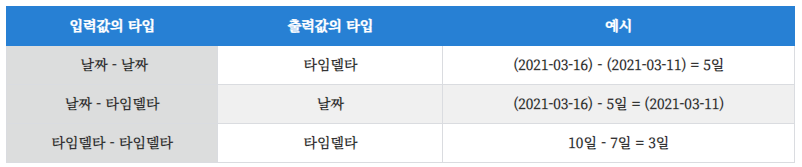

In [398]:
# timedelta를 12개 만드는데 단위를 시간으로 만들어라
pd.timedelta_range(0, periods=12, freq='H') 

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [399]:
# timedelta를 60개 만드는 데 단위는 분으로 만들어라
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [400]:
# timedelta를 10개를 만드는데 단위는 1시간 30분마다 만들어라
pd.timedelta_range(0, periods=10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [401]:
# date 범위를 생성하는데 2020년 01월 01일을 시작으로 
# 영업일 기준으로 20개 생성해라
pd.date_range('2020-01-01', periods=20, freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [402]:
# date 범위를 생성하는데 2020년 01월 01일을 시작으로 
# 2시간 단위로 30개 생성
pd.date_range('2020-01-01', periods=30, freq='2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [403]:
# date 범위를 생성하는데 2020년 01월 01일을 시작으로 
# 초단위로 20개 생성
pd.date_range('2020-01-01', periods=20, freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19'],
              dtype='datetime64[ns]', freq='S')

### 시프트( Shift )

In [404]:
ts = pd.Series(np.random.randn(5),
               index=pd.date_range('2020-01-01', periods=5, freq='B'))
ts

2020-01-01    0.243141
2020-01-02    0.061206
2020-01-03    1.939038
2020-01-06   -1.223856
2020-01-07    0.752534
Freq: B, dtype: float64

In [406]:
ts.shift(1) # 값이 하나씩 밀림

2020-01-01         NaN
2020-01-02    0.243141
2020-01-03    0.061206
2020-01-06    1.939038
2020-01-07   -1.223856
Freq: B, dtype: float64

In [407]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    0.243141
2020-01-07    0.061206
Freq: B, dtype: float64

In [409]:
ts.shift(-2)

2020-01-01    1.939038
2020-01-02   -1.223856
2020-01-03    0.752534
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [411]:
ts.shift(3, freq='B') # 영업일 기준으로 3일을 뒤로 옮겨라
# 1월 1일은 신정으로 영업을 하지 않고 2,3,4일의 값을 뒤로 옮기는데
# 1월 5/6일이 주말이므로 1월 6일부터 시작

2020-01-06    0.243141
2020-01-07    0.061206
2020-01-08    1.939038
2020-01-09   -1.223856
2020-01-10    0.752534
Freq: B, dtype: float64

In [412]:
ts.shift(2, freq='W') # 주 기준으로 2주를 뒤로 옮김
# 1/1(주의 시작이 수요일) 1/5를 넘겨서 1월 3주차인 12일부터 시작
# 같은 주에 속하는 값들이 3:2로 나눠져 있기 때문에 1월 12일 값이 3개 1월 19일 값이 2개

2020-01-12    0.243141
2020-01-12    0.061206
2020-01-12    1.939038
2020-01-19   -1.223856
2020-01-19    0.752534
dtype: float64

### 시간대 처리
- 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
- 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 ```pytz``` 사용

In [413]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [414]:
tz = pytz.timezone('Asia/Seoul')

In [416]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
ts

2020-01-01 09:00:00   -0.015606
2020-01-02 09:00:00    0.751244
2020-01-03 09:00:00    0.648492
2020-01-06 09:00:00   -0.620288
2020-01-07 09:00:00   -0.961354
2020-01-08 09:00:00    0.030193
2020-01-09 09:00:00    0.650032
Freq: B, dtype: float64

In [417]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [418]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00   -0.015606
2020-01-02 09:00:00+00:00    0.751244
2020-01-03 09:00:00+00:00    0.648492
2020-01-06 09:00:00+00:00   -0.620288
2020-01-07 09:00:00+00:00   -0.961354
2020-01-08 09:00:00+00:00    0.030193
2020-01-09 09:00:00+00:00    0.650032
Freq: B, dtype: float64

In [419]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [420]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00   -0.015606
2020-01-02 18:00:00+09:00    0.751244
2020-01-03 18:00:00+09:00    0.648492
2020-01-06 18:00:00+09:00   -0.620288
2020-01-07 18:00:00+09:00   -0.961354
2020-01-08 18:00:00+09:00    0.030193
2020-01-09 18:00:00+09:00    0.650032
Freq: B, dtype: float64

In [421]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00   -0.015606
2020-01-02 09:00:00+09:00    0.751244
2020-01-03 09:00:00+09:00    0.648492
2020-01-06 09:00:00+09:00   -0.620288
2020-01-07 09:00:00+09:00   -0.961354
2020-01-08 09:00:00+09:00    0.030193
2020-01-09 09:00:00+09:00    0.650032
dtype: float64

In [422]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00   -0.015606
2020-01-02 00:00:00+00:00    0.751244
2020-01-03 00:00:00+00:00    0.648492
2020-01-06 00:00:00+00:00   -0.620288
2020-01-07 00:00:00+00:00   -0.961354
2020-01-08 00:00:00+00:00    0.030193
2020-01-09 00:00:00+00:00    0.650032
dtype: float64

In [423]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00   -0.015606
2020-01-02 01:00:00+01:00    0.751244
2020-01-03 01:00:00+01:00    0.648492
2020-01-06 01:00:00+01:00   -0.620288
2020-01-07 01:00:00+01:00   -0.961354
2020-01-08 01:00:00+01:00    0.030193
2020-01-09 01:00:00+01:00    0.650032
dtype: float64

In [424]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [425]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [426]:
stamp_utc.value

1577880000000000000

In [427]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [428]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [429]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [431]:
stamp_ny.value

1577898000000000000

In [432]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [433]:
stamp = pd.Timestamp('2020-01-01 12:00', tz='Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [434]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [435]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [436]:
ts_utc

2020-01-01 09:00:00+00:00   -0.015606
2020-01-02 09:00:00+00:00    0.751244
2020-01-03 09:00:00+00:00    0.648492
2020-01-06 09:00:00+00:00   -0.620288
2020-01-07 09:00:00+00:00   -0.961354
2020-01-08 09:00:00+00:00    0.030193
2020-01-09 09:00:00+00:00    0.650032
Freq: B, dtype: float64

In [438]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2
ts

2020-01-01 09:00:00+00:00         NaN
2020-01-02 09:00:00+00:00         NaN
2020-01-03 09:00:00+00:00    1.296984
2020-01-06 09:00:00+00:00   -1.240577
2020-01-07 09:00:00+00:00   -1.922707
2020-01-08 09:00:00+00:00         NaN
2020-01-09 09:00:00+00:00         NaN
Freq: B, dtype: float64

In [439]:
ts.index # 상의한 timezone을 연산했을 경우, UTC로 자동 변환이 된다.

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [440]:
p = pd.Period(2020, freq='A-JAN')
p # 객체 생성

Period('2020', 'A-JAN')

In [441]:
p+2

Period('2022', 'A-JAN')

In [442]:
p-3

Period('2017', 'A-JAN')

In [444]:
p1 = pd.Period(2010, freq = 'A-JAN')
p2 = pd.Period(2020, freq = 'A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [445]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq='M')
pr

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'], dtype='period[M]', freq='M')

In [446]:
pd.Series(np.random.randn(6), index=pr)

2020-01   -1.830988
2020-02   -0.384598
2020-03    1.903183
2020-04   -0.527296
2020-05    0.260087
2020-06   -0.611990
Freq: M, dtype: float64

In [447]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-3','2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04'], dtype='period[M]', freq='M')

In [448]:
p = pd.Period('2020', freq='A-FEB')
p

Period('2020', 'A-FEB')

In [449]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [450]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [451]:
p = pd.Period('2020', freq='A-OCT')
p

Period('2020', 'A-OCT')

In [454]:
p.asfreq('M',how='start')

Period('2019-11', 'M')

In [455]:
p.asfreq('M',how='end')

Period('2020-10', 'M')

In [456]:
p = p.asfreq('M',how='start')
p = p.asfreq('M',how='end')
p

Period('2019-11', 'M')

In [457]:
pr = pd.period_range('2010','2020',freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010    1.414416
2011    1.433880
2012   -0.513091
2013   -0.194012
2014   -1.134268
2015   -1.475632
2016   -0.165096
2017    2.109304
2018    0.176406
2019   -0.860348
2020    0.415439
Freq: A-JAN, dtype: float64

In [458]:
ts.asfreq('M', how='start')

2009-02    1.414416
2010-02    1.433880
2011-02   -0.513091
2012-02   -0.194012
2013-02   -1.134268
2014-02   -1.475632
2015-02   -0.165096
2016-02    2.109304
2017-02    0.176406
2018-02   -0.860348
2019-02    0.415439
Freq: M, dtype: float64

In [459]:
ts.asfreq('M', how='end')

2010-01    1.414416
2011-01    1.433880
2012-01   -0.513091
2013-01   -0.194012
2014-01   -1.134268
2015-01   -1.475632
2016-01   -0.165096
2017-01    2.109304
2018-01    0.176406
2019-01   -0.860348
2020-01    0.415439
Freq: M, dtype: float64

In [460]:
ts.asfreq('B', how='end')

2010-01-29    1.414416
2011-01-31    1.433880
2012-01-31   -0.513091
2013-01-31   -0.194012
2014-01-31   -1.134268
2015-01-30   -1.475632
2016-01-29   -0.165096
2017-01-31    2.109304
2018-01-31    0.176406
2019-01-31   -0.860348
2020-01-31    0.415439
Freq: B, dtype: float64

In [461]:
p = pd.Period('2020Q2', freq='Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [462]:
p.asfreq('D','start')

Period('2019-05-01', 'D')

In [464]:
p.asfreq('D','end')

Period('2019-07-31', 'D')

In [465]:
pr = pd.period_range('2019Q3','2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int32

In [469]:
pr = pd.date_range('2020-01-01', periods=5, freq='Q-JAN')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-31    0.165214
2020-04-30    0.430298
2020-07-31    1.392404
2020-10-31   -0.826926
2021-01-31    0.097240
Freq: Q-JAN, dtype: float64

In [470]:
ts.to_period()

2020Q4    0.165214
2021Q1    0.430298
2021Q2    1.392404
2021Q3   -0.826926
2021Q4    0.097240
Freq: Q-JAN, dtype: float64

In [471]:
pr = pd.date_range('2020-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01    0.284436
2020-01-02   -0.780747
2020-01-03   -1.685722
2020-01-04    0.888063
2020-01-05    0.576415
Freq: D, dtype: float64

In [473]:
p = ts.to_period('M')
p

2020-01    0.284436
2020-01   -0.780747
2020-01   -1.685722
2020-01    0.888063
2020-01    0.576415
Freq: M, dtype: float64

In [474]:
p.to_timestamp(how='start')

2020-01-01    0.284436
2020-01-01   -0.780747
2020-01-01   -1.685722
2020-01-01    0.888063
2020-01-01    0.576415
dtype: float64

In [ ]:
# 3:50:48